In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:03, 209.86it/s]
100%|██████████| 720/720 [00:07<00:00, 92.62it/s] 
8280it [00:00, 249354.42it/s]
7920it [00:00, 236255.12it/s]
700it [00:02, 237.46it/s]
100%|██████████| 700/700 [00:07<00:00, 98.18it/s] 
8280it [00:00, 255042.17it/s]
7920it [00:00, 79626.85it/s]
710it [00:03, 217.07it/s]
100%|██████████| 710/710 [00:07<00:00, 94.97it/s] 
7920it [00:00, 239341.23it/s]
7560it [00:00, 247952.72it/s]
720it [00:00, 811.24it/s]
100%|██████████| 720/720 [00:07<00:00, 91.99it/s] 
8280it [00:00, 232963.74it/s]
720it [00:03, 225.00it/s]
100%|██████████| 720/720 [00:07<00:00, 90.59it/s] 
8280it [00:00, 74097.04it/s]
700it [00:00, 806.51it/s]
100%|██████████| 700/700 [00:07<00:00, 98.03it/s] 
8280it [00:00, 253797.12it/s]
509it [00:01, 376.47it/s]
100%|██████████| 509/509 [00:02<00:00, 194.25it/s]
3664it [00:00, 246866.44it/s]
700it [00:03, 219.72it/s]
100%|██████████| 700/700 [00:07<00:00, 98.43it/s] 
8280it [00:00, 243032.35it/s]
700it [00:00, 832.73it/s]
100%|██████████| 700/700 [00:0

In [8]:
len(data_train), len(data_val), len(data_test)

(24480, 23400, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.17539


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.06589
Epoch 1...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10521


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.078279
EarlyStopping counter: 1 out of 10
Epoch 2...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10055


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.067719
EarlyStopping counter: 2 out of 10
Epoch 3...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.098268


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.05708
Epoch 4...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.096966


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.058939
EarlyStopping counter: 1 out of 10
Epoch 5...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.094176


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044355
Epoch 7...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.093451


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044304
Epoch 8...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.092559


 48%|████▊     | 351/732 [00:27<00:27, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.040311
EarlyStopping counter: 4 out of 10
Epoch 16...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087036


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.034652
Epoch 17...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087039


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.032357
Epoch 18...


 57%|█████▋    | 435/765 [01:32<01:08,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08366


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.039915
EarlyStopping counter: 1 out of 10
Epoch 26...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.083155


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.030614


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08296


 66%|██████▌   | 481/732 [00:36<00:18, 13.58it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030168
EarlyStopping counter: 3 out of 10
Epoch 35...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.080885


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030474
EarlyStopping counter: 4 out of 10
Epoch 36...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.081013


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030579
EarlyStopping counter: 5 out of 10
Epoch 37...


 61%|██████    | 463/765 [01:37<01:02,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079846


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030064
EarlyStopping counter: 1 out of 10
Epoch 44...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079597


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.02924
EarlyStopping counter: 2 out of 10
Epoch 45...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079395


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028778


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 46...


 35%|███▍      | 265/765 [00:56<01:44,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078864


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028126


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 53...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078629


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028157


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078721


 73%|███████▎  | 531/732 [00:40<00:14, 13.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.16it/s]


Mean val loss: 0.028127


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.077423


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028132


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 63...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076732


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027569


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 64...


 64%|██████▎   | 486/765 [01:42<00:56,  4.90it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076176


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.027555


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 71...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076335


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.027346


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 72...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075987


 73%|███████▎  | 533/732 [00:40<00:14, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027625
EarlyStopping counter: 1 out of 10
Epoch 80...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075845


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026972


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 81...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075678


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027053


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 82...


 50%|█████     | 386/765 [01:21<01:19,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07499


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026881


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 90...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07506
Epoch    90: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027186
EarlyStopping counter: 1 out of 10
Epoch 91...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.074009


 37%|███▋      | 271/732 [00:21<00:33, 13.93it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073485


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.026473


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 99...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073461
Epoch    99: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.026663
EarlyStopping counter: 1 out of 10
Epoch 100...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073062


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026285


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 101...


 44%|████▍     | 338/765 [01:12<01:29,  4.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073156


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026314


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 108...


 17%|█▋        | 128/765 [00:28<02:10,  4.87it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026278


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 109...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072987
Epoch   109: reducing learning rate of group 0 to 1.2500e-05.


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02609


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 110...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072699


 41%|████      | 297/732 [00:23<00:31, 13.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072625


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026013


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 117...


 67%|██████▋   | 513/765 [01:48<00:52,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072454


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.025991


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 119...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072955


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026073


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 120...


 22%|██▏       | 165/765 [00:36<02:04,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072914


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025936


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 127...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072678


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026012


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 128...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072972


  6%|▌         | 45/732 [00:05<00:50, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072016


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025961


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 136...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072223


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02595


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 137...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072391


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 138...


 19%|█▉        | 145/765 [00:32<02:07,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 145...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072266


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025932


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 146...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07267


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025948


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 147...


 83%|████████▎ | 633/765 [02:13<00:27,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072082


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025915


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 155...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072495


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 156...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072596


 14%|█▍        | 105/732 [00:09<00:45, 13.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 162...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072648


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025923


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 163...


 63%|██████▎   | 484/765 [01:42<00:58,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025931


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 165...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072252


 97%|█████████▋| 707/732 [00:53<00:01, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072209


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 172...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072236


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 173...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072833


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025893


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072476


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025902


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 175...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07257


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025905


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 176...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072202


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025943


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 177...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07223


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 178...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072782


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025907


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 179...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072524


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025945


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 180...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072171


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 181...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072093


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 182...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07237


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025926


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 183...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072208


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 184...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072382


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025916


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 185...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072141


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025904


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 186...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072222


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072329


100%|██████████| 732/732 [00:55<00:00, 13.15it/s]


Mean val loss: 0.025914


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 188...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072061


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 189...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072204


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 190...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072332


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.0259


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 191...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072776


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025897


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 192...


 23%|██▎       | 179/765 [00:39<02:02,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072337


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025892


 99%|█████████▉| 257/259 [02:32<00:01,  1.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [19]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [ ]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [ ]:
model_conf

In [20]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

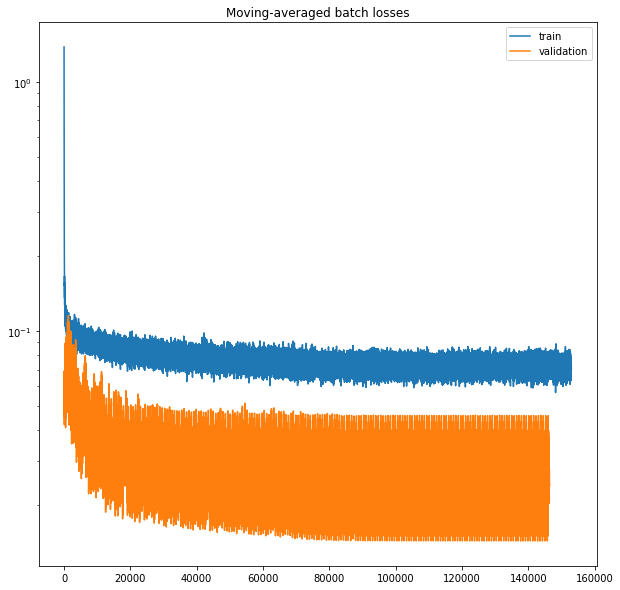

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [22]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

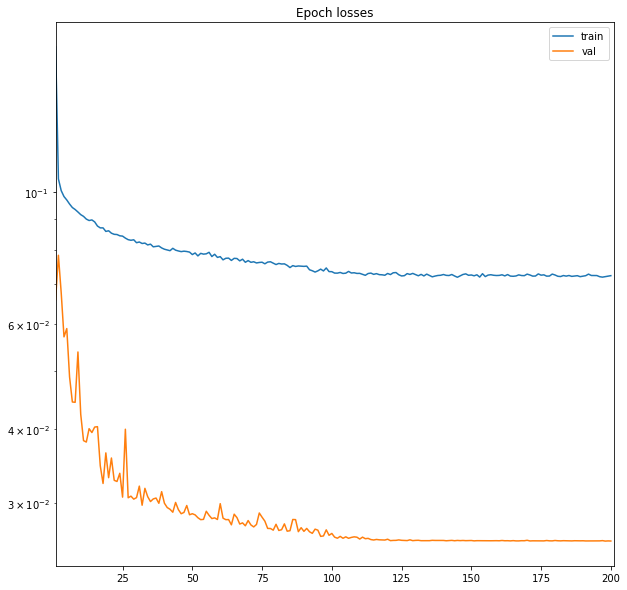

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [24]:
import os

In [25]:
import torch

In [26]:
from visualization_utils import output_to_binary, plot_sample

In [27]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

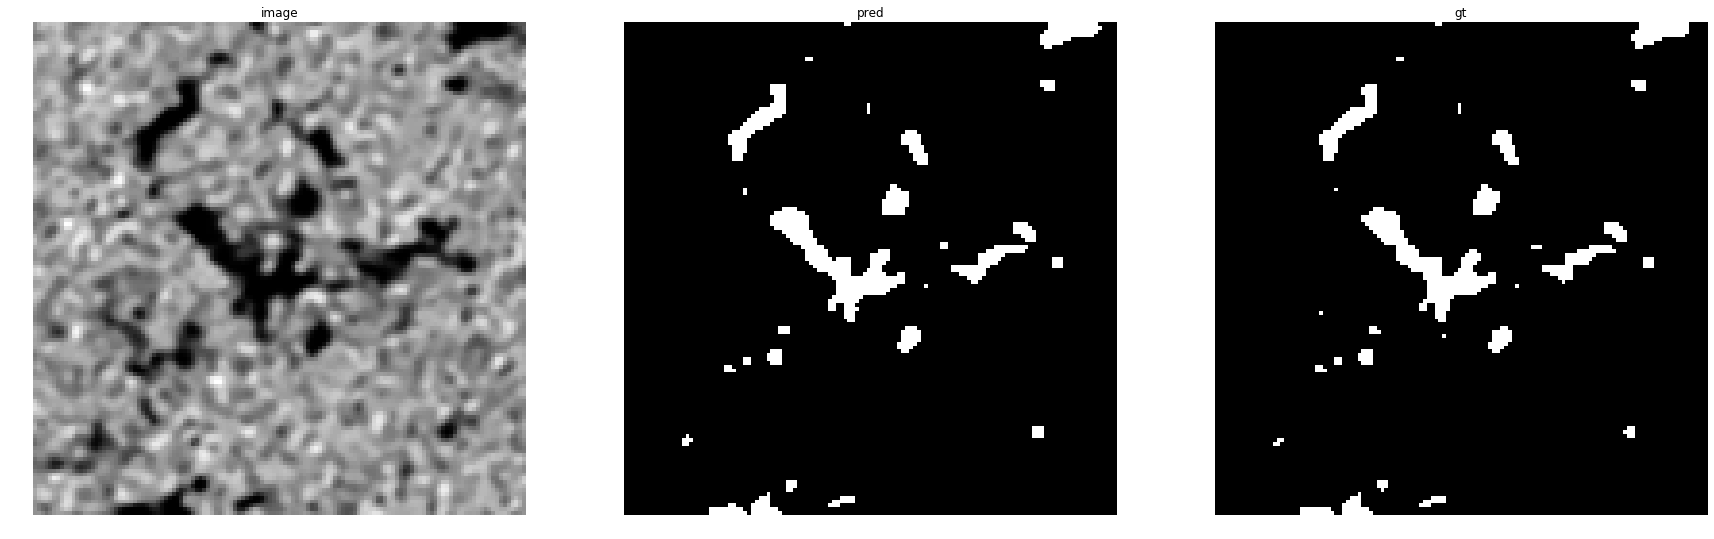

accuracy    : 0.99700927734375
precision   : 0.9494451294697904
recall      : 0.9897172236503856
f1          : 0.9691629955947137
pr_auc      : 0.9979051477895713
iou         : 0.9401709401709402


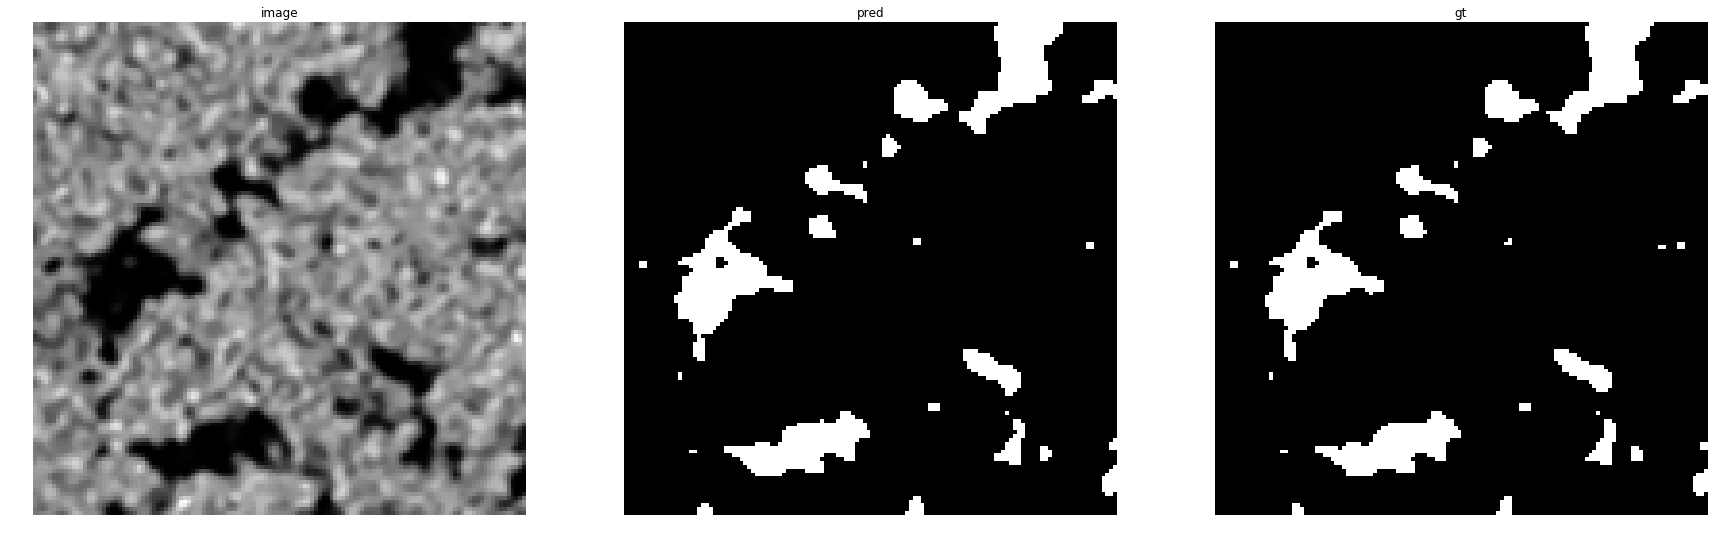

accuracy    : 0.9964599609375
precision   : 0.9724310776942355
recall      : 0.9910600255427842
f1          : 0.9816571790006325
pr_auc      : 0.9992625586264988
iou         : 0.9639751552795031


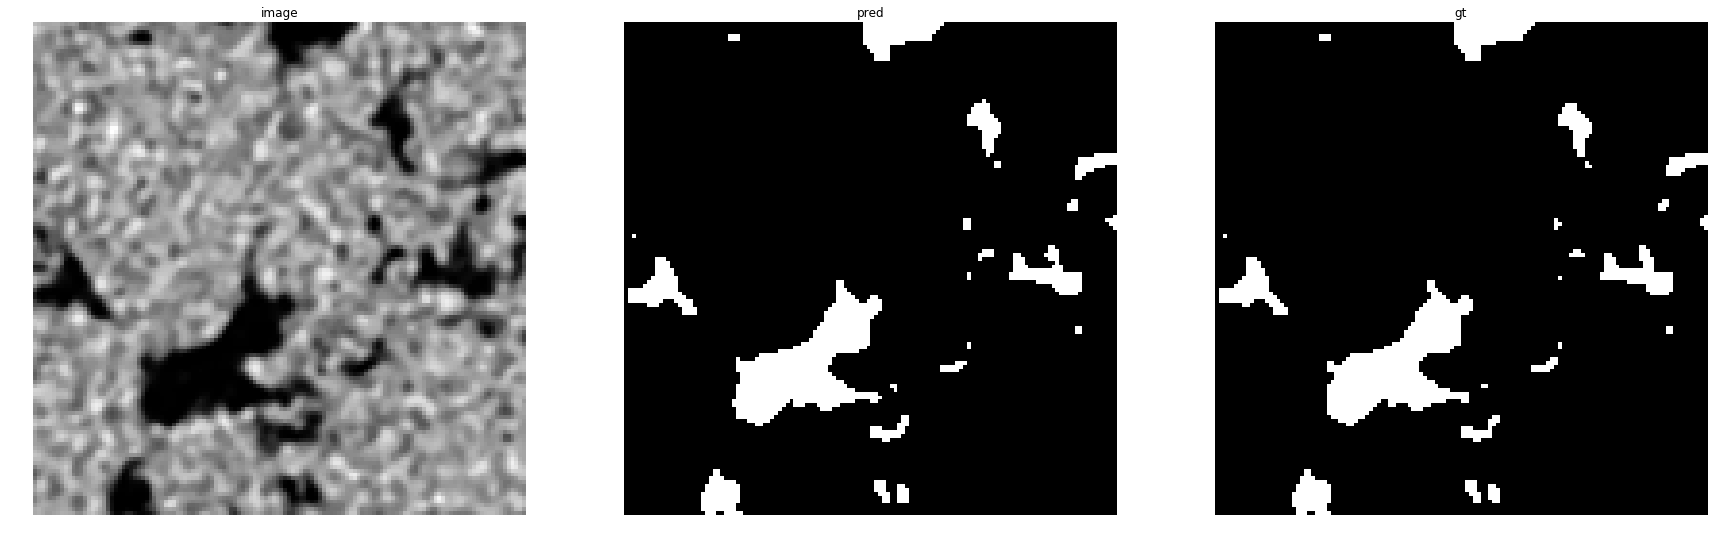

accuracy    : 0.99688720703125
precision   : 0.9683734939759037
recall      : 0.993050193050193
f1          : 0.980556614563477
pr_auc      : 0.9988419171040341
iou         : 0.9618548990276738


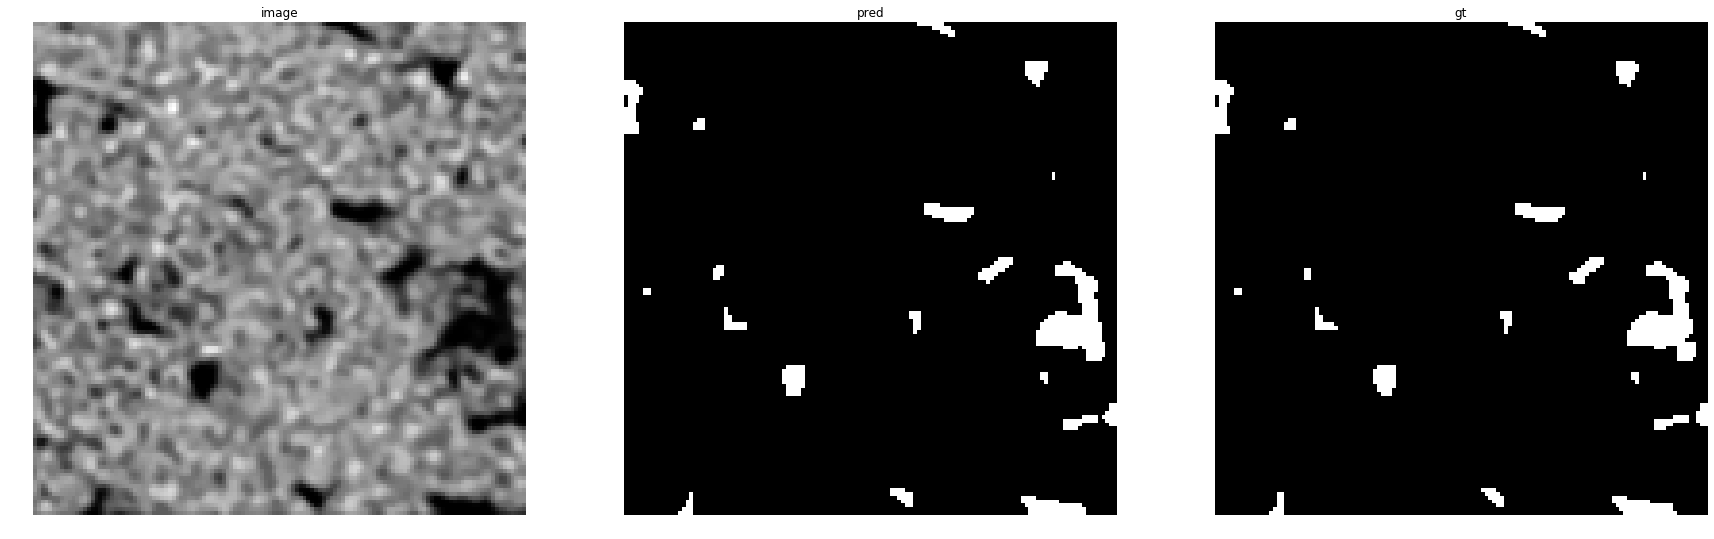

accuracy    : 0.9981689453125
precision   : 0.9617224880382775
recall      : 0.9901477832512315
f1          : 0.9757281553398058
pr_auc      : 0.997509980479392
iou         : 0.95260663507109


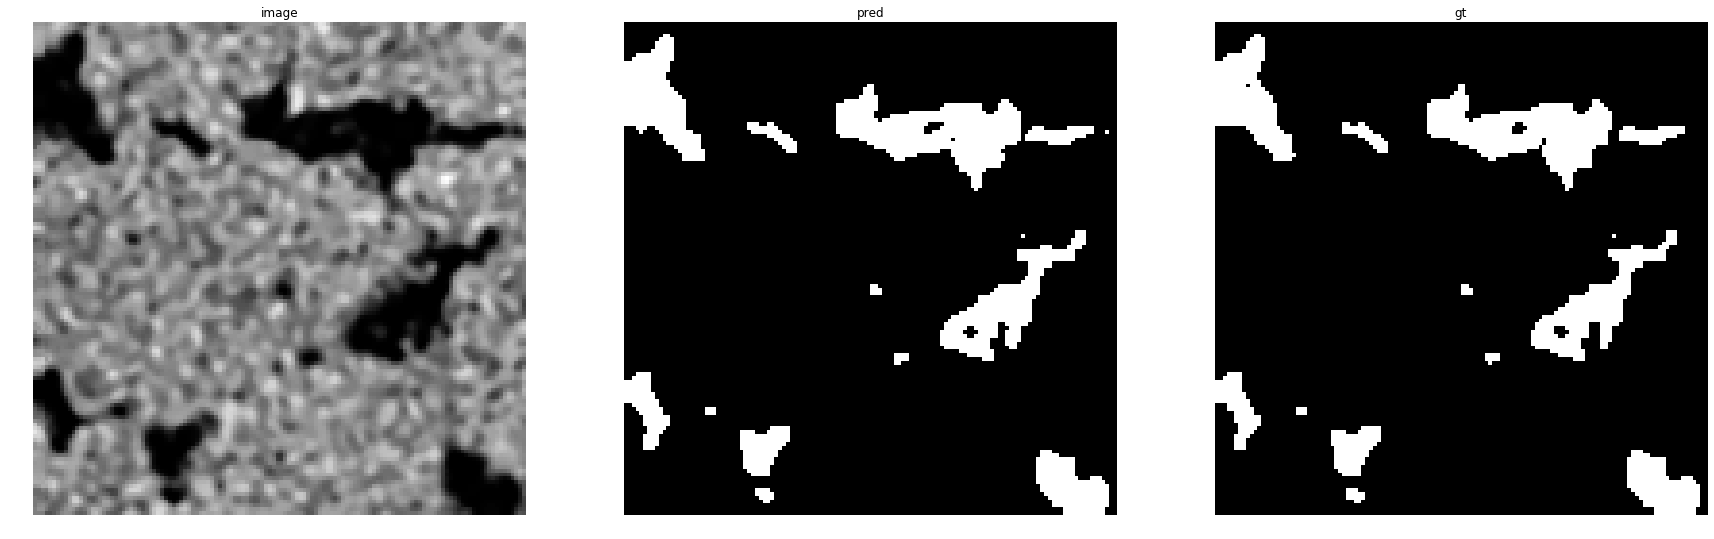

accuracy    : 0.99639892578125
precision   : 0.9737519300051467
recall      : 0.9957894736842106
f1          : 0.9846474108769191
pr_auc      : 0.999281056843818
iou         : 0.9697590978985136


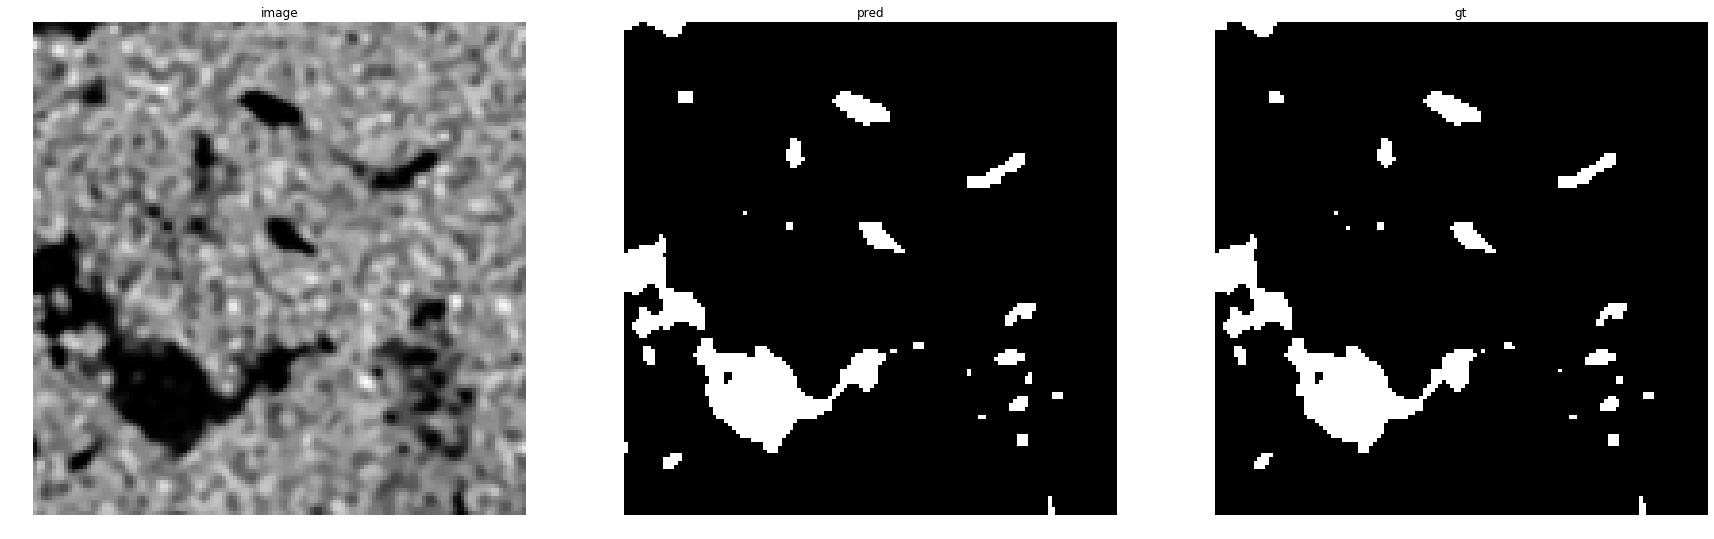

accuracy    : 0.99658203125
precision   : 0.9636222910216719
recall      : 0.992822966507177
f1          : 0.9780047132757267
pr_auc      : 0.9985955011587485
iou         : 0.95695618754804


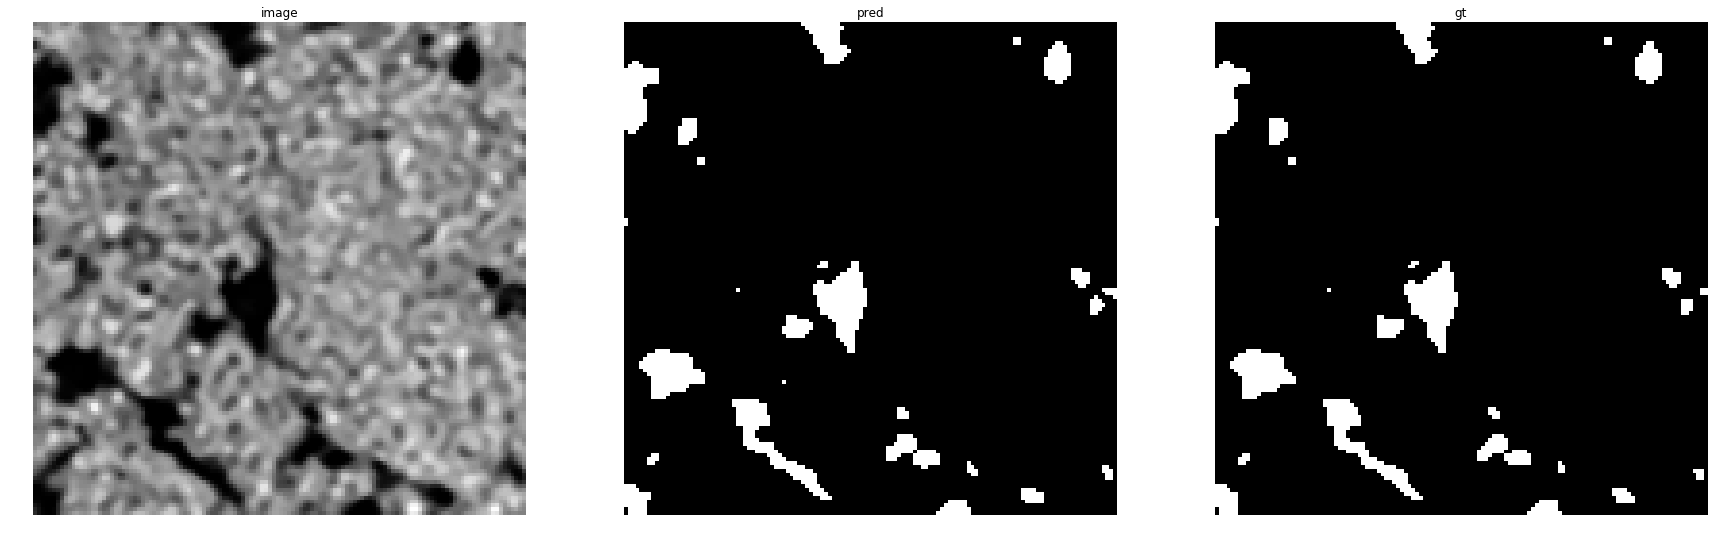

accuracy    : 0.996826171875
precision   : 0.9538461538461539
recall      : 0.9959839357429718
f1          : 0.9744597249508841
pr_auc      : 0.9985762561702592
iou         : 0.9501915708812261


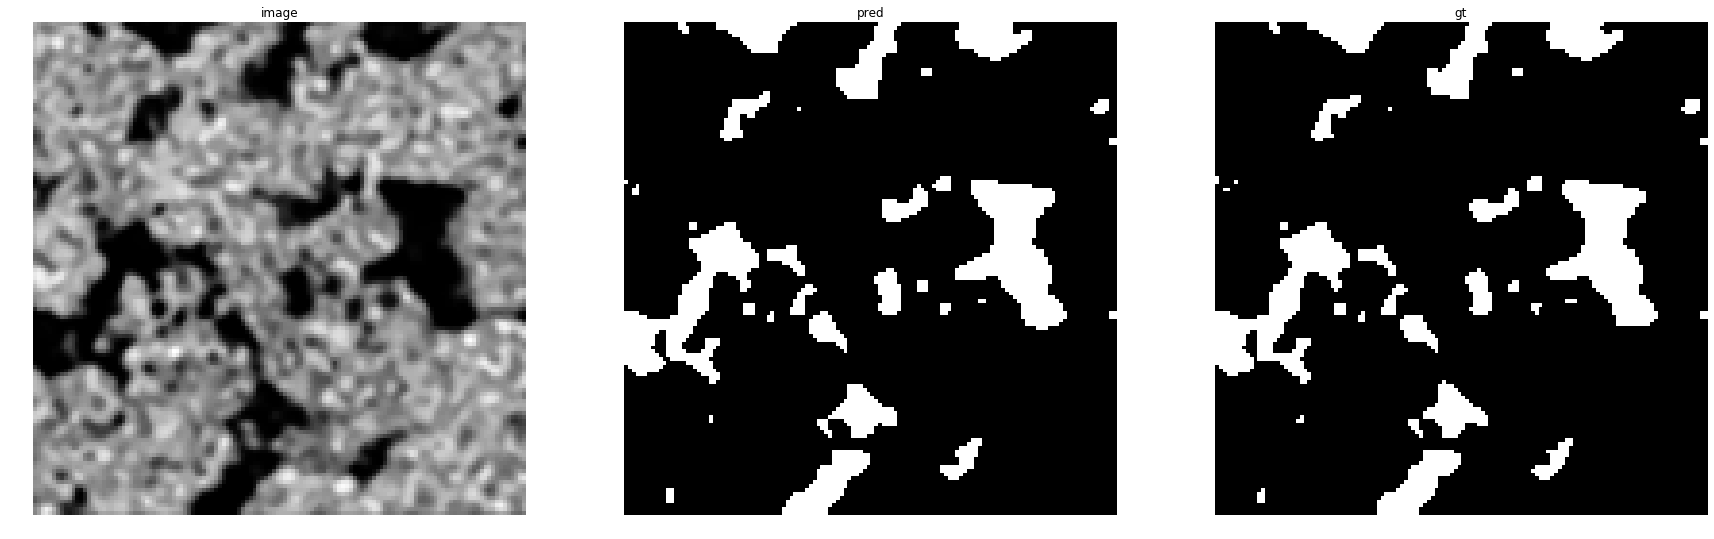

accuracy    : 0.99432373046875
precision   : 0.9656671012603216
recall      : 0.9937388193202147
f1          : 0.9795018734846815
pr_auc      : 0.9988042693200077
iou         : 0.9598272138228942


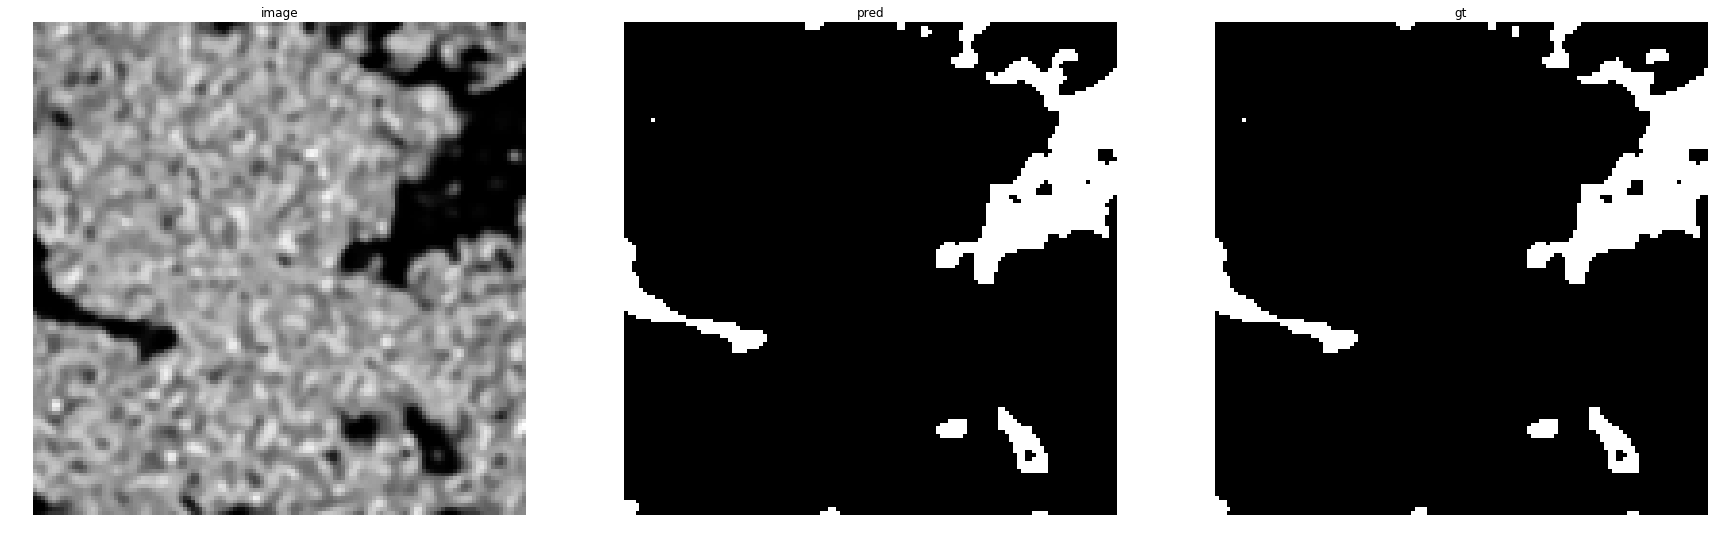

accuracy    : 0.9974365234375
precision   : 0.9772587584511371
recall      : 0.9968652037617555
f1          : 0.9869646182495344
pr_auc      : 0.9992880947609764
iou         : 0.9742647058823529


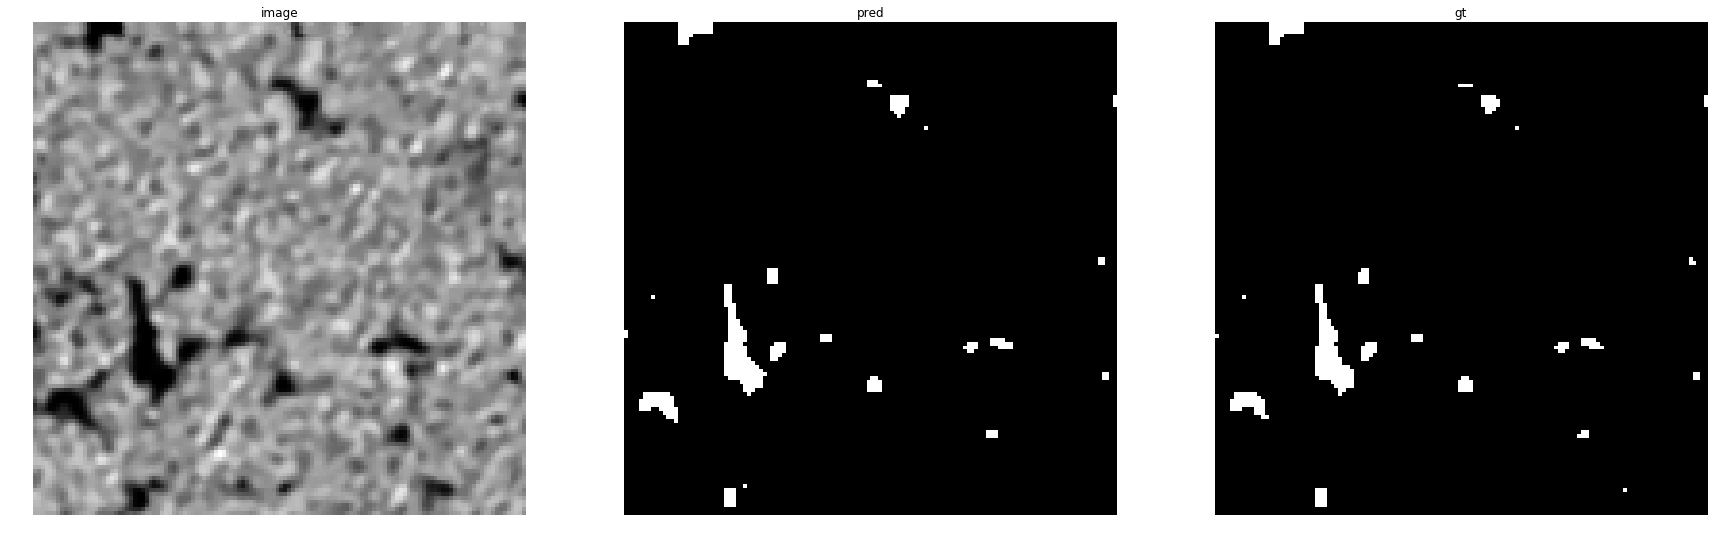

accuracy    : 0.9984130859375
precision   : 0.9305555555555556
recall      : 0.9970238095238095
f1          : 0.9626436781609196
pr_auc      : 0.9979913013939445
iou         : 0.9279778393351801


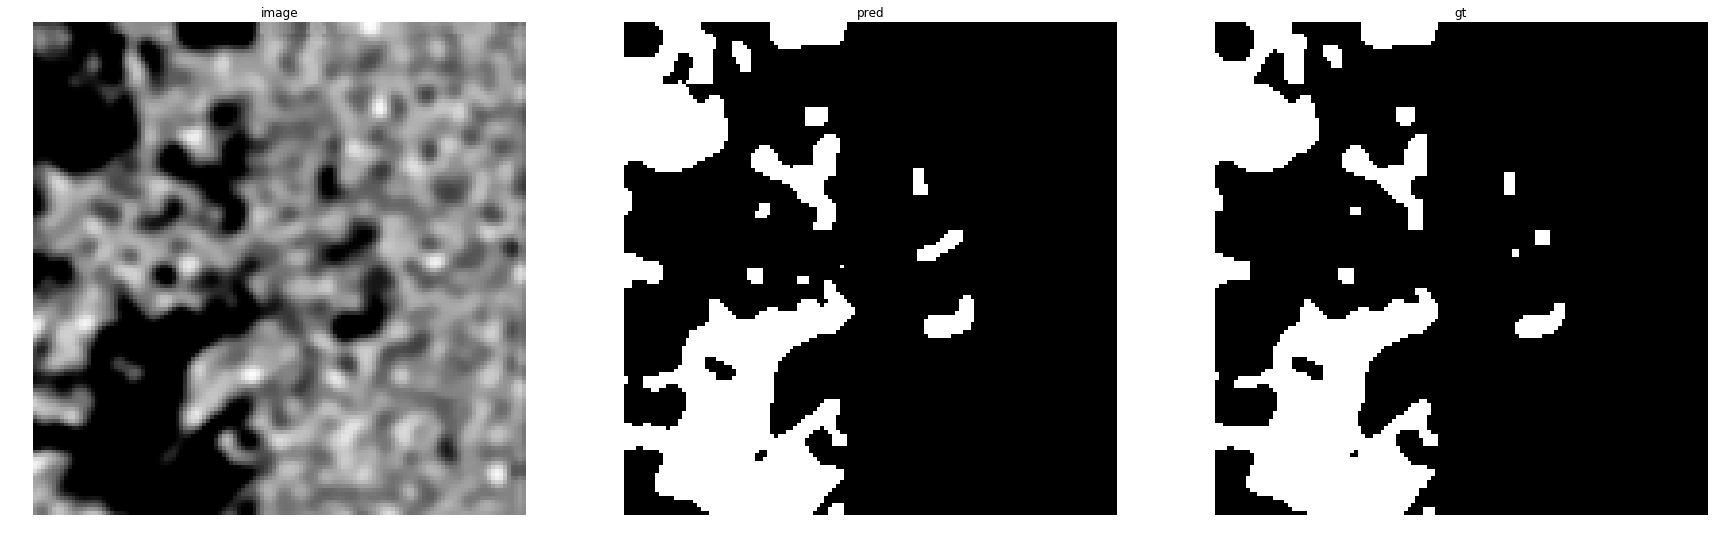

accuracy    : 0.98638916015625
precision   : 0.9389200354086751
recall      : 0.9949968730456535
f1          : 0.9661454379839076
pr_auc      : 0.997626832462971
iou         : 0.9345080763582966


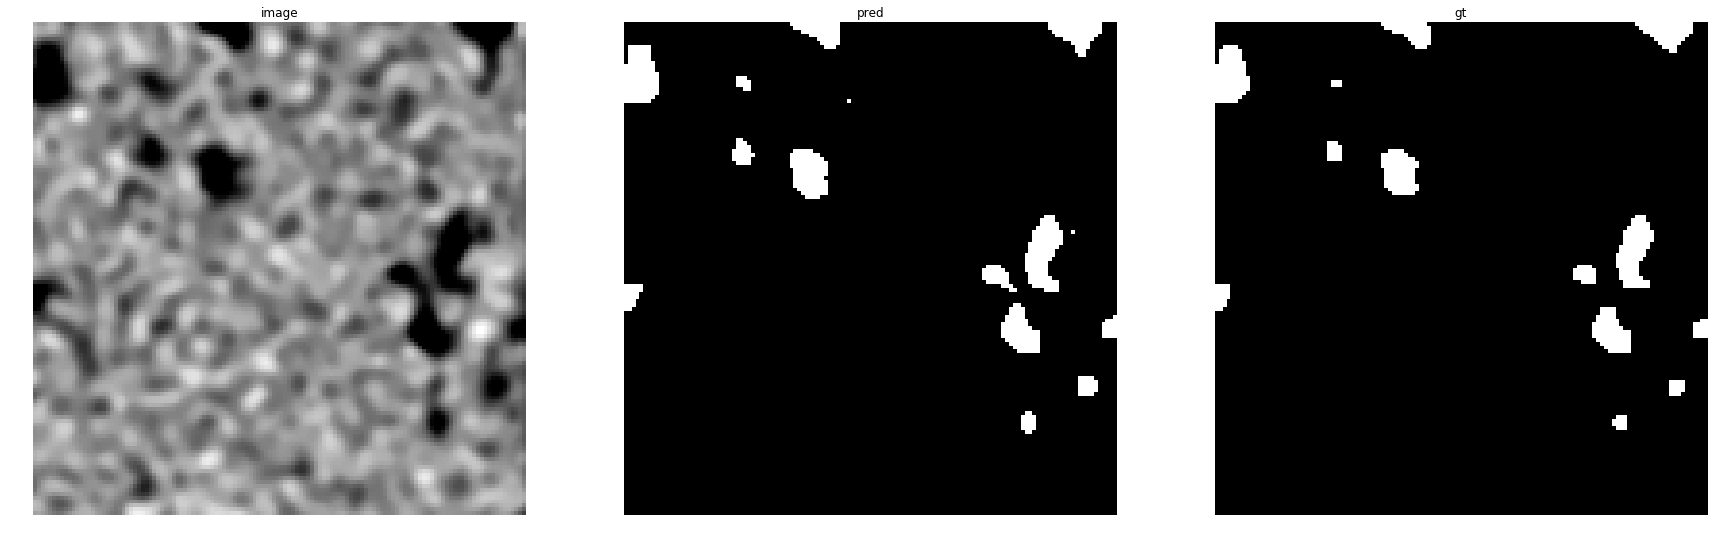

accuracy    : 0.9949951171875
precision   : 0.8925170068027211
recall      : 0.9954476479514416
f1          : 0.9411764705882353
pr_auc      : 0.9964588142451444
iou         : 0.8888888888888888


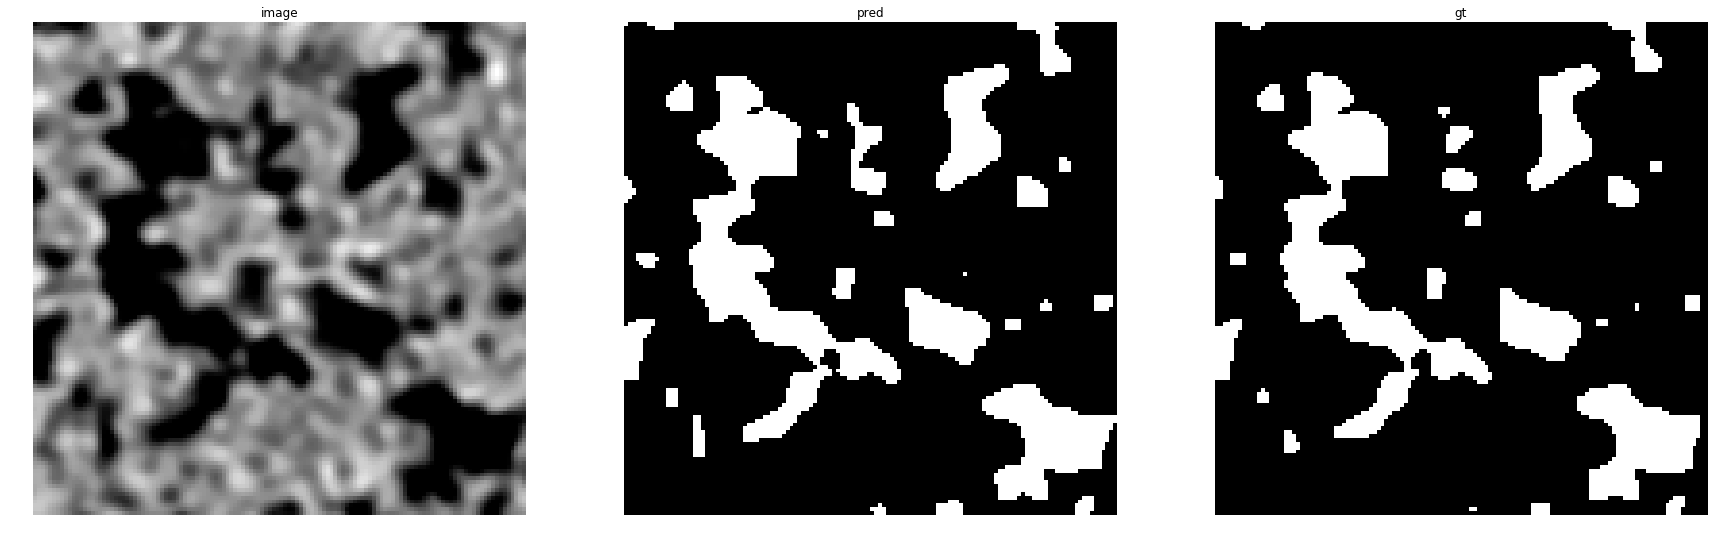

accuracy    : 0.984130859375
precision   : 0.927007299270073
recall      : 0.9934810951760105
f1          : 0.9590937696664569
pr_auc      : 0.9968976776227955
iou         : 0.9214026602176542


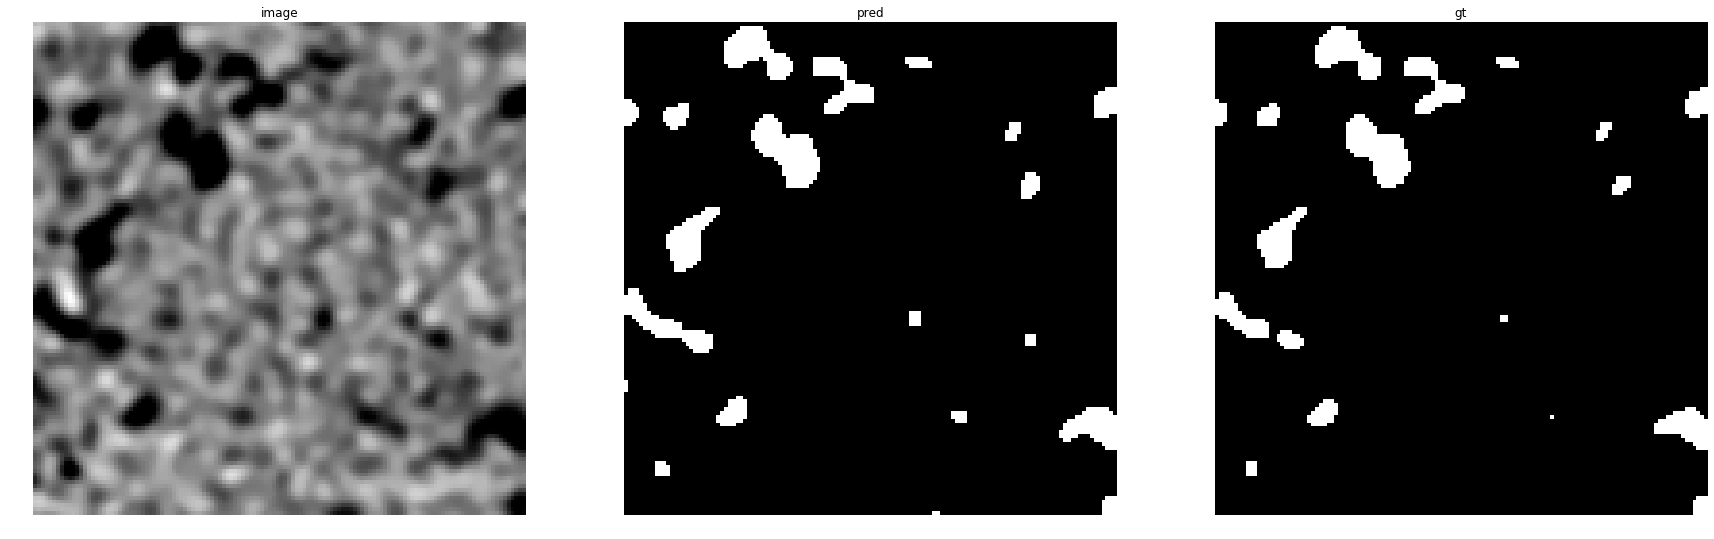

accuracy    : 0.991455078125
precision   : 0.8755803156917363
recall      : 0.9936775553213909
f1          : 0.930898321816387
pr_auc      : 0.9942907118950327
iou         : 0.8707294552169899


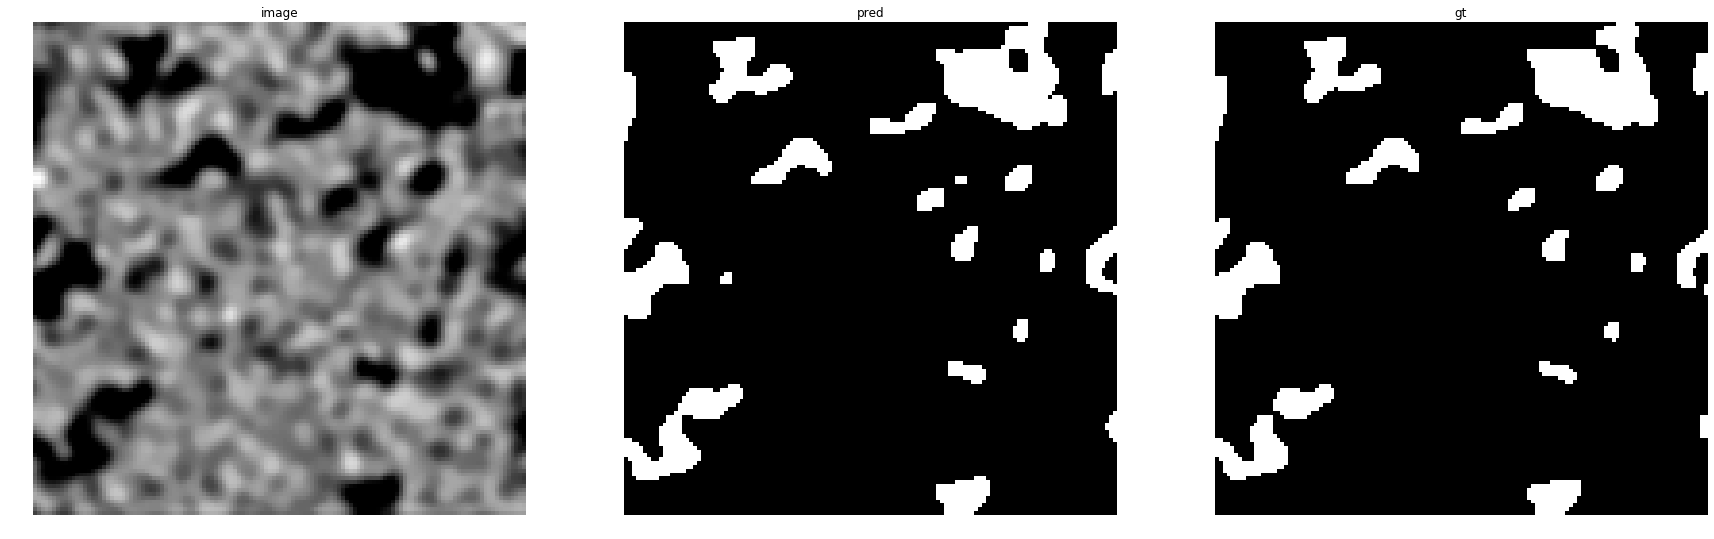

accuracy    : 0.9910888671875
precision   : 0.9318525996971226
recall      : 0.9940764674205708
f1          : 0.9619593538301199
pr_auc      : 0.9962782948267062
iou         : 0.9267068273092369


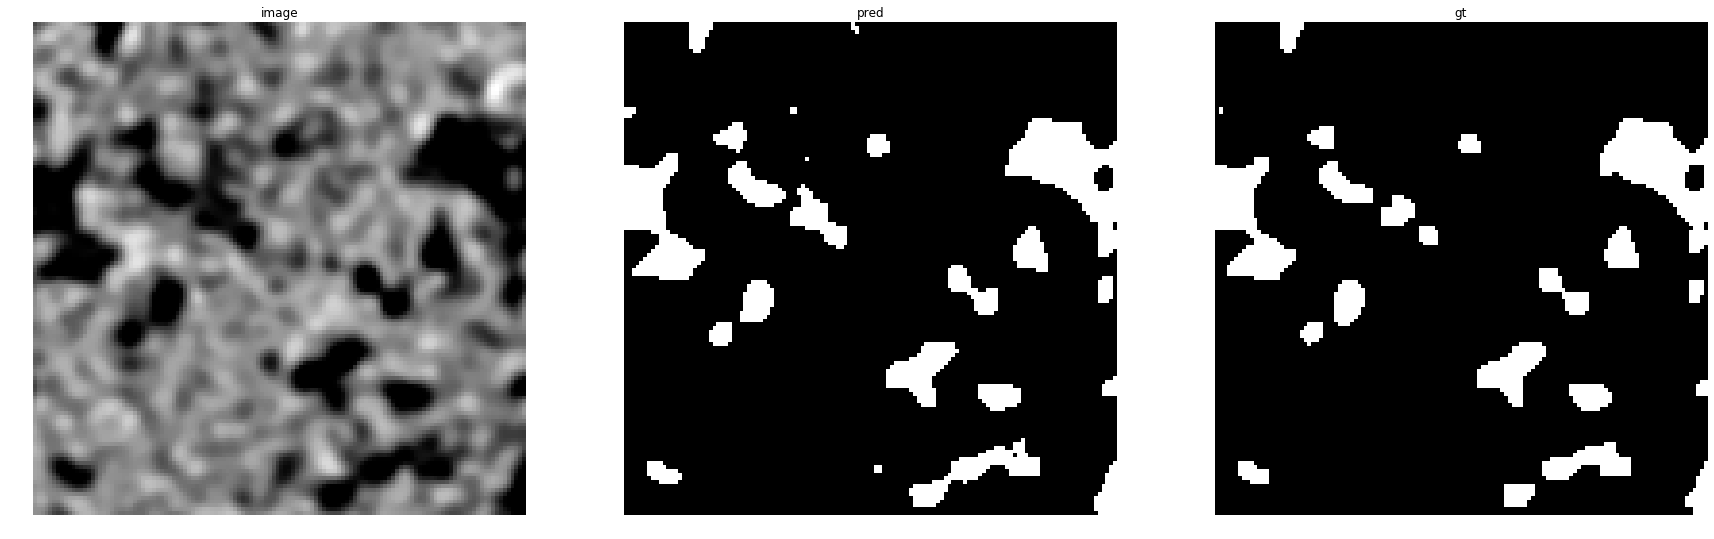

accuracy    : 0.98822021484375
precision   : 0.9077694235588972
recall      : 0.9950549450549451
f1          : 0.9494102228047182
pr_auc      : 0.995190025923546
iou         : 0.903692614770459


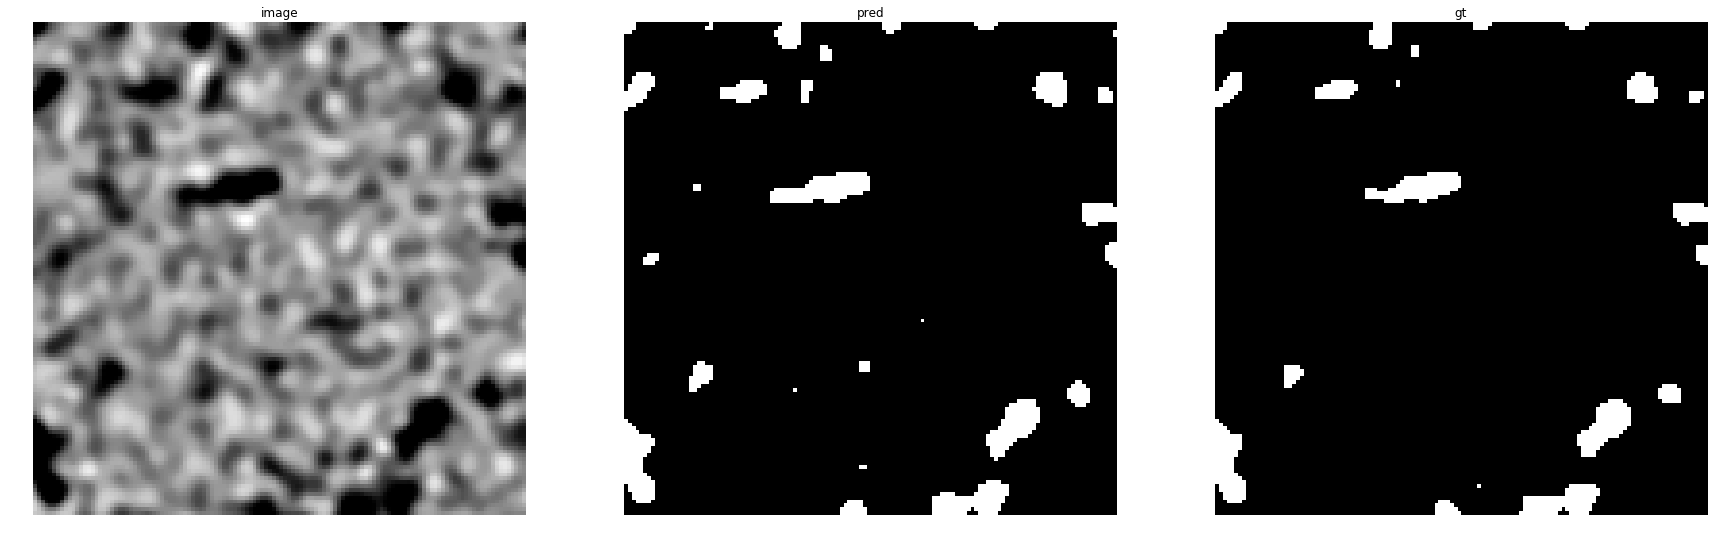

accuracy    : 0.990966796875
precision   : 0.8526970954356846
recall      : 0.9927536231884058
f1          : 0.9174107142857142
pr_auc      : 0.9891307016358166
iou         : 0.8474226804123711


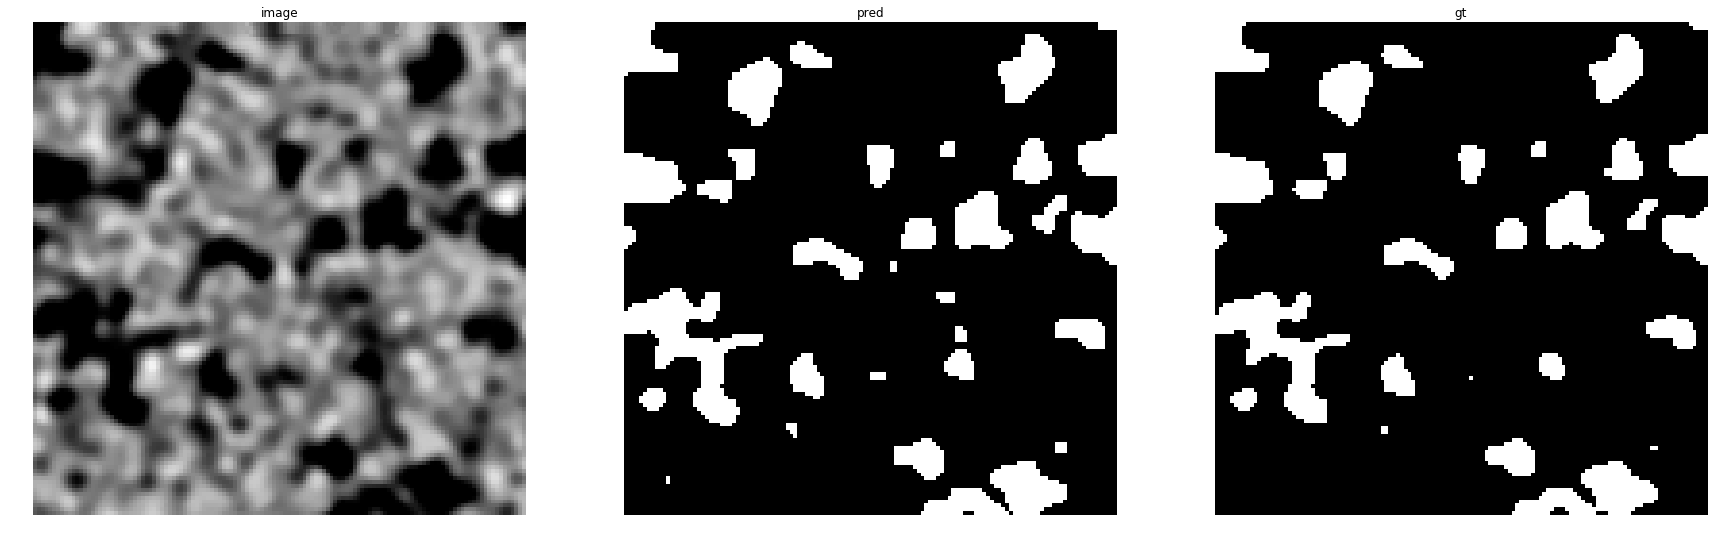

accuracy    : 0.98529052734375
precision   : 0.9154357459379616
recall      : 0.9951826575672421
f1          : 0.953644931717638
pr_auc      : 0.9947962956197721
iou         : 0.9113970588235294


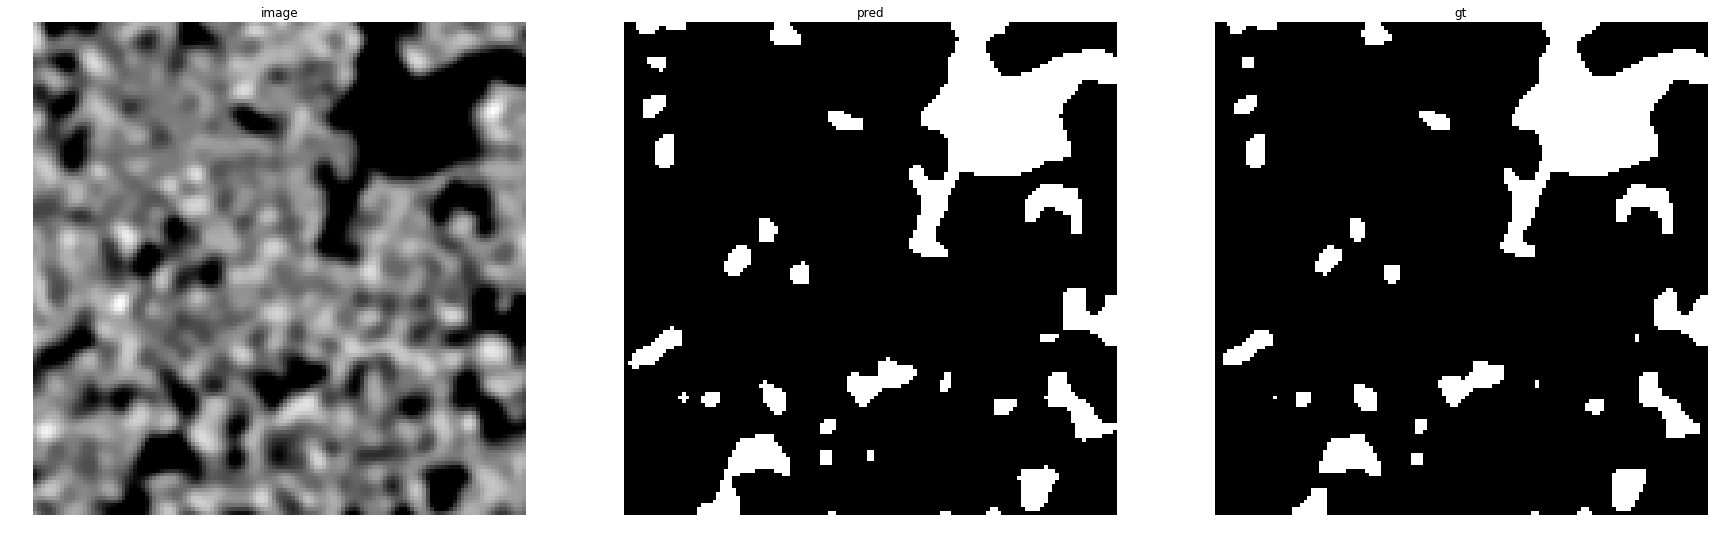

accuracy    : 0.9866943359375
precision   : 0.9179046129788898
recall      : 0.9966044142614601
f1          : 0.9556369556369557
pr_auc      : 0.9971361883082248
iou         : 0.9150428682774747


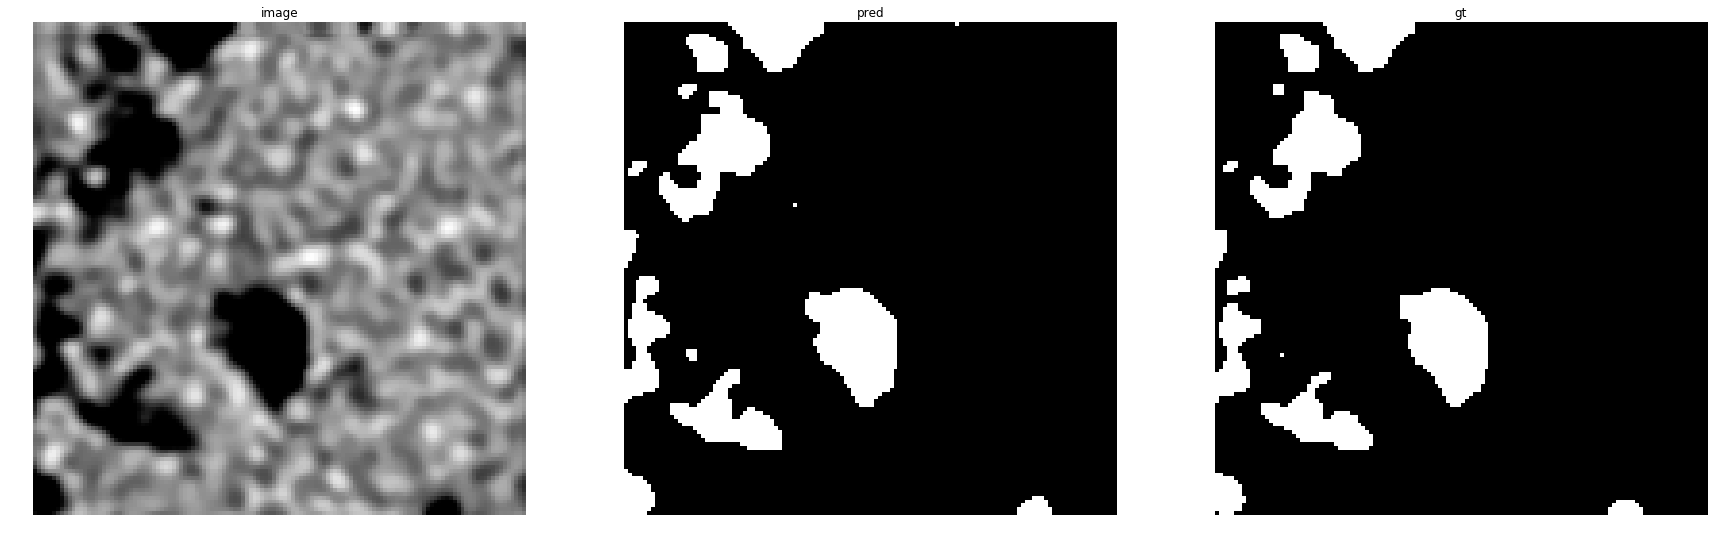

accuracy    : 0.992431640625
precision   : 0.9382911392405063
recall      : 0.996080627099664
f1          : 0.966322650733297
pr_auc      : 0.9976903953026744
iou         : 0.9348397267472413


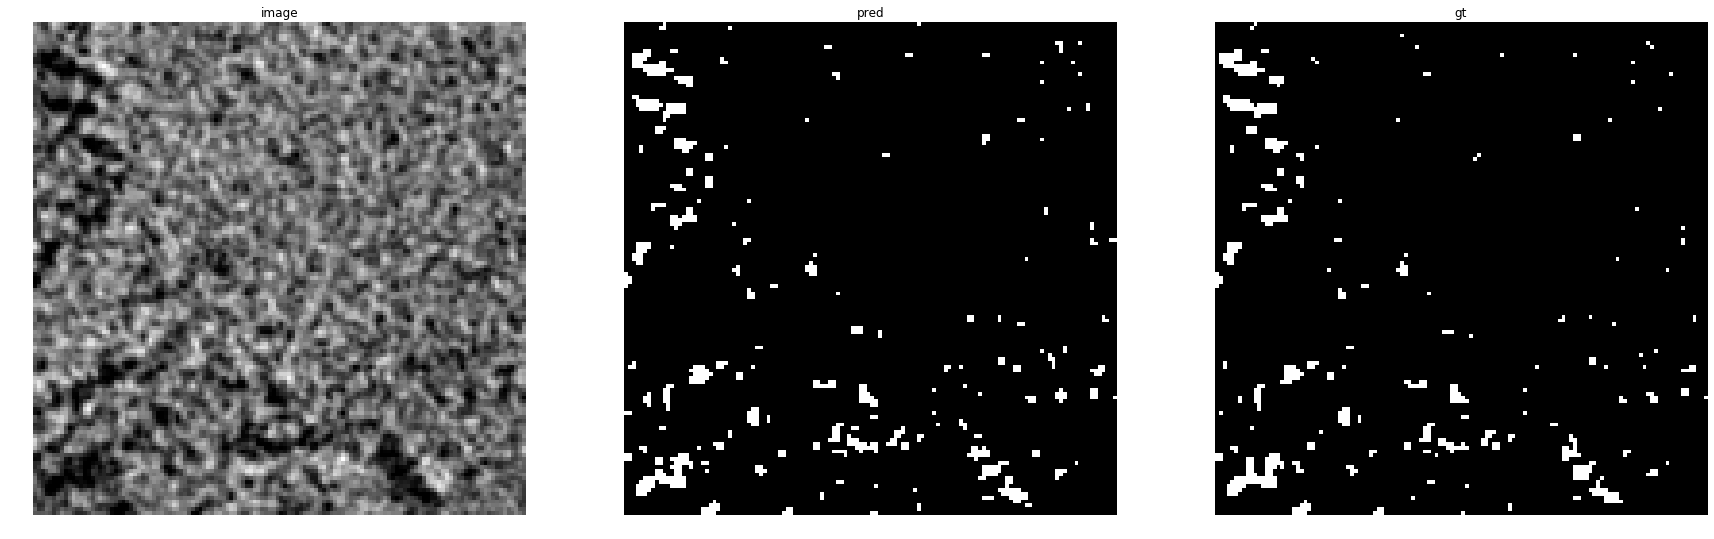

accuracy    : 0.99090576171875
precision   : 0.8309659090909091
recall      : 0.9512195121951219
f1          : 0.8870356330553449
pr_auc      : 0.9732382212840914
iou         : 0.7970027247956403


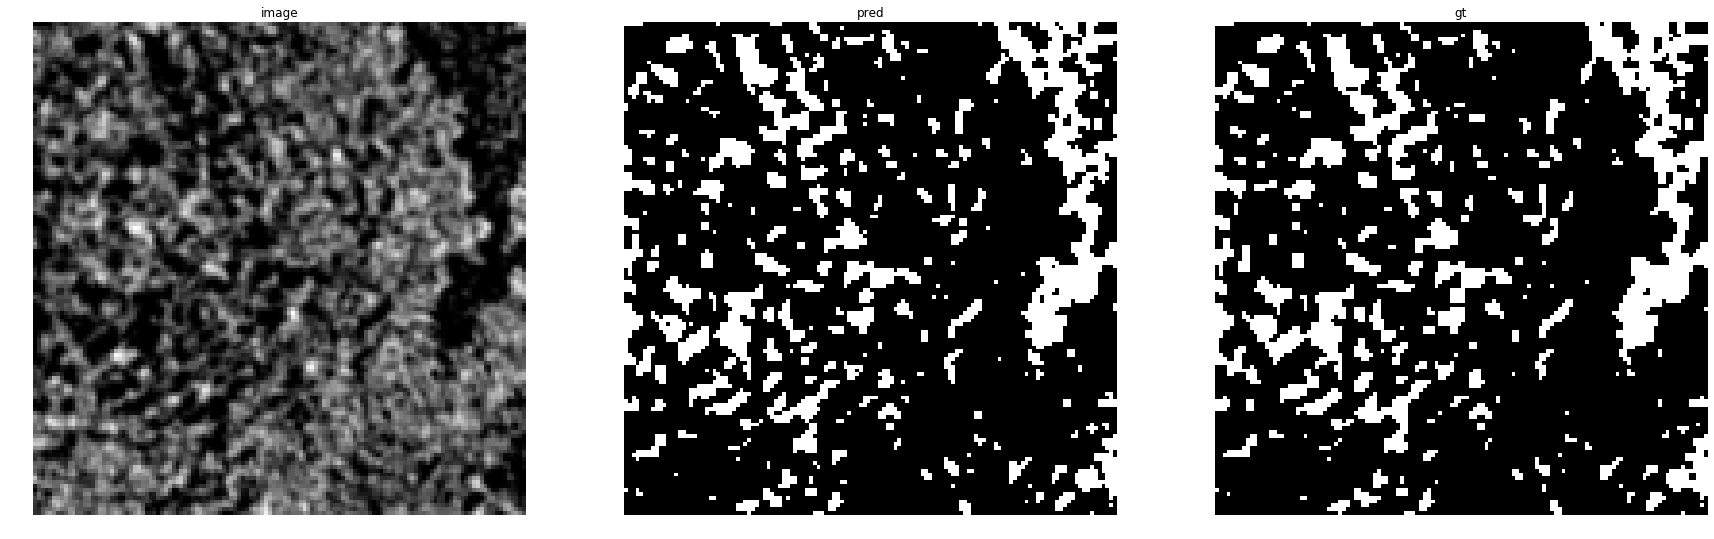

accuracy    : 0.97430419921875
precision   : 0.9439834024896265
recall      : 0.9321041849575651
f1          : 0.9380061846561625
pr_auc      : 0.9878403865910468
iou         : 0.8832501386577926


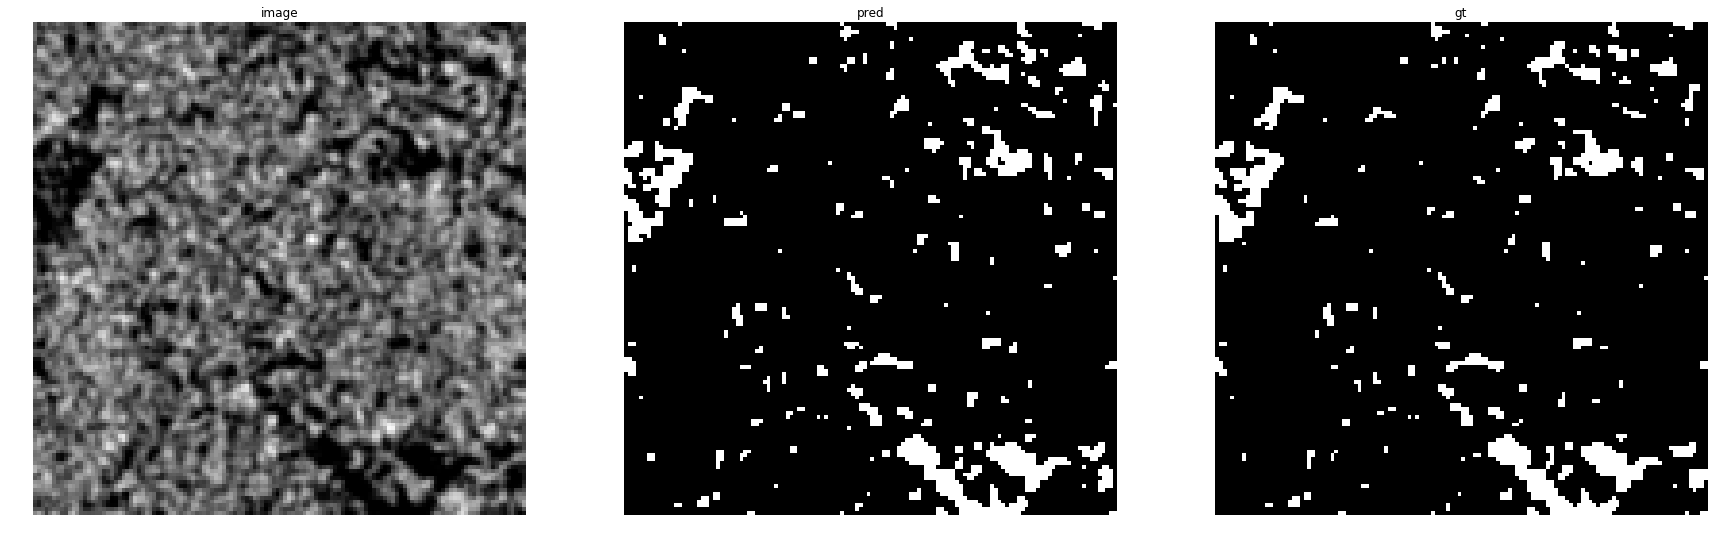

accuracy    : 0.98699951171875
precision   : 0.9029535864978903
recall      : 0.9448123620309051
f1          : 0.9234088457389428
pr_auc      : 0.9839091679661562
iou         : 0.8577154308617234


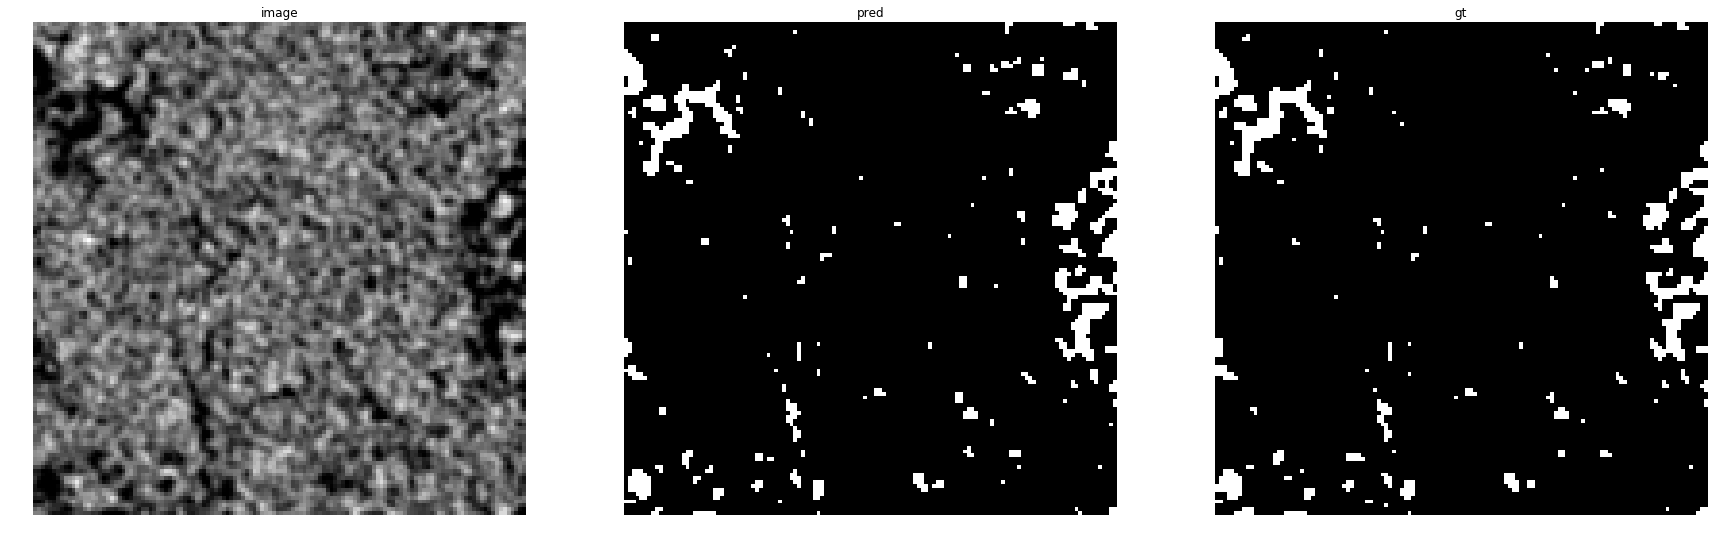

accuracy    : 0.98980712890625
precision   : 0.8937960042060988
recall      : 0.9279475982532751
f1          : 0.9105516871987145
pr_auc      : 0.9790138993416326
iou         : 0.8357915437561455


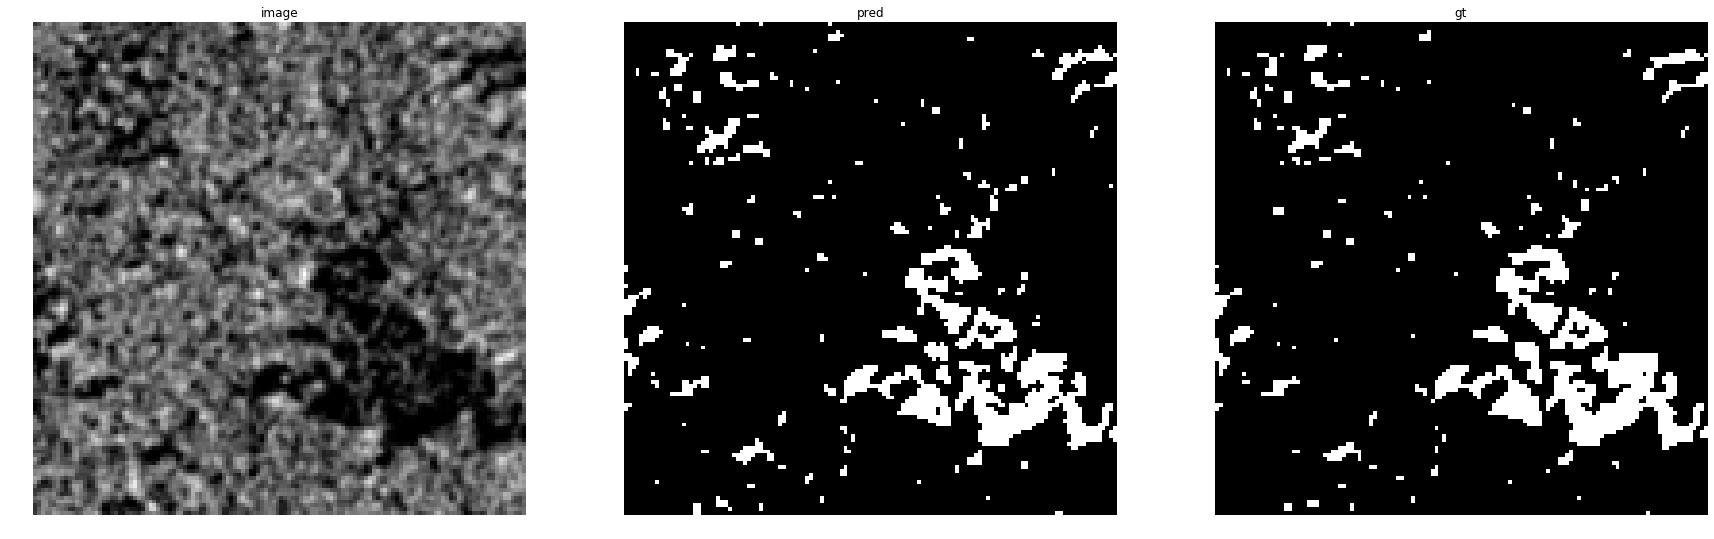

accuracy    : 0.98590087890625
precision   : 0.9265822784810127
recall      : 0.9271690943635212
f1          : 0.9268755935422602
pr_auc      : 0.98366892164891
iou         : 0.863716814159292


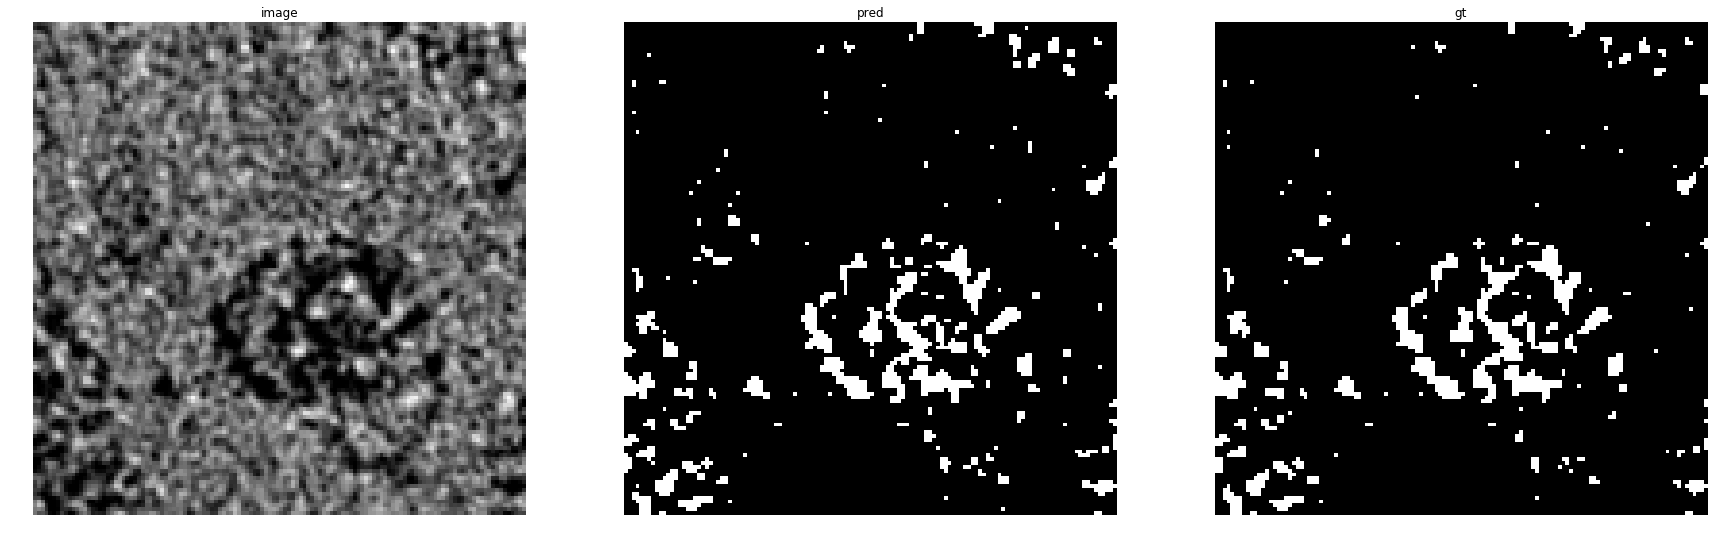

accuracy    : 0.9873046875
precision   : 0.8842364532019704
recall      : 0.9414335664335665
f1          : 0.9119390347163421
pr_auc      : 0.9795725742835839
iou         : 0.8381322957198444


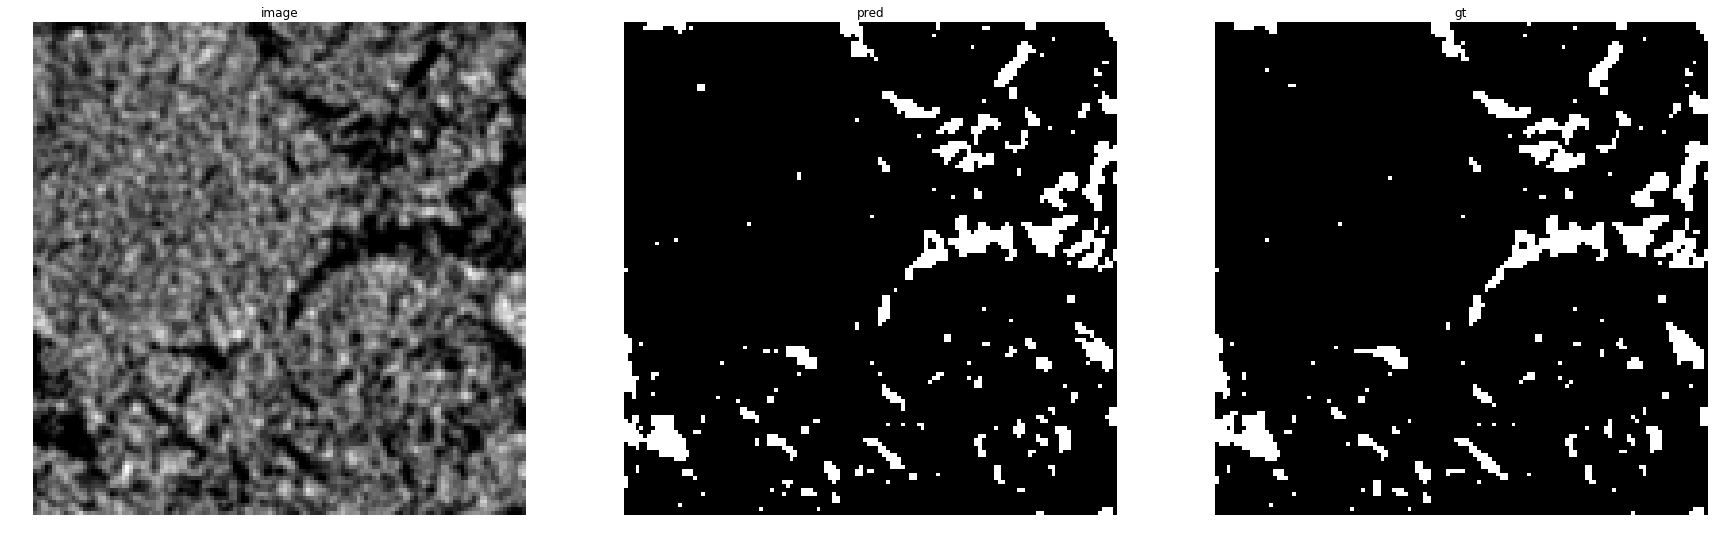

accuracy    : 0.9874267578125
precision   : 0.93943763518385
recall      : 0.9143859649122807
f1          : 0.92674253200569
pr_auc      : 0.982198166650795
iou         : 0.8634857521537442


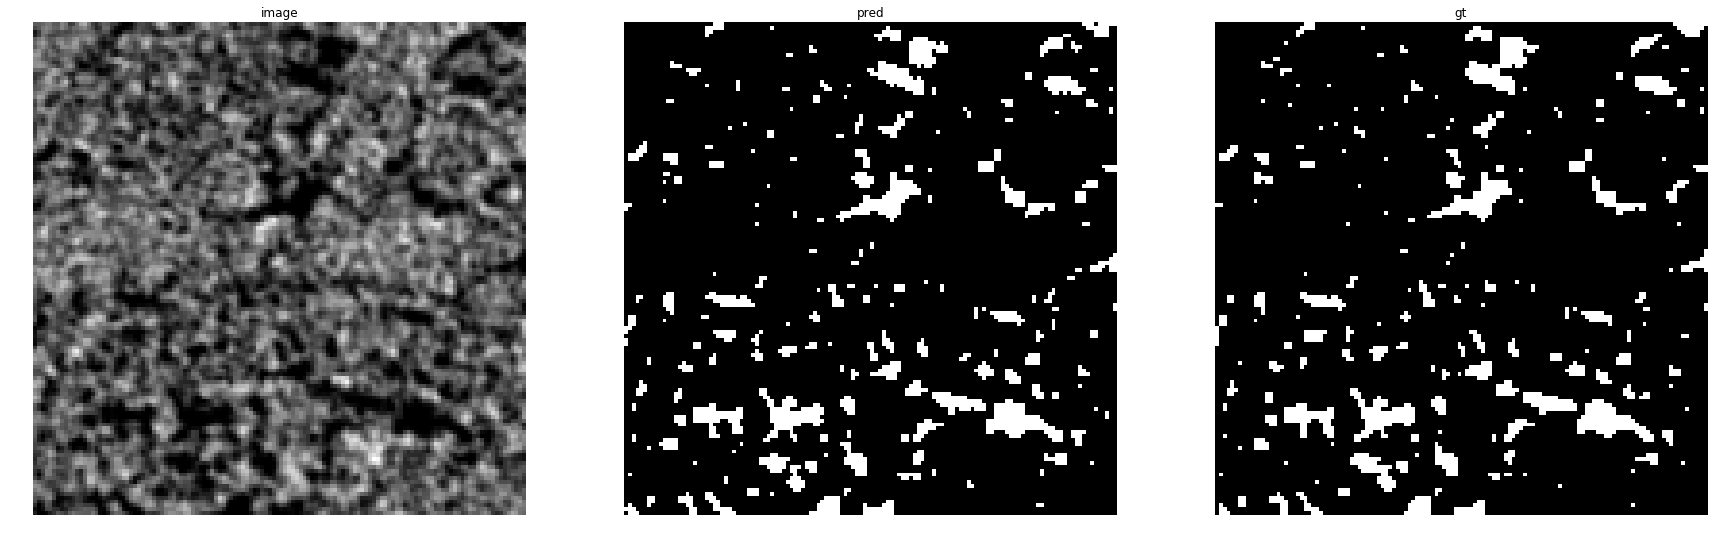

accuracy    : 0.9852294921875
precision   : 0.9141475211608222
recall      : 0.9379652605459057
f1          : 0.9259032455603184
pr_auc      : 0.9852227941572951
iou         : 0.8620296465222349


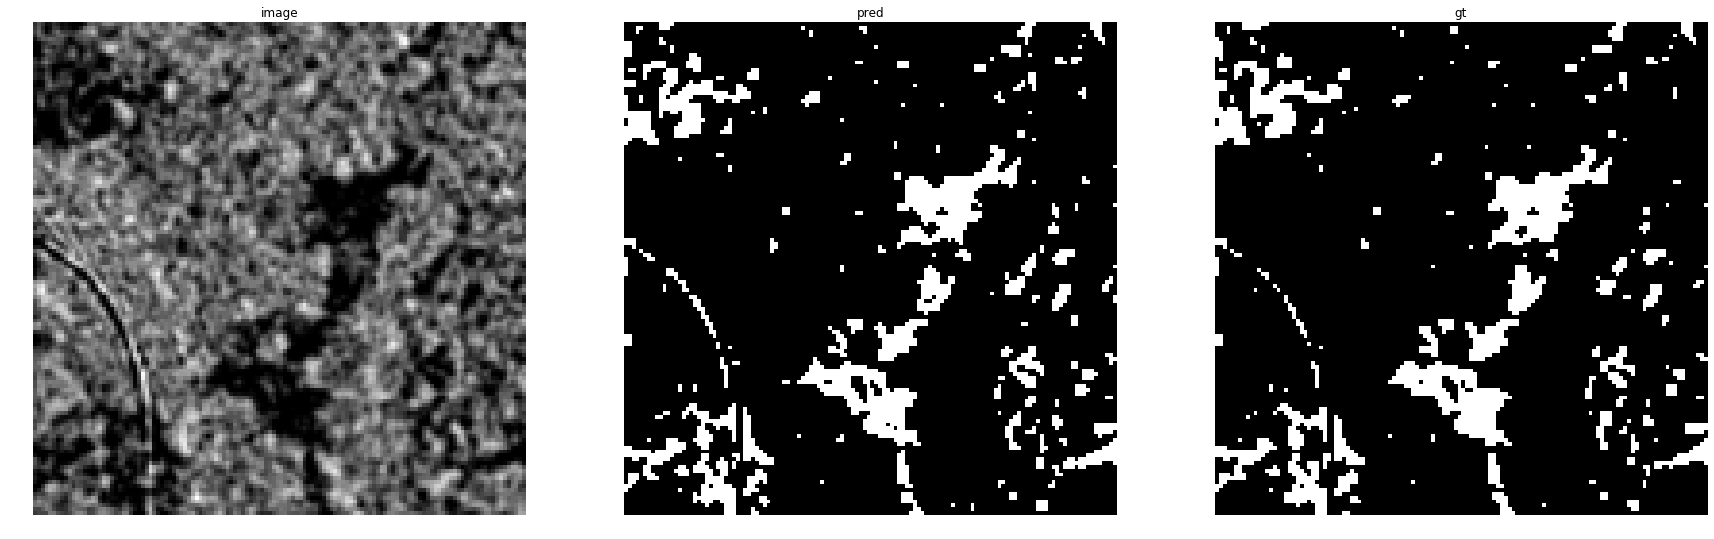

accuracy    : 0.98291015625
precision   : 0.926899187768753
recall      : 0.9385582970488631
f1          : 0.9326923076923077
pr_auc      : 0.9852549443057939
iou         : 0.8738738738738738


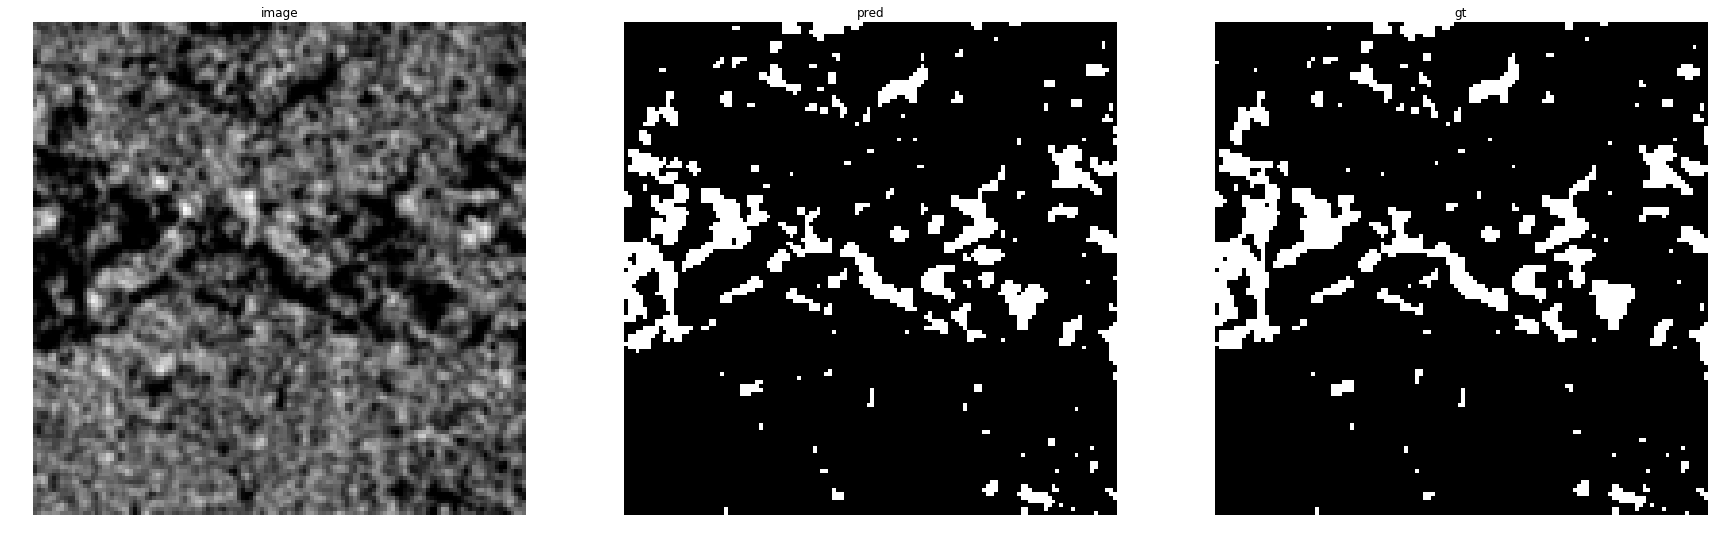

accuracy    : 0.9842529296875
precision   : 0.9572004028197382
recall      : 0.916586306653809
f1          : 0.9364532019704433
pr_auc      : 0.986621748329663
iou         : 0.8805002315886985


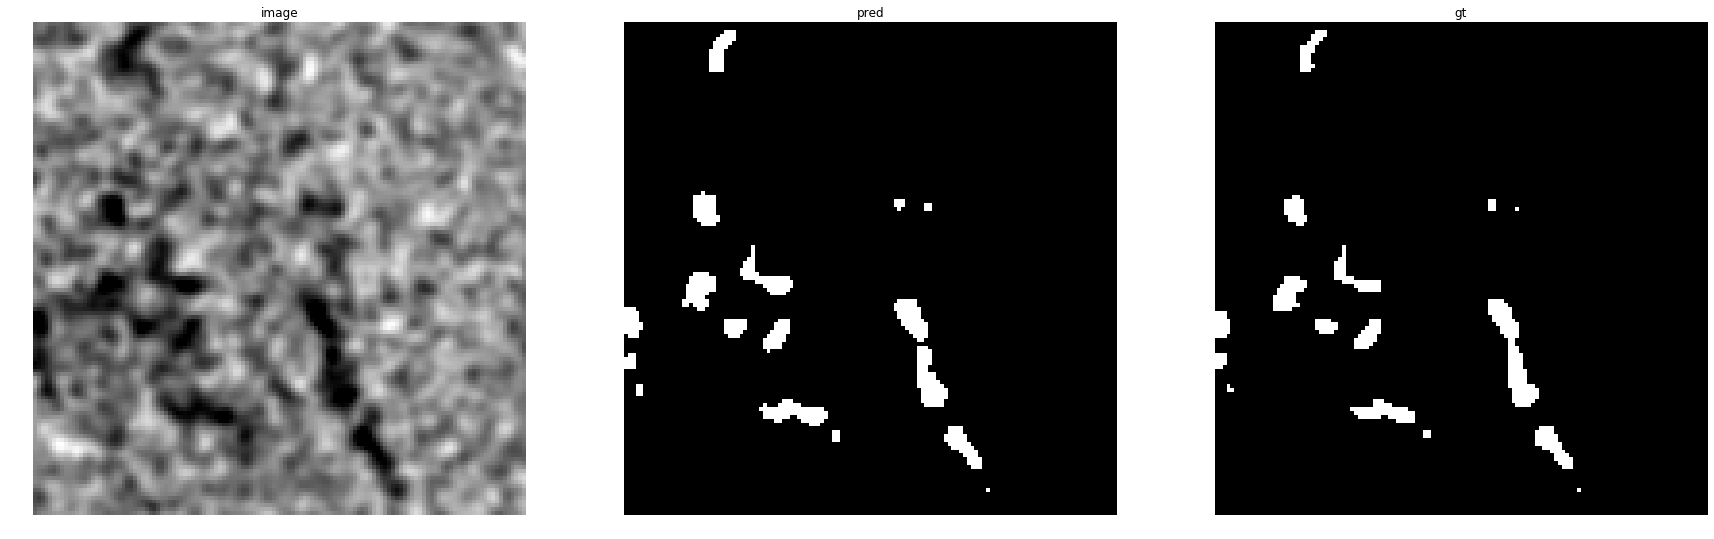

accuracy    : 0.99249267578125
precision   : 0.8283828382838284
recall      : 0.963531669865643
f1          : 0.8908606921029282
pr_auc      : 0.9731788715698404
iou         : 0.8032


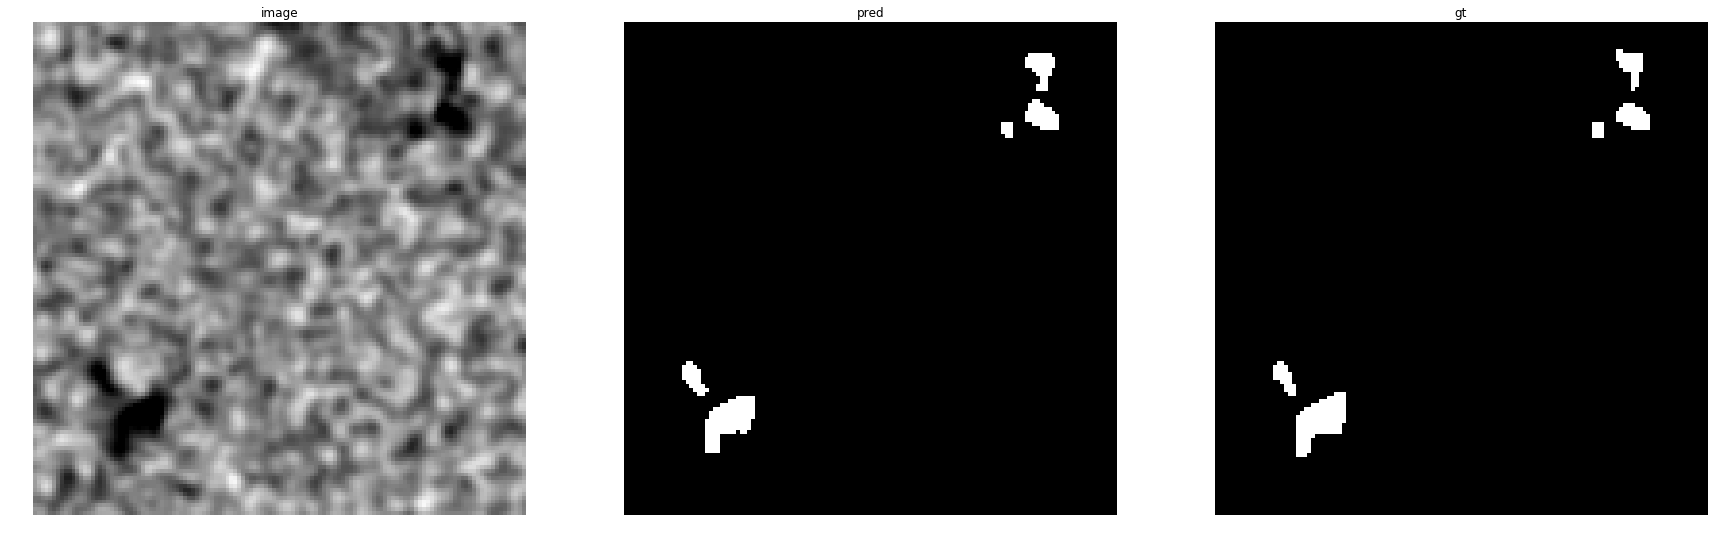

accuracy    : 0.998046875
precision   : 0.9363295880149812
recall      : 0.9433962264150944
f1          : 0.9398496240601504
pr_auc      : 0.9896750410496682
iou         : 0.8865248226950354


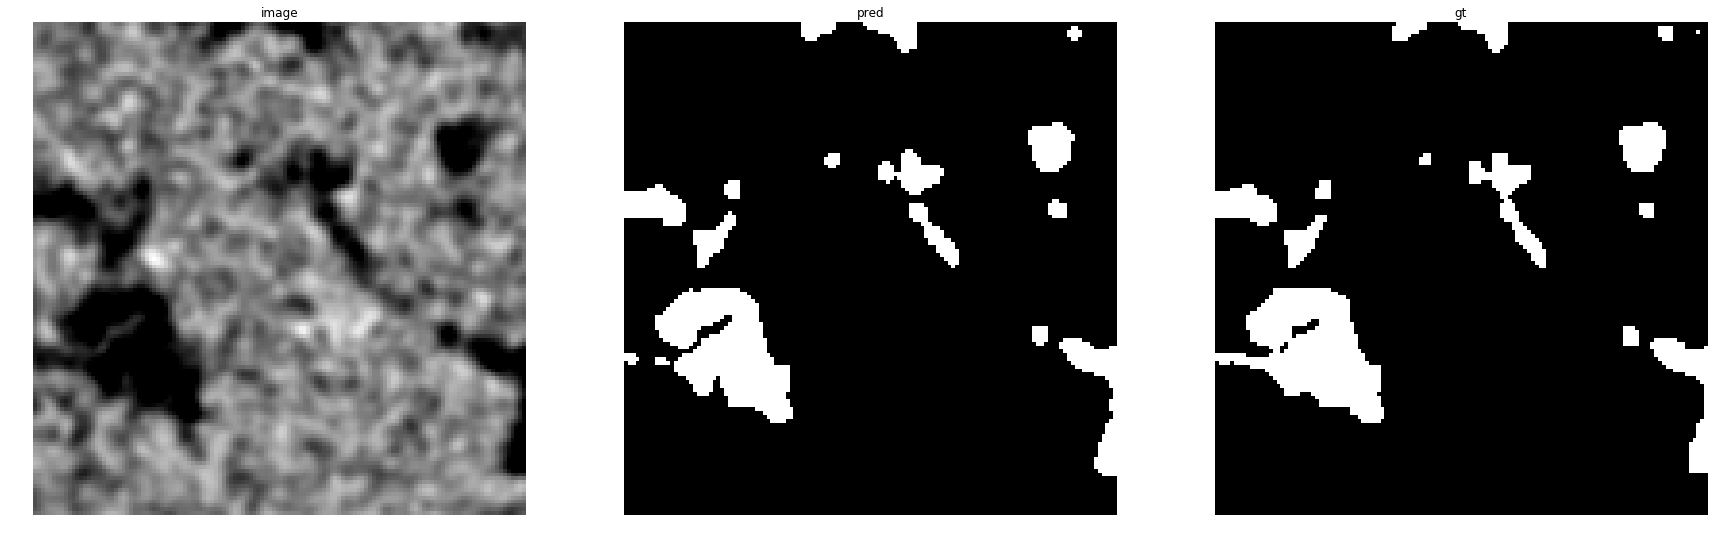

accuracy    : 0.990234375
precision   : 0.963125
recall      : 0.938489646772229
f1          : 0.9506477483035163
pr_auc      : 0.9938179675313664
iou         : 0.9059376837154615


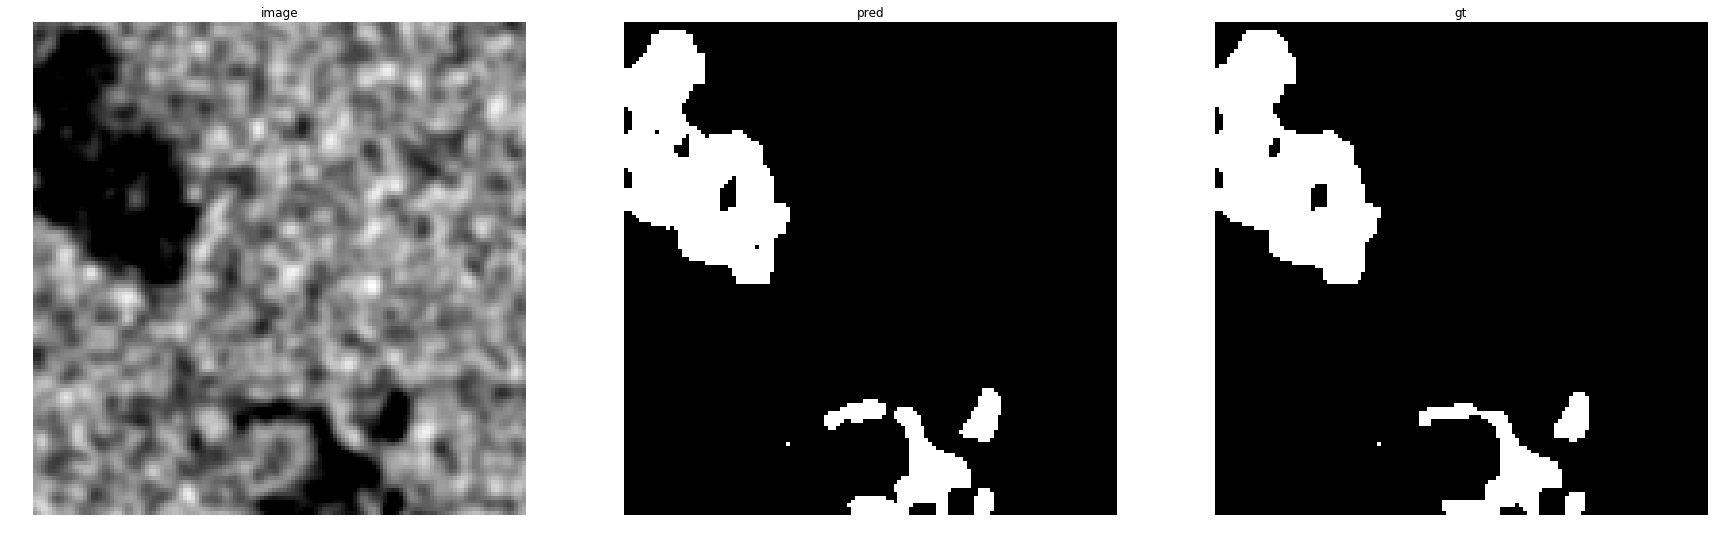

accuracy    : 0.9932861328125
precision   : 0.968823807274445
recall      : 0.9789976133651551
f1          : 0.9738841405508072
pr_auc      : 0.9980749666914821
iou         : 0.9490976399814901


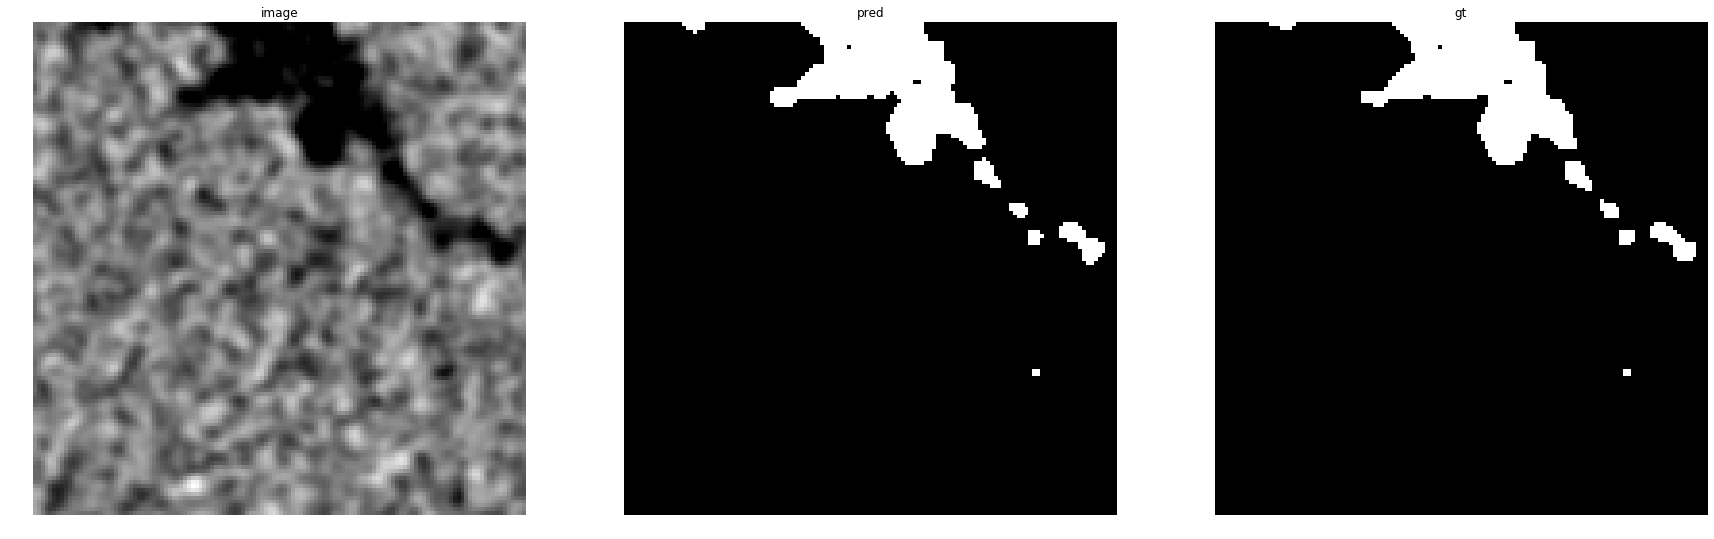

accuracy    : 0.99652099609375
precision   : 0.9844290657439446
recall      : 0.9668649107901445
f1          : 0.9755679382768967
pr_auc      : 0.9983646542669229
iou         : 0.9523012552301255


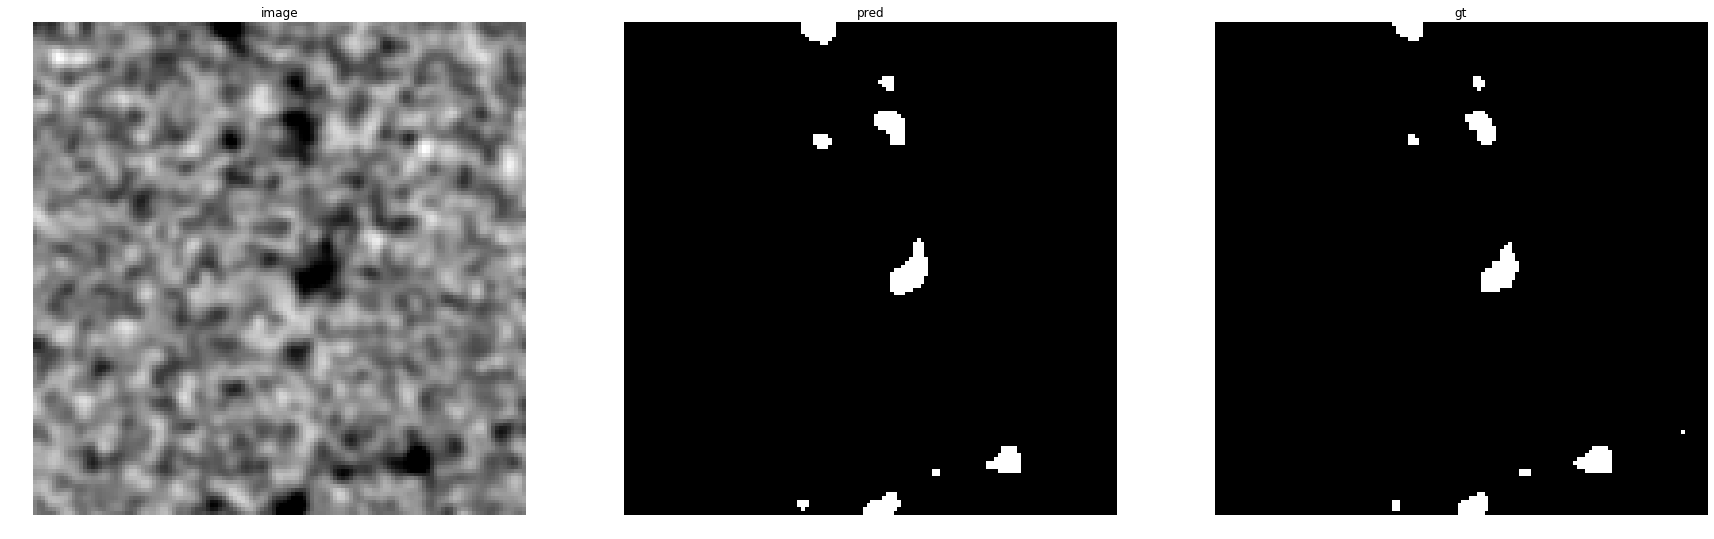

accuracy    : 0.99591064453125
precision   : 0.8366013071895425
recall      : 0.9377289377289377
f1          : 0.8842832469775476
pr_auc      : 0.9754625193470414
iou         : 0.7925696594427245


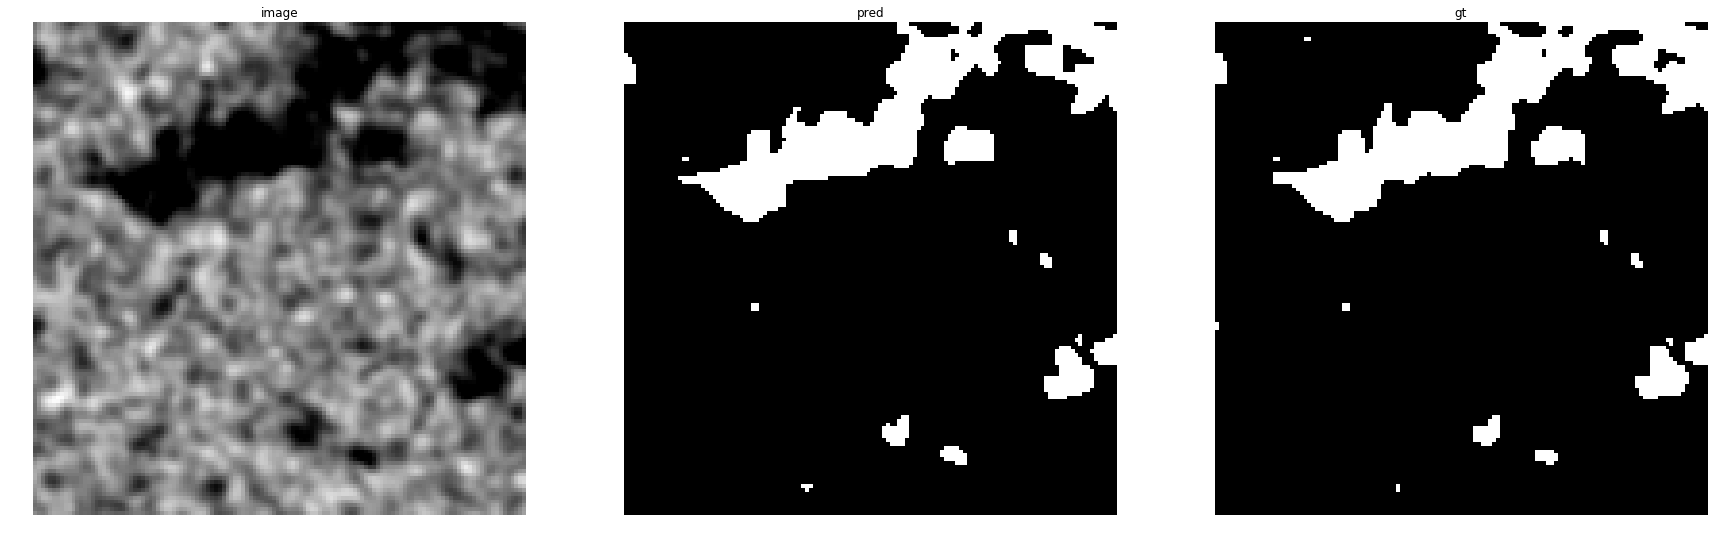

accuracy    : 0.9915771484375
precision   : 0.9848706686188384
recall      : 0.9496470588235294
f1          : 0.9669381887877336
pr_auc      : 0.9971080539511527
iou         : 0.9359925788497218


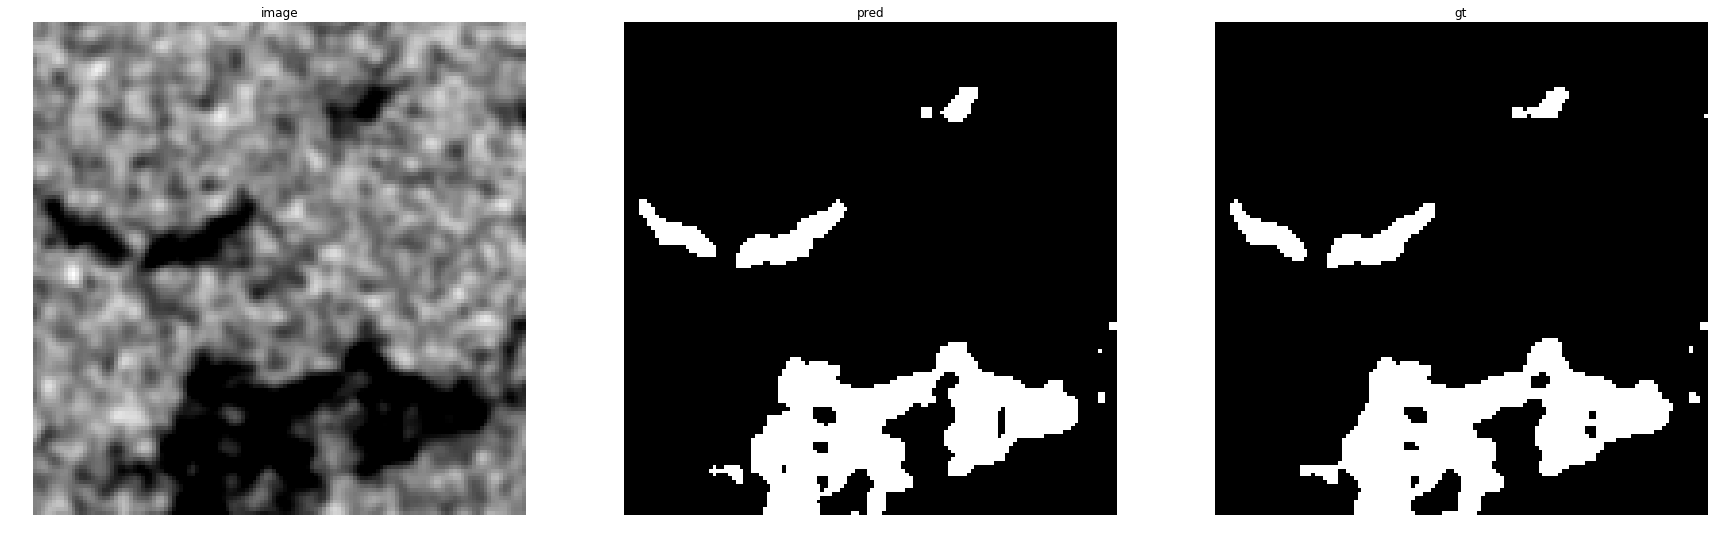

accuracy    : 0.9898681640625
precision   : 0.9871908127208481
recall      : 0.9422428330522765
f1          : 0.9641932700603968
pr_auc      : 0.9973942703878627
iou         : 0.9308621407746772


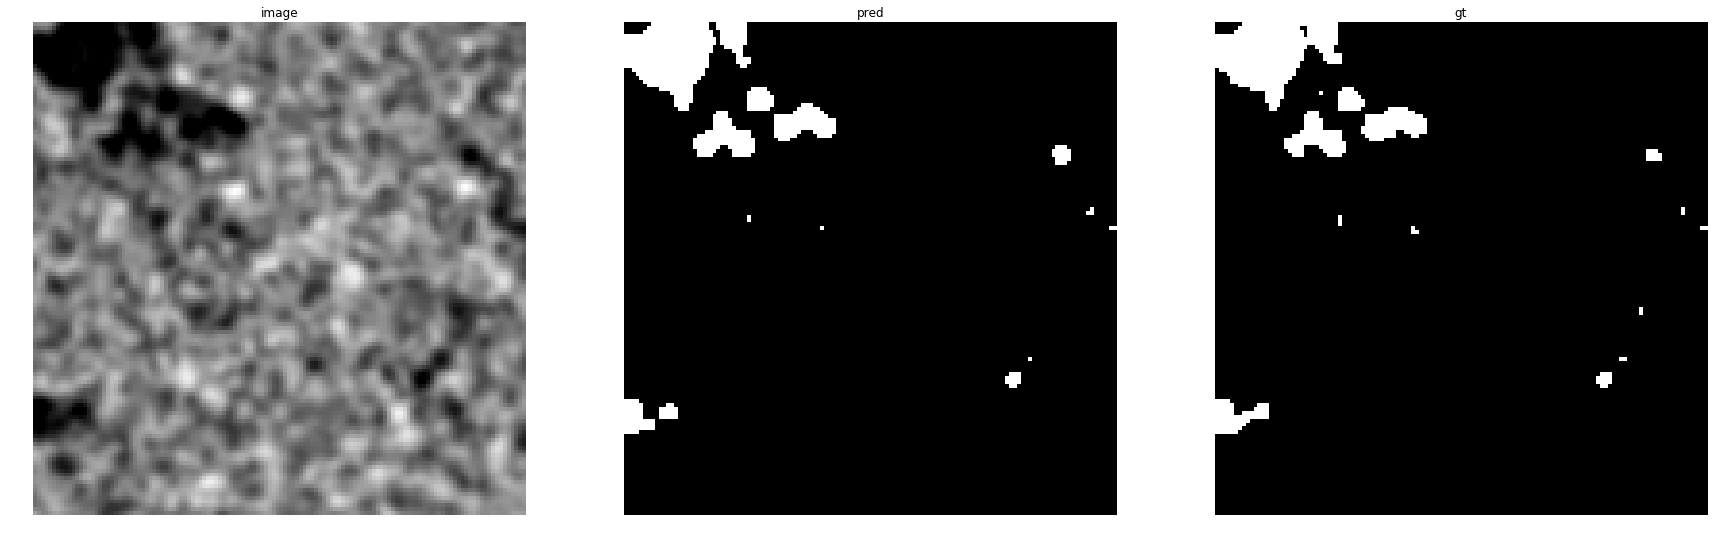

accuracy    : 0.995361328125
precision   : 0.9548306148055207
recall      : 0.9500624219725343
f1          : 0.9524405506883604
pr_auc      : 0.9930108874632056
iou         : 0.9091995221027479


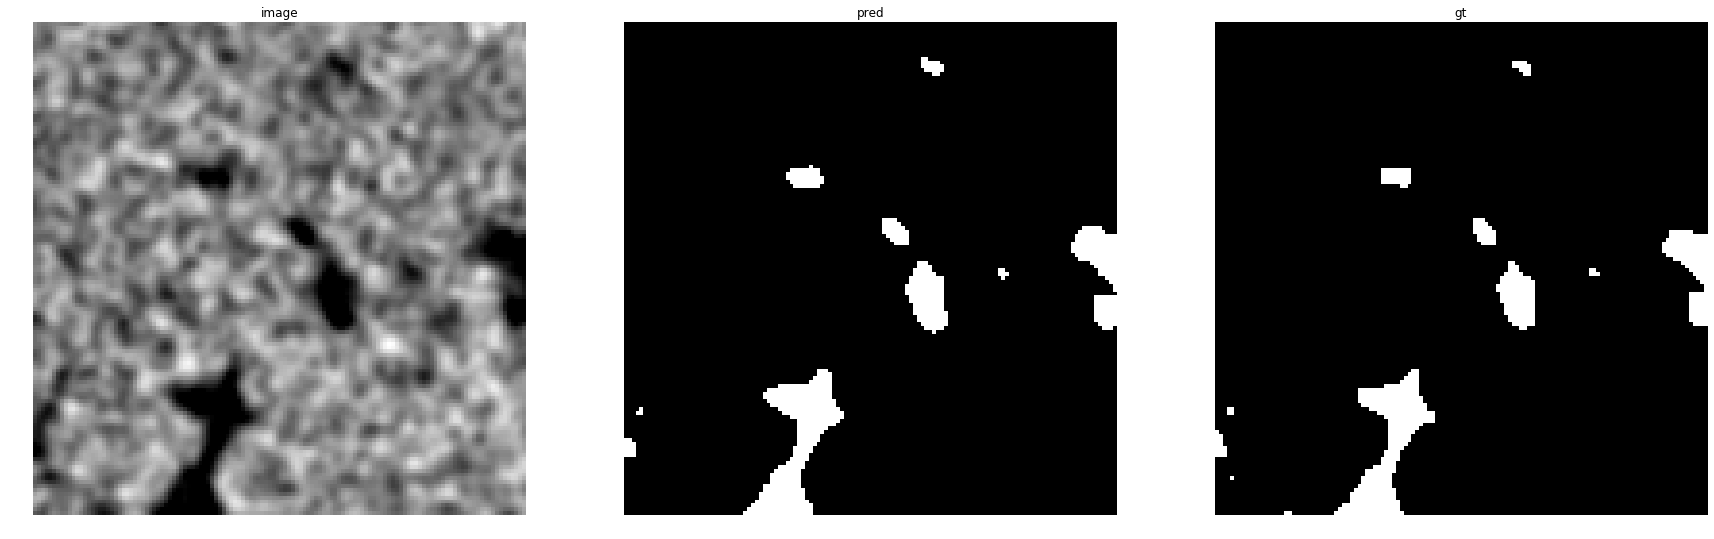

accuracy    : 0.99371337890625
precision   : 0.8944174757281553
recall      : 0.9787516600265604
f1          : 0.9346861128725428
pr_auc      : 0.9918082226966118
iou         : 0.8773809523809524


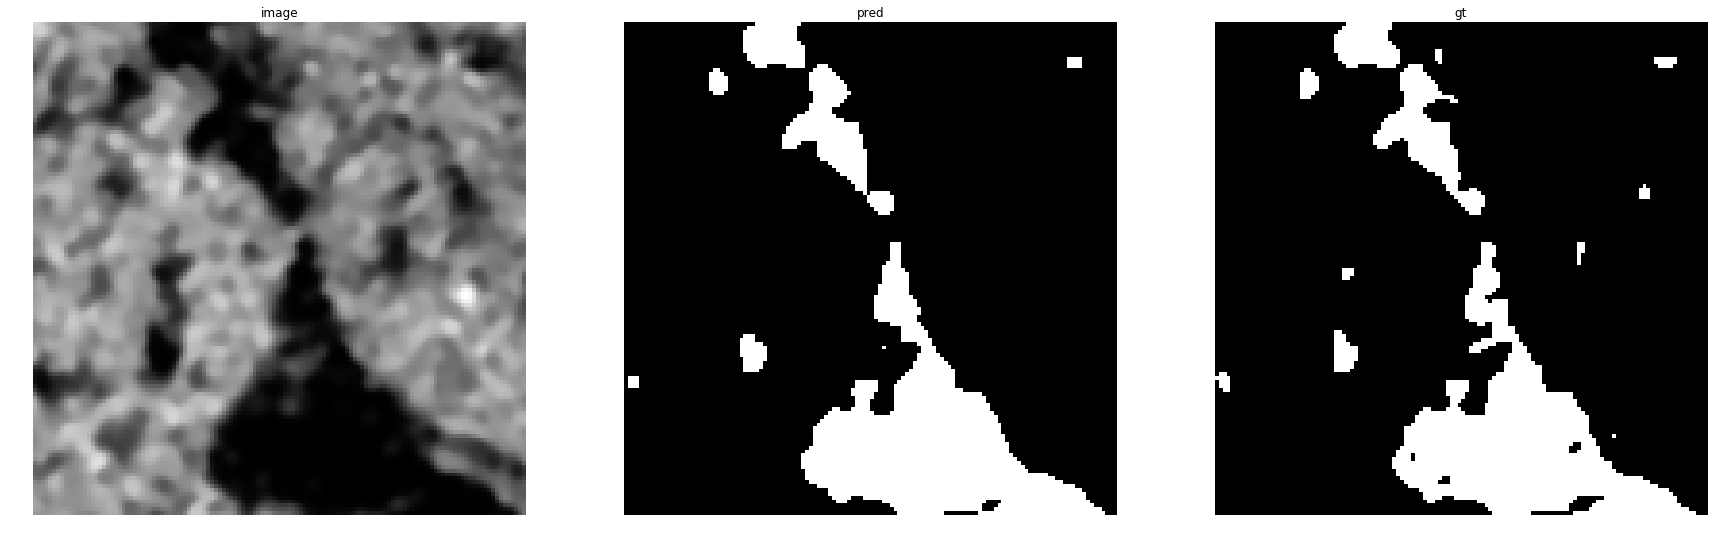

accuracy    : 0.98687744140625
precision   : 0.9515943142527853
recall      : 0.965315666406859
f1          : 0.9584058812149353
pr_auc      : 0.9954371758312883
iou         : 0.9201337295690936


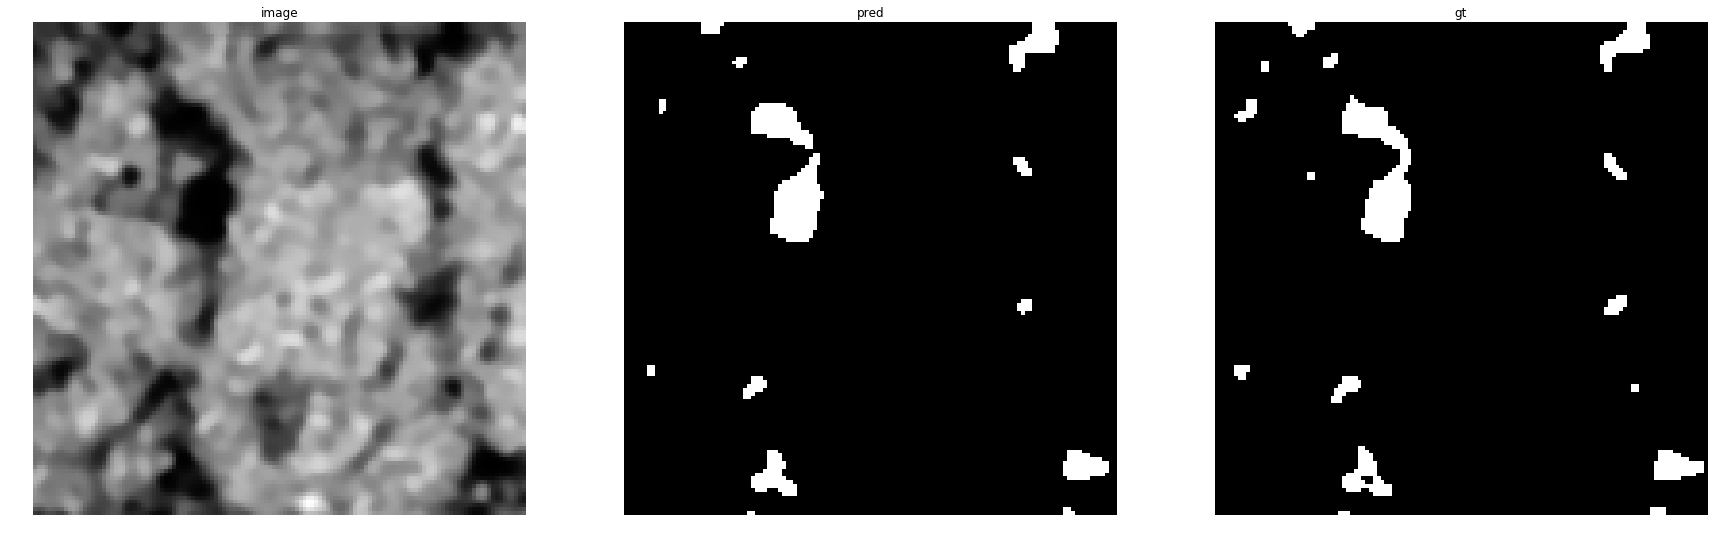

accuracy    : 0.99188232421875
precision   : 0.9496951219512195
recall      : 0.8616874135546335
f1          : 0.9035532994923858
pr_auc      : 0.9824932245865353
iou         : 0.8240740740740741


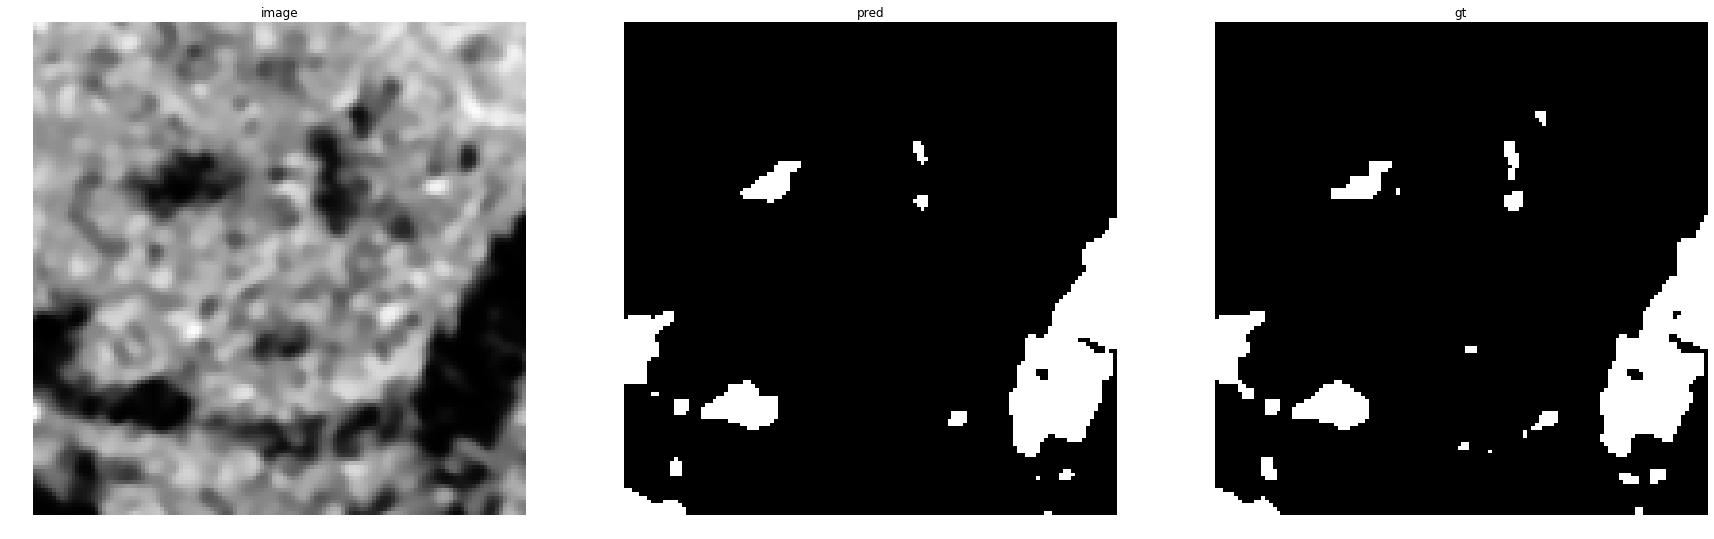

accuracy    : 0.99053955078125
precision   : 0.9665551839464883
recall      : 0.932258064516129
f1          : 0.949096880131363
pr_auc      : 0.9930148956284822
iou         : 0.903125


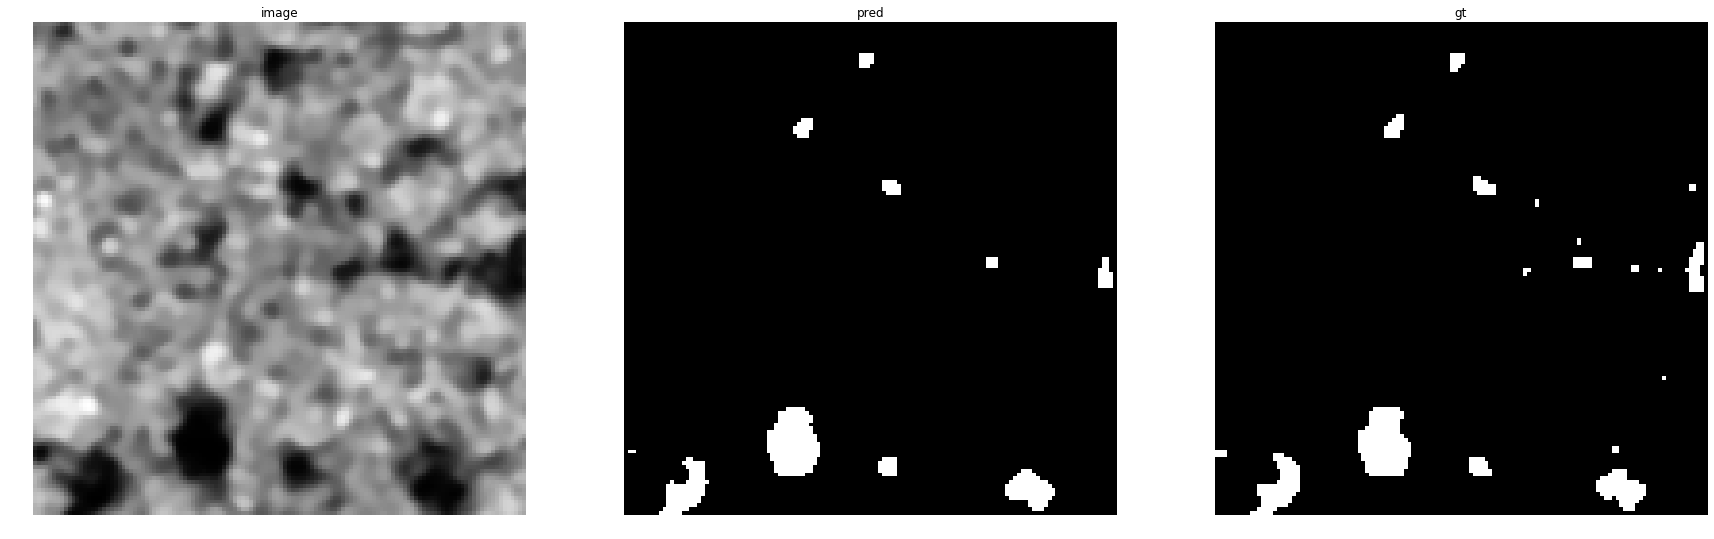

accuracy    : 0.99359130859375
precision   : 0.9613821138211383
recall      : 0.8461538461538461
f1          : 0.9000951474785918
pr_auc      : 0.9774841604368558
iou         : 0.8183391003460208


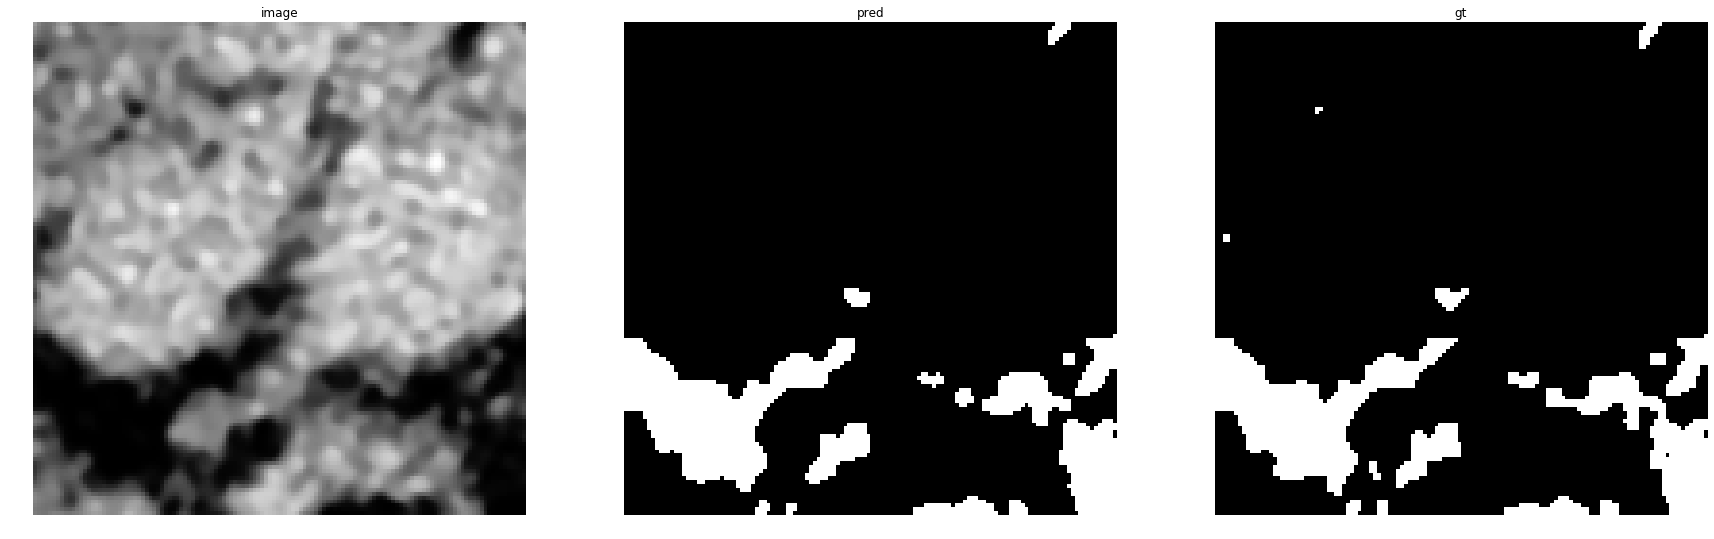

accuracy    : 0.98992919921875
precision   : 0.9615384615384616
recall      : 0.9541984732824428
f1          : 0.9578544061302683
pr_auc      : 0.9950046271878784
iou         : 0.9191176470588235


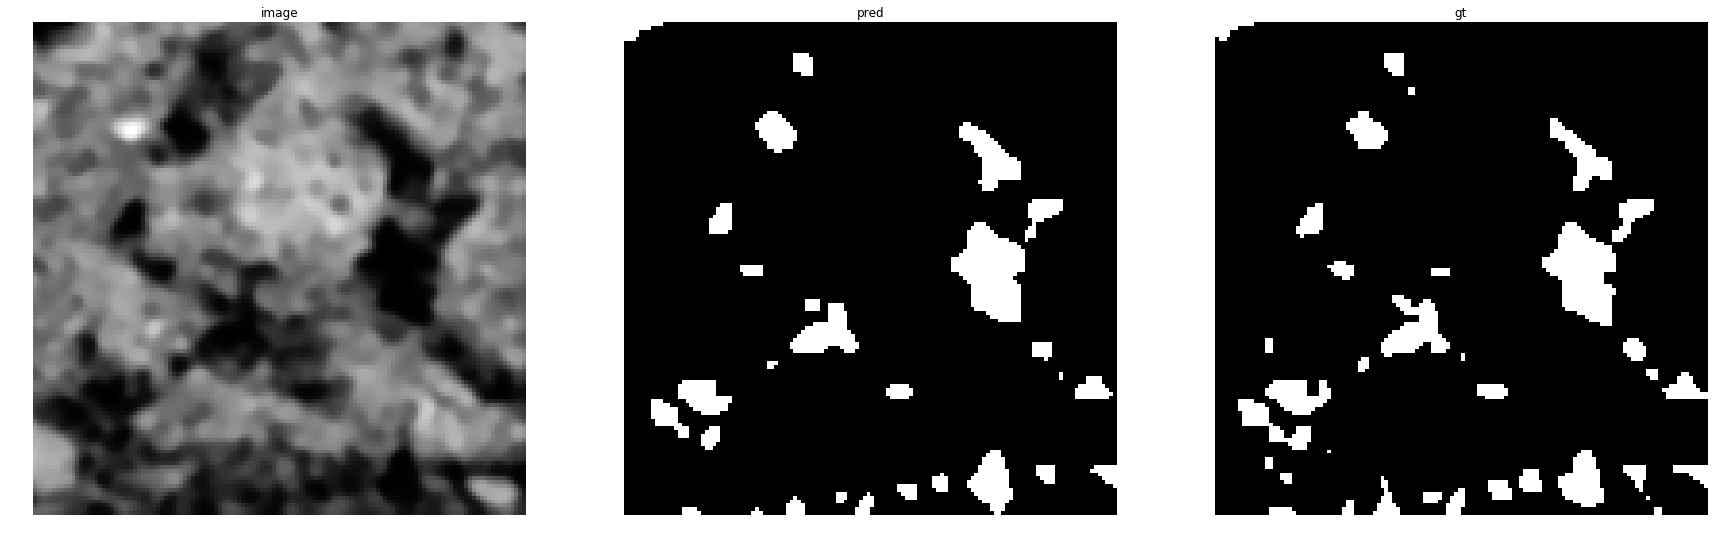

accuracy    : 0.98284912109375
precision   : 0.9559794570799707
recall      : 0.85498687664042
f1          : 0.9026671285071008
pr_auc      : 0.9769770419133343
iou         : 0.82260101010101


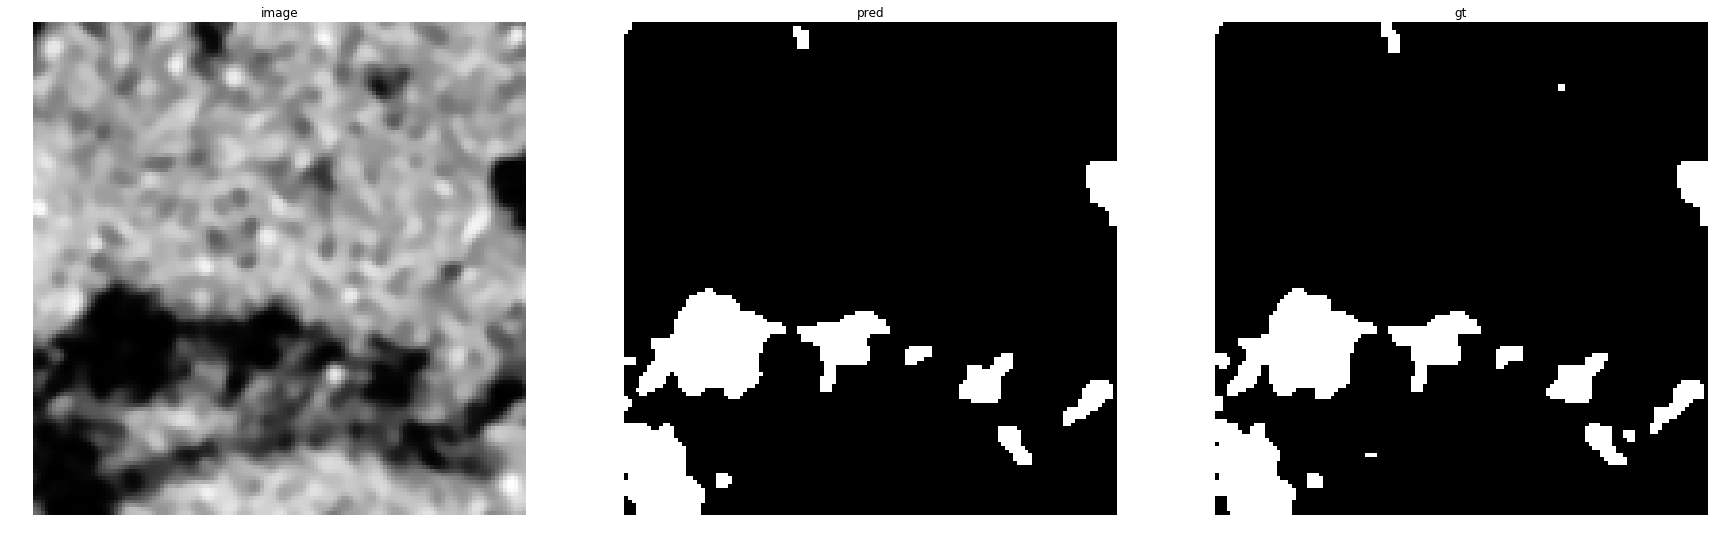

accuracy    : 0.99224853515625
precision   : 0.9730700179533214
recall      : 0.9519906323185011
f1          : 0.9624149156555195
pr_auc      : 0.9950001701880911
iou         : 0.9275527666856817


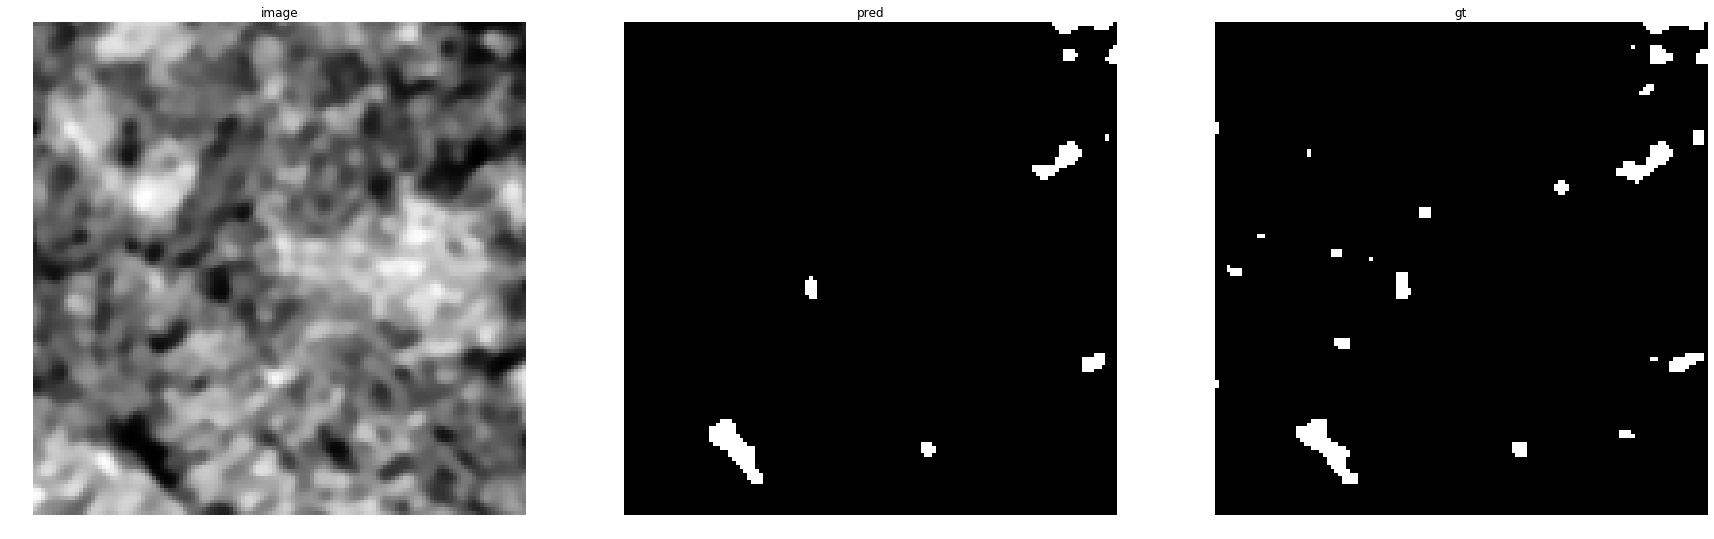

accuracy    : 0.99102783203125
precision   : 0.96875
recall      : 0.6408268733850129
f1          : 0.7713841368584758
pr_auc      : 0.9384901890208072
iou         : 0.6278481012658228


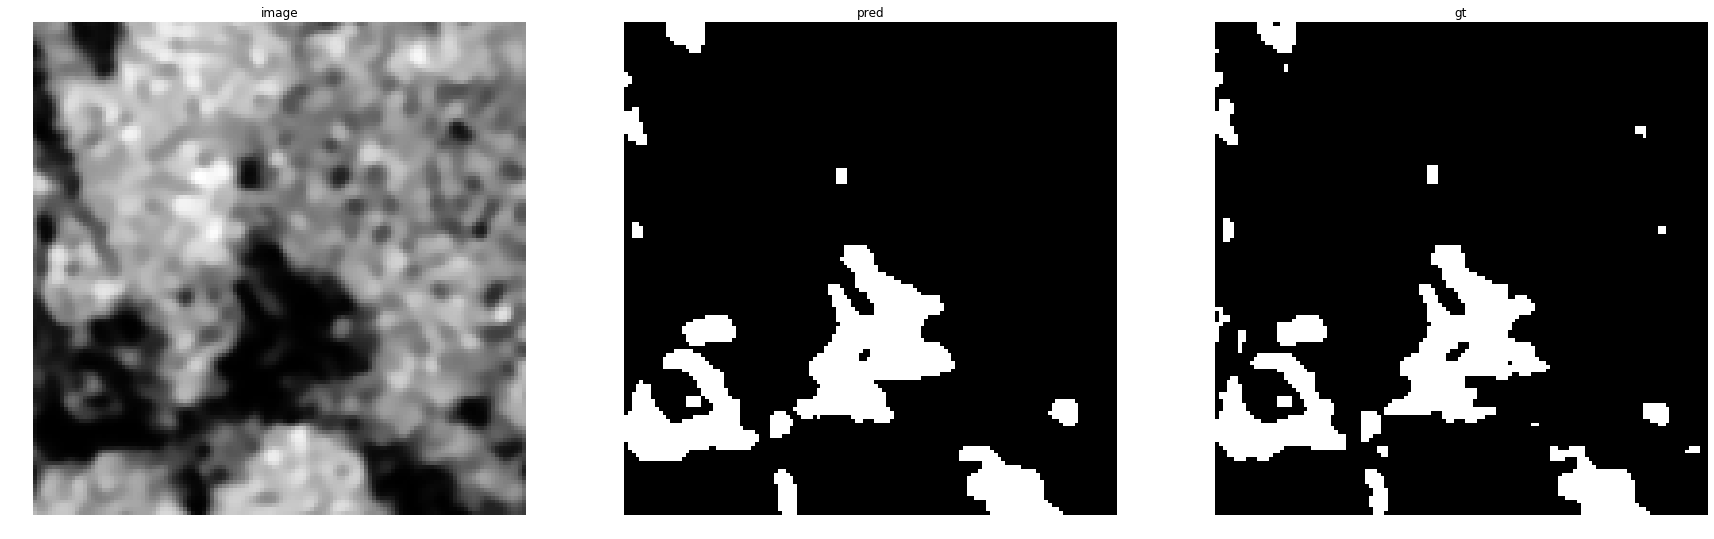

accuracy    : 0.9844970703125
precision   : 0.9310014374700527
recall      : 0.9464198733560643
f1          : 0.938647342995169
pr_auc      : 0.9881952874451633
iou         : 0.8843878015475649


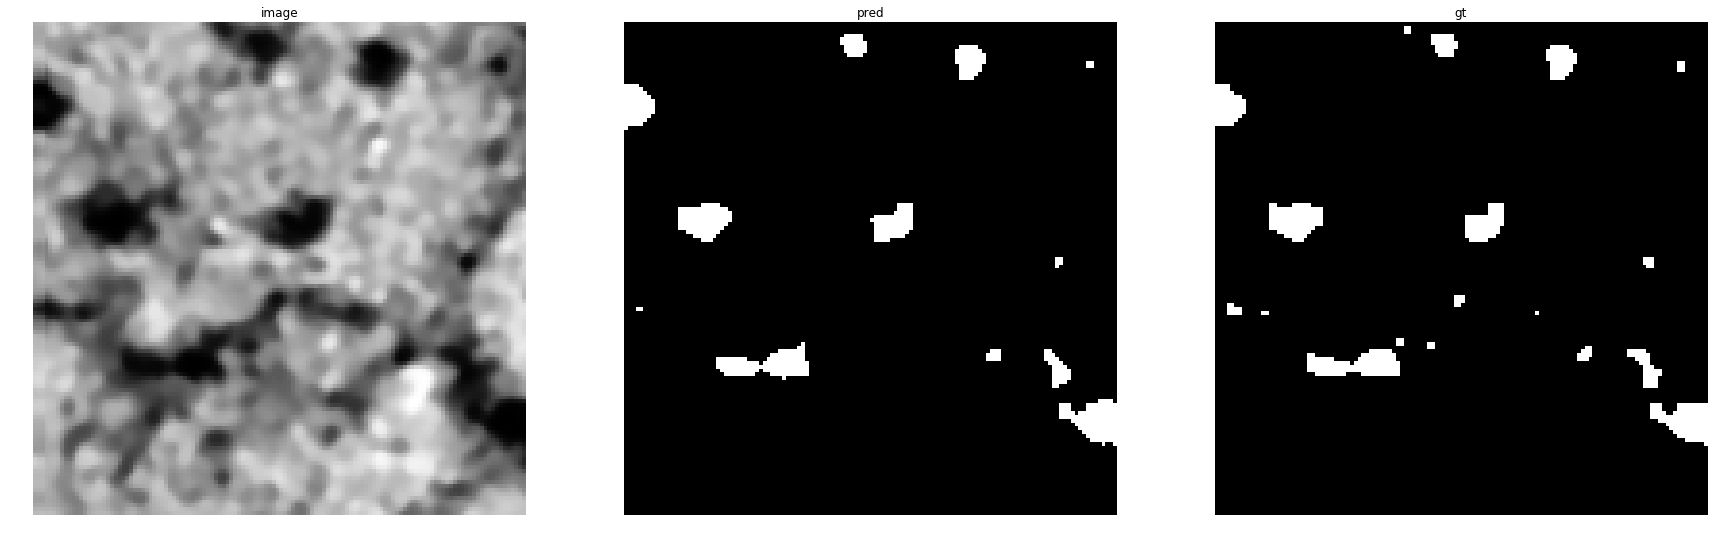

accuracy    : 0.994873046875
precision   : 0.9594383775351014
recall      : 0.9138187221396731
f1          : 0.9360730593607306
pr_auc      : 0.9855362262735095
iou         : 0.8798283261802575


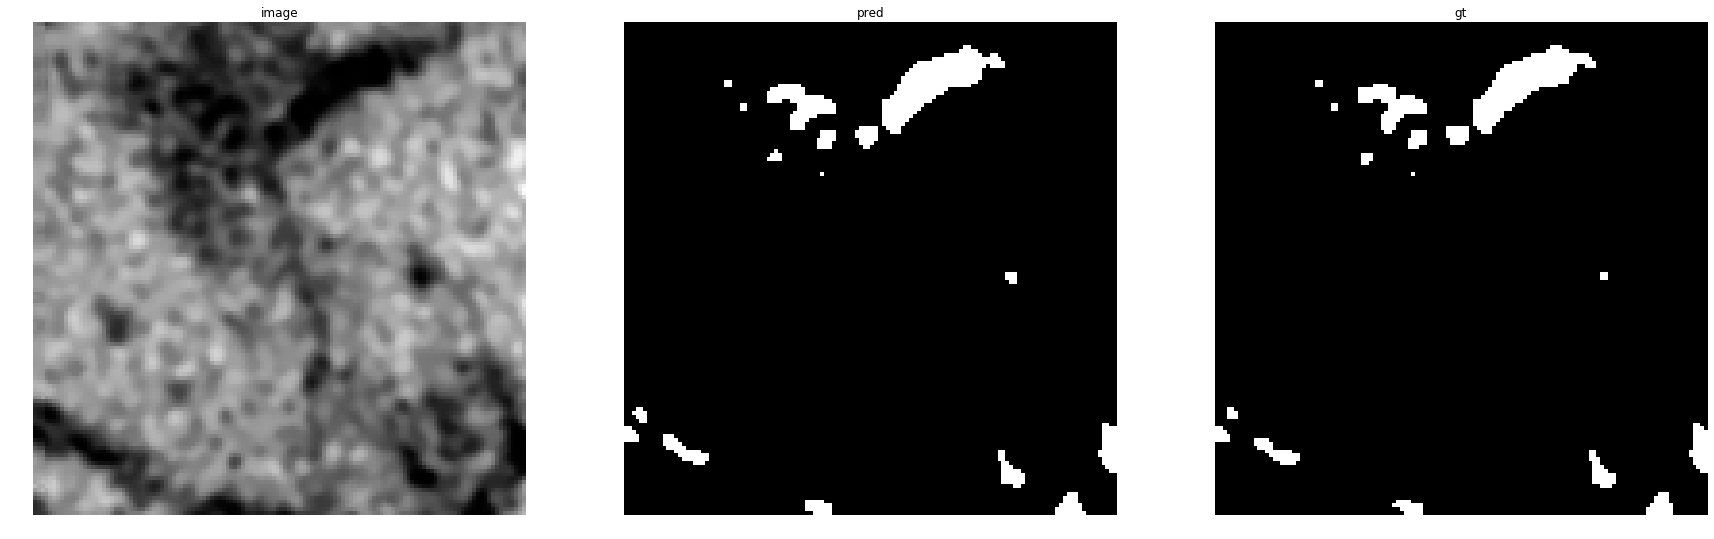

accuracy    : 0.9969482421875
precision   : 0.9513274336283186
recall      : 0.974320241691843
f1          : 0.9626865671641791
pr_auc      : 0.9960192106739327
iou         : 0.9280575539568345


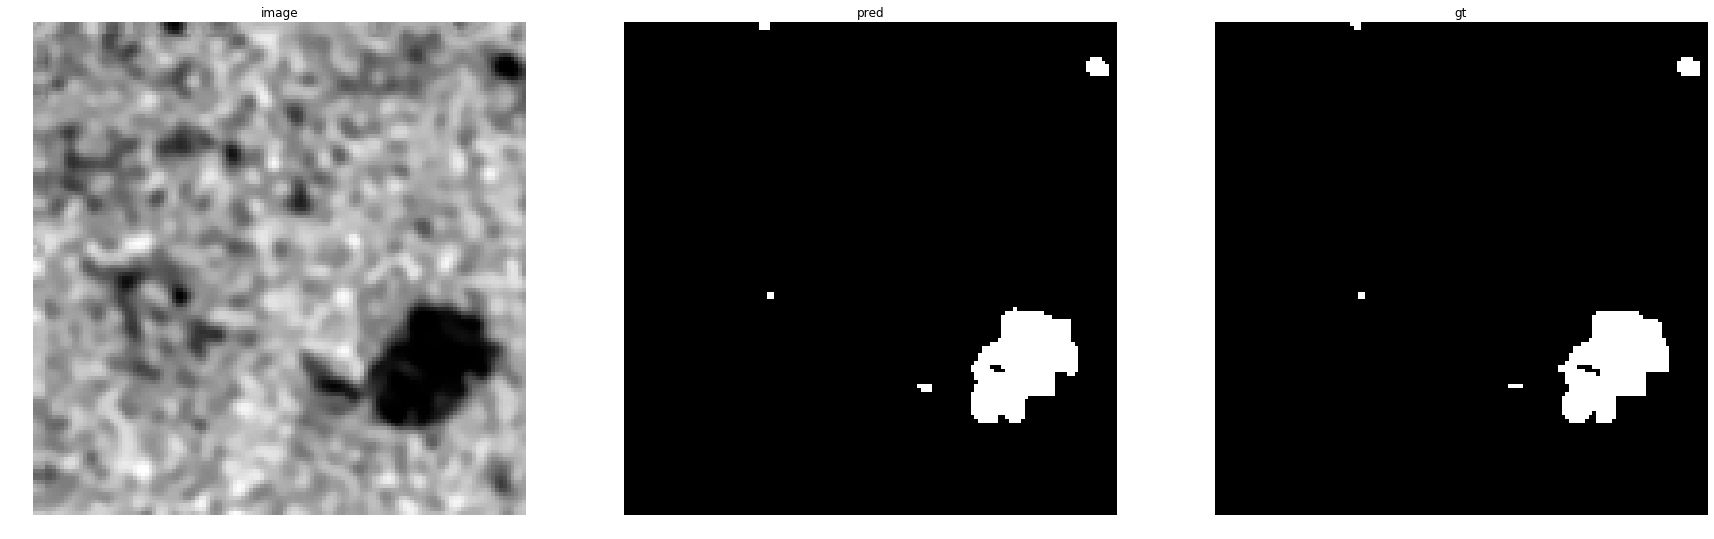

accuracy    : 0.99853515625
precision   : 0.9713804713804713
recall      : 0.988013698630137
f1          : 0.9796264855687605
pr_auc      : 0.9986587281390189
iou         : 0.9600665557404326


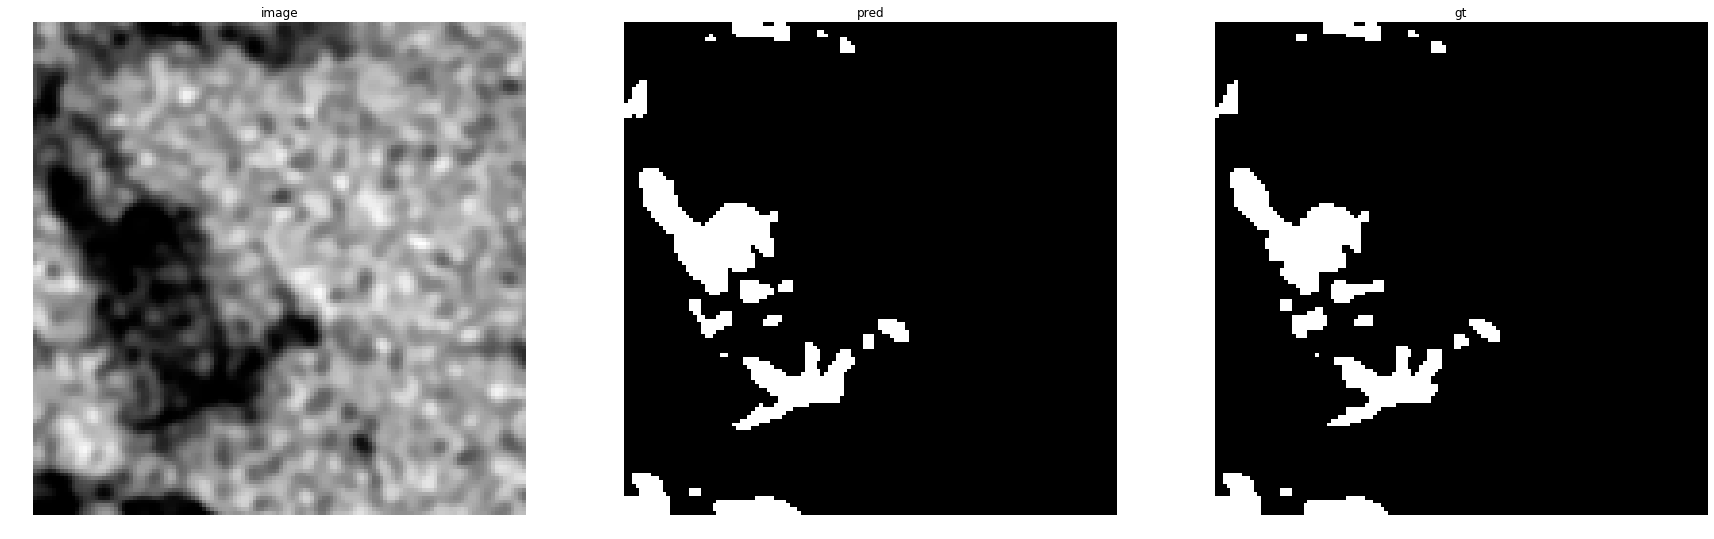

accuracy    : 0.99322509765625
precision   : 0.9371165644171779
recall      : 0.9768185451638689
f1          : 0.9565557729941292
pr_auc      : 0.9950052578702476
iou         : 0.9167291822955739


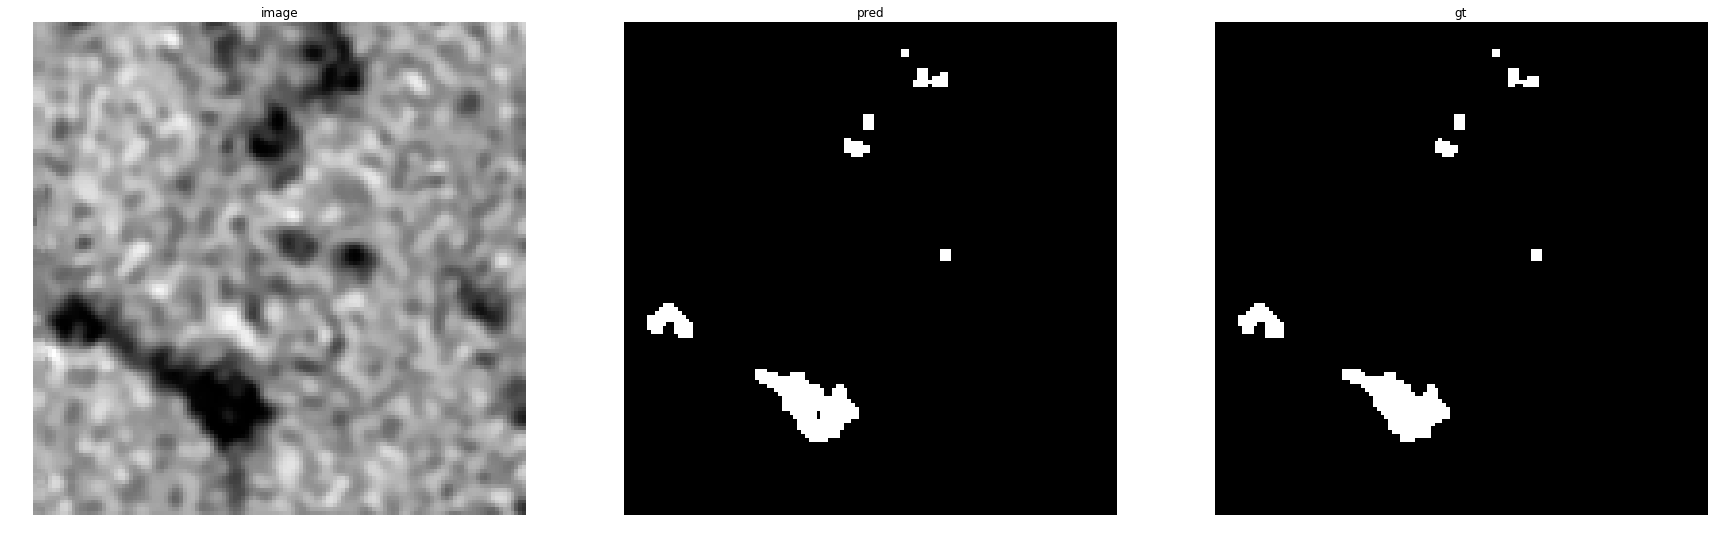

accuracy    : 0.998291015625
precision   : 0.9506172839506173
recall      : 0.9796437659033079
f1          : 0.9649122807017544
pr_auc      : 0.997514425701838
iou         : 0.9322033898305084


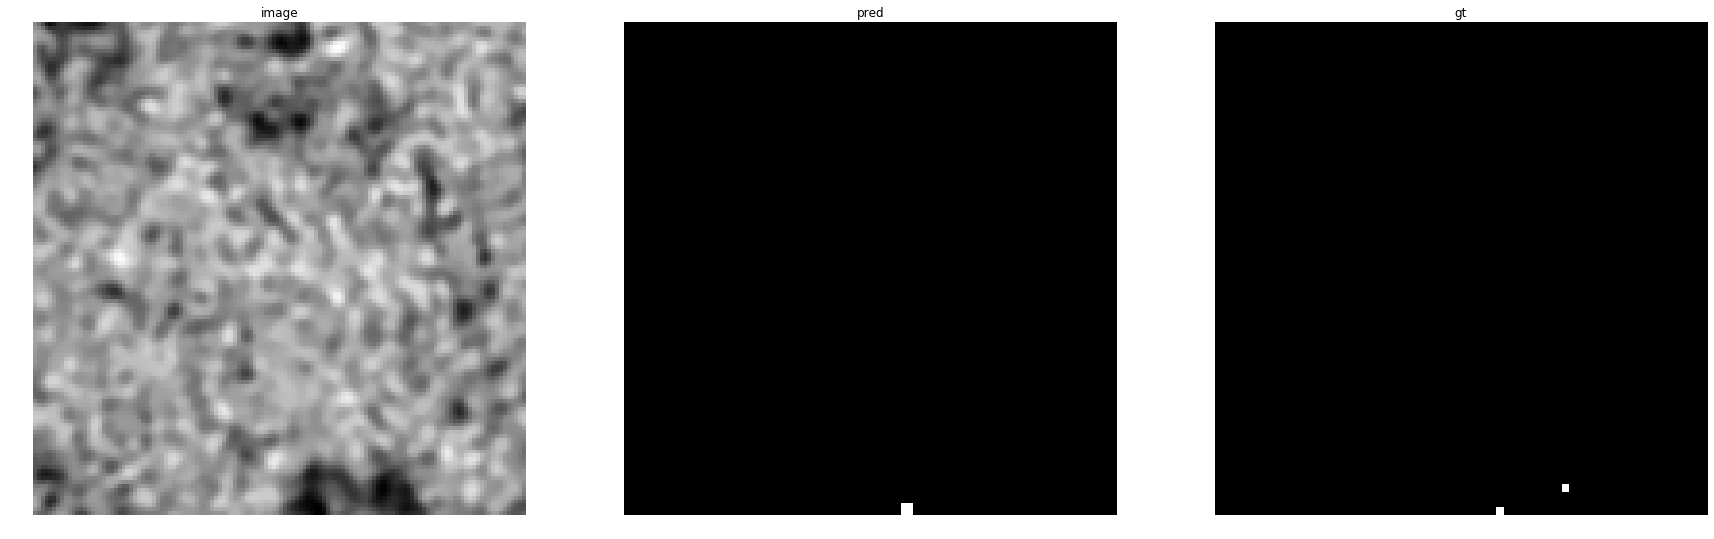

accuracy    : 0.99945068359375
precision   : 0.4444444444444444
recall      : 0.5
f1          : 0.47058823529411764
pr_auc      : 0.7430555555555556
iou         : 0.3076923076923077


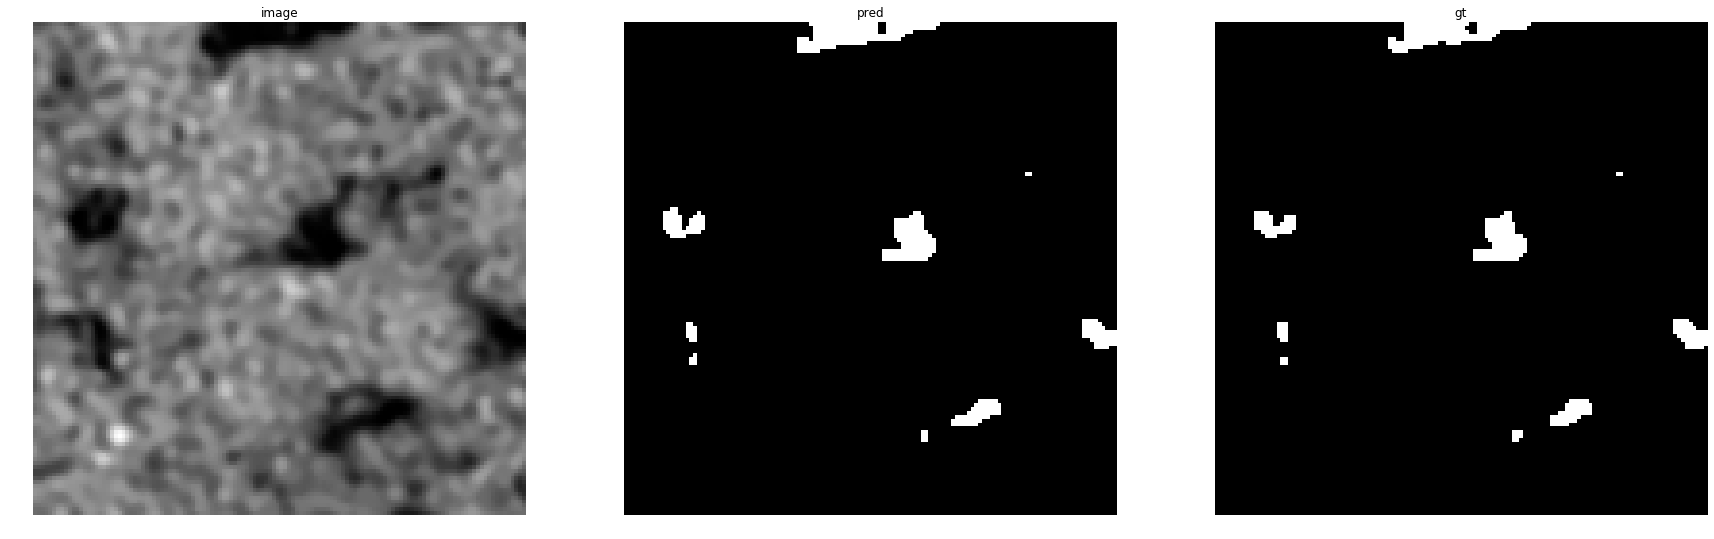

accuracy    : 0.99798583984375
precision   : 0.9447983014861996
recall      : 0.9845132743362832
f1          : 0.9642470205850487
pr_auc      : 0.9954740410300345
iou         : 0.9309623430962343


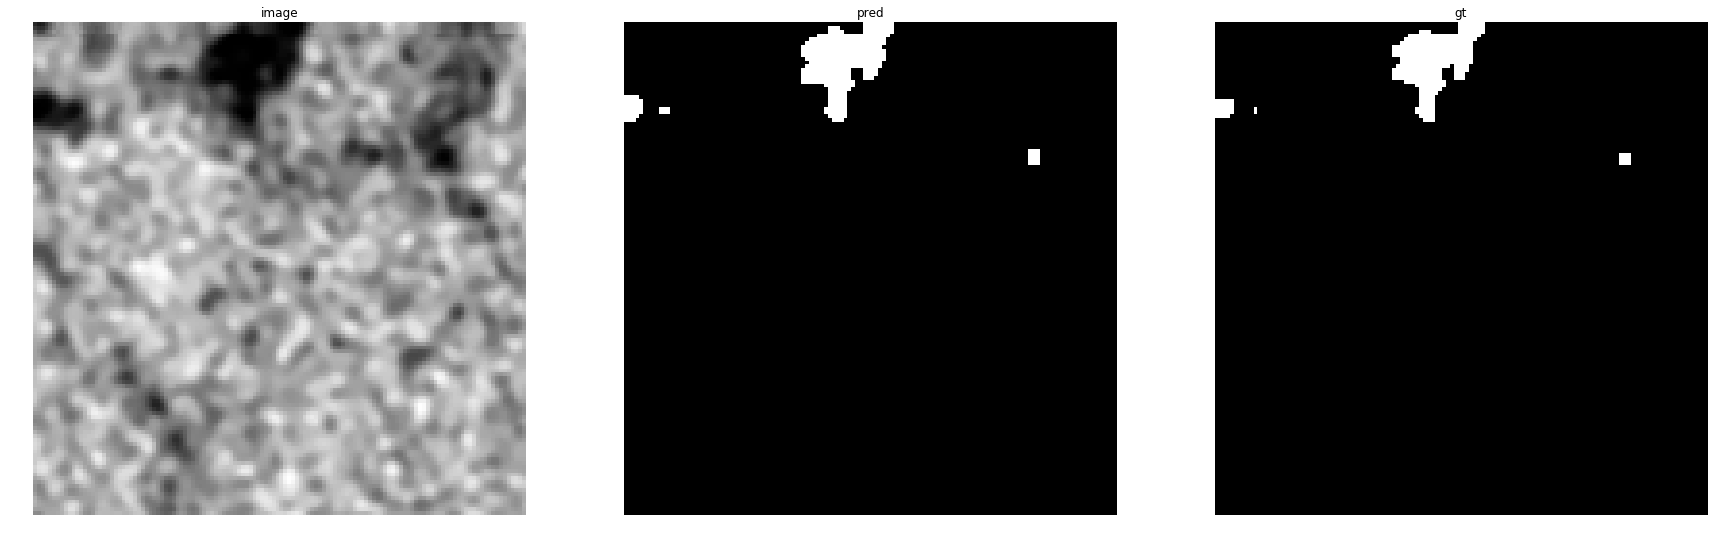

accuracy    : 0.99755859375
precision   : 0.8955613577023499
recall      : 1.0
f1          : 0.9449035812672177
pr_auc      : 0.9978257293304473
iou         : 0.8955613577023499


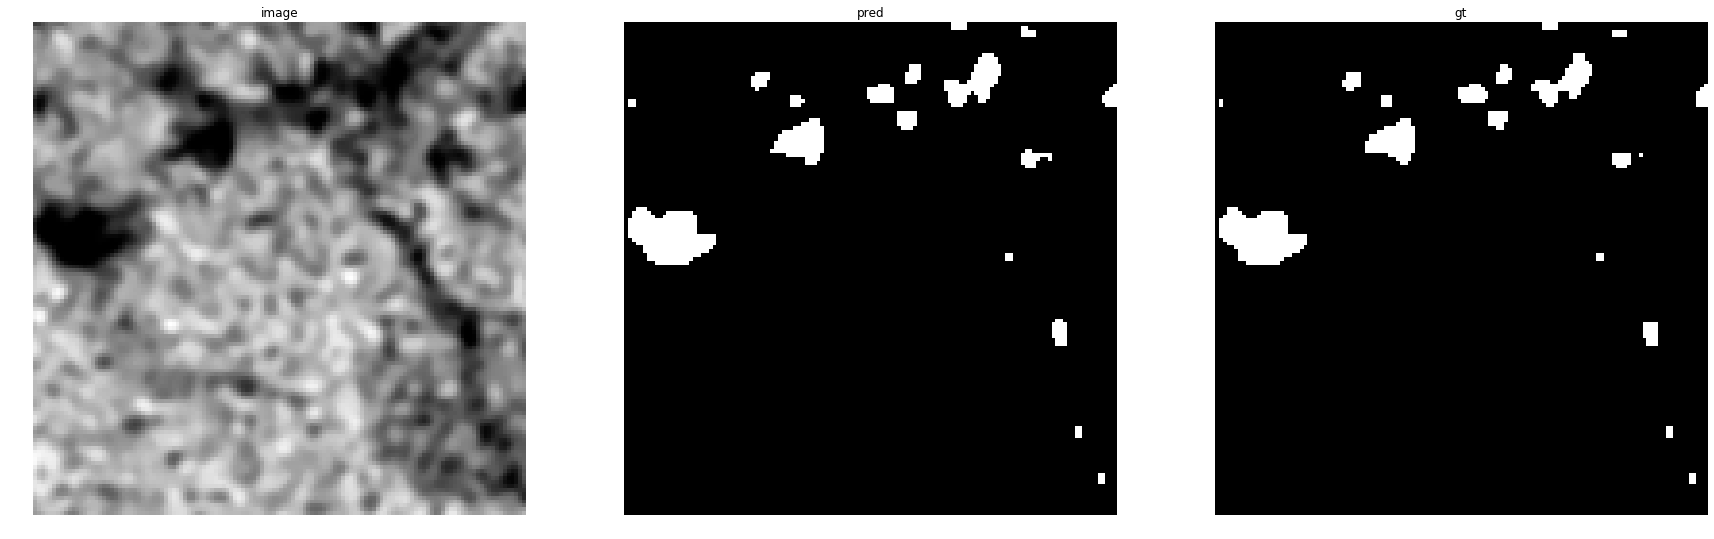

accuracy    : 0.99700927734375
precision   : 0.9371165644171779
recall      : 0.9870759289176091
f1          : 0.961447678992919
pr_auc      : 0.9962717335200665
iou         : 0.9257575757575758


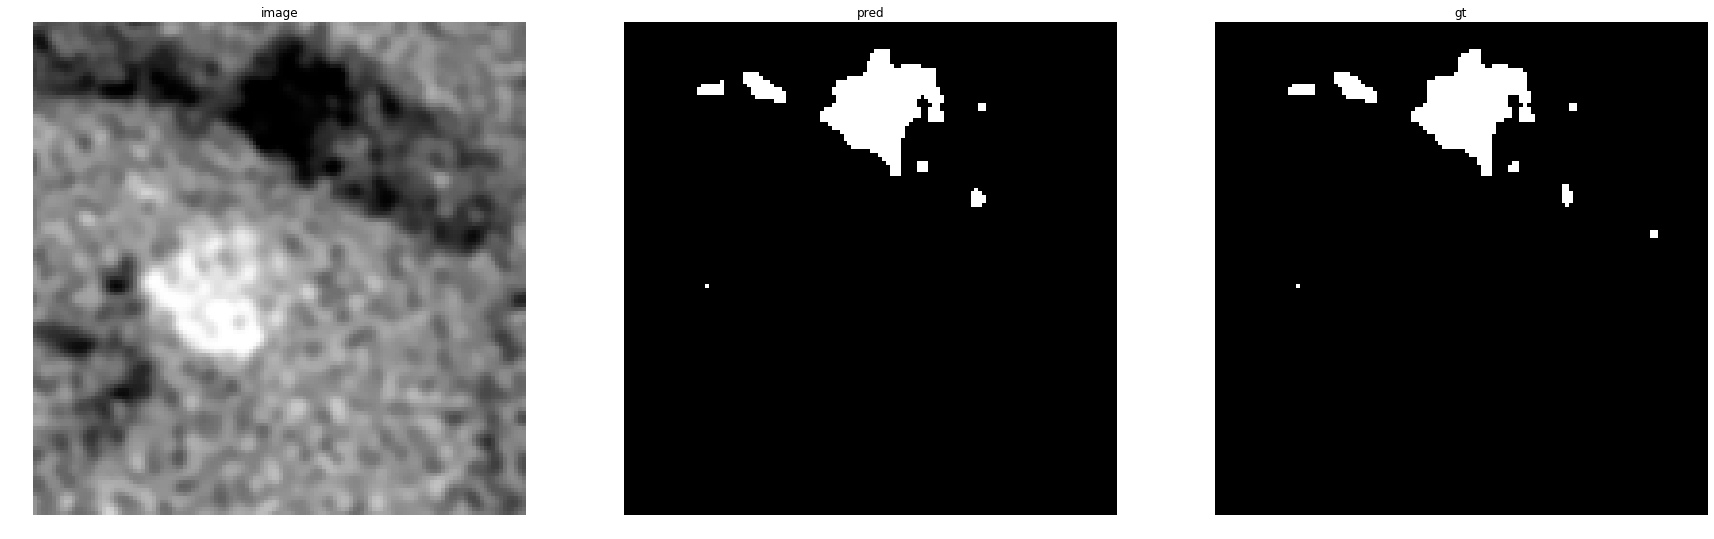

accuracy    : 0.99798583984375
precision   : 0.965625
recall      : 0.9825119236883942
f1          : 0.9739952718676124
pr_auc      : 0.9972624982062578
iou         : 0.9493087557603687


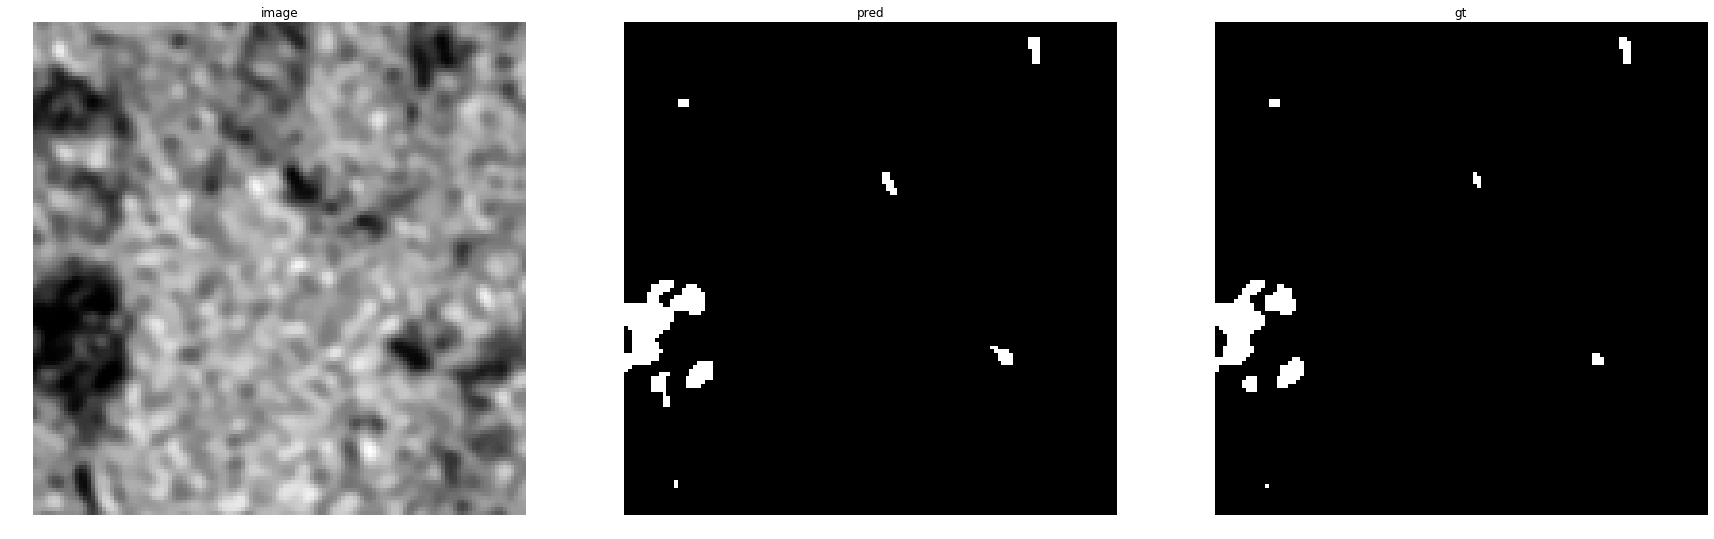

accuracy    : 0.996337890625
precision   : 0.8518518518518519
recall      : 0.9739413680781759
f1          : 0.9088145896656534
pr_auc      : 0.9862529414580695
iou         : 0.8328690807799443


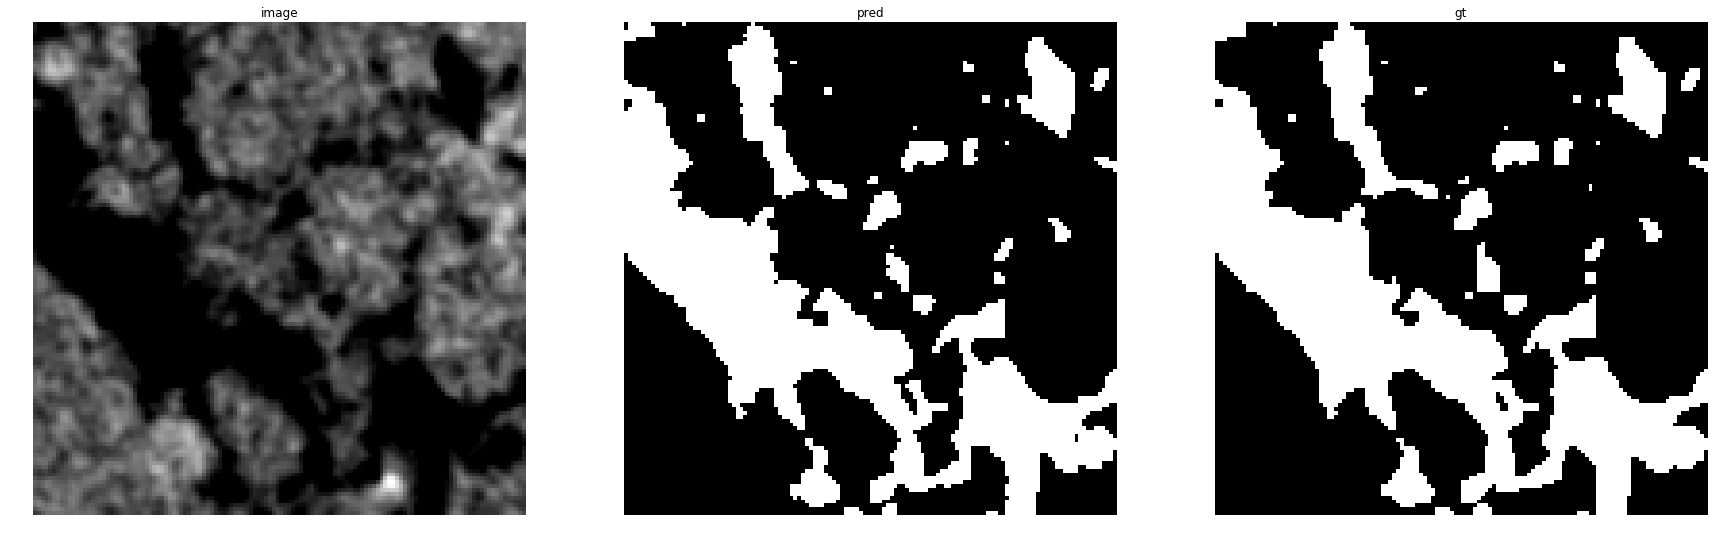

accuracy    : 0.98468017578125
precision   : 0.9963621665319321
recall      : 0.9548711989153593
f1          : 0.9751755513796856
pr_auc      : 0.9984842223822761
iou         : 0.9515537541015248


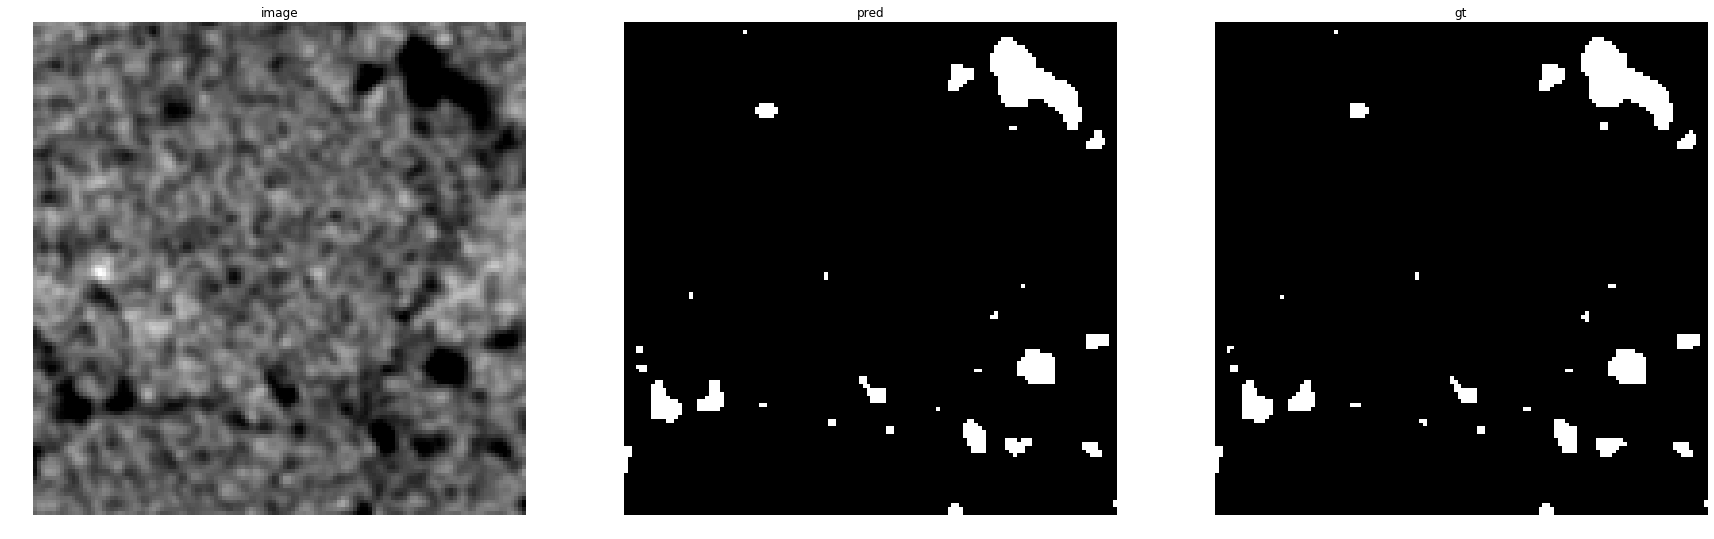

accuracy    : 0.9974365234375
precision   : 0.987012987012987
recall      : 0.9539748953974896
f1          : 0.9702127659574469
pr_auc      : 0.9958704654652699
iou         : 0.9421487603305785


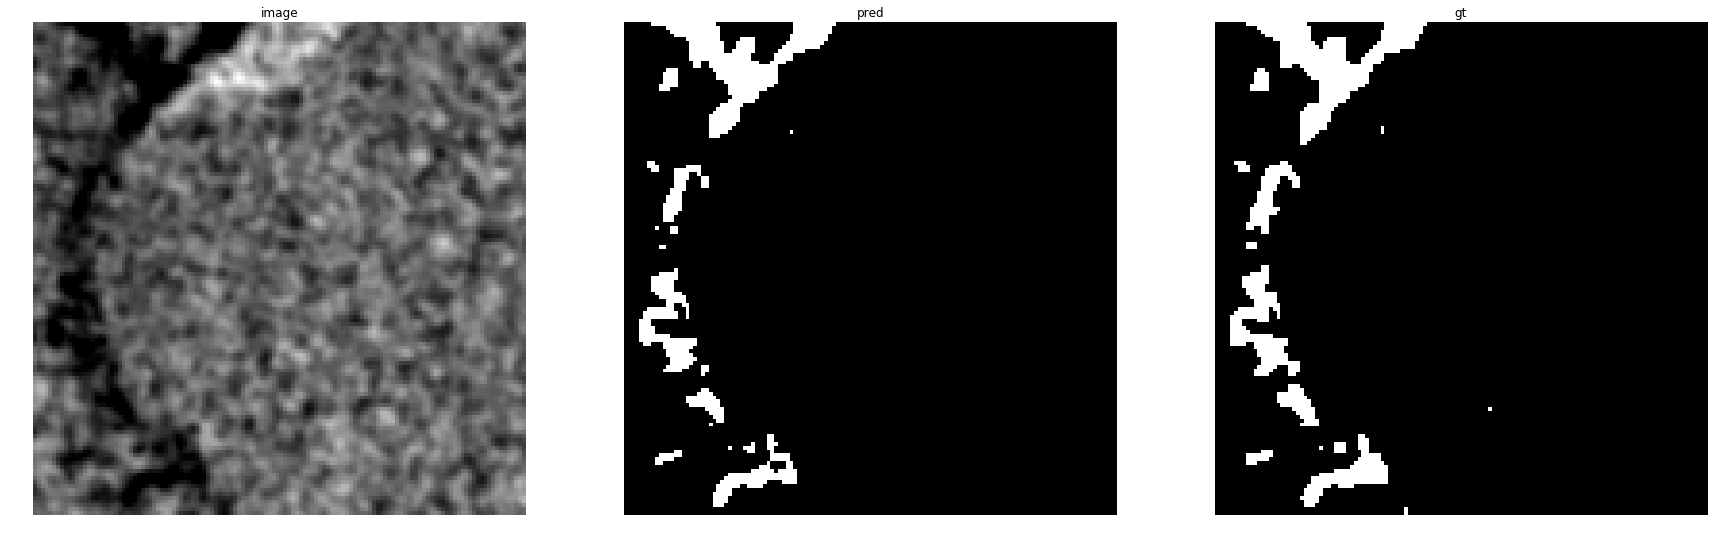

accuracy    : 0.99005126953125
precision   : 0.9933993399339934
recall      : 0.8518867924528302
f1          : 0.9172168613509396
pr_auc      : 0.9910726197366395
iou         : 0.8470919324577861


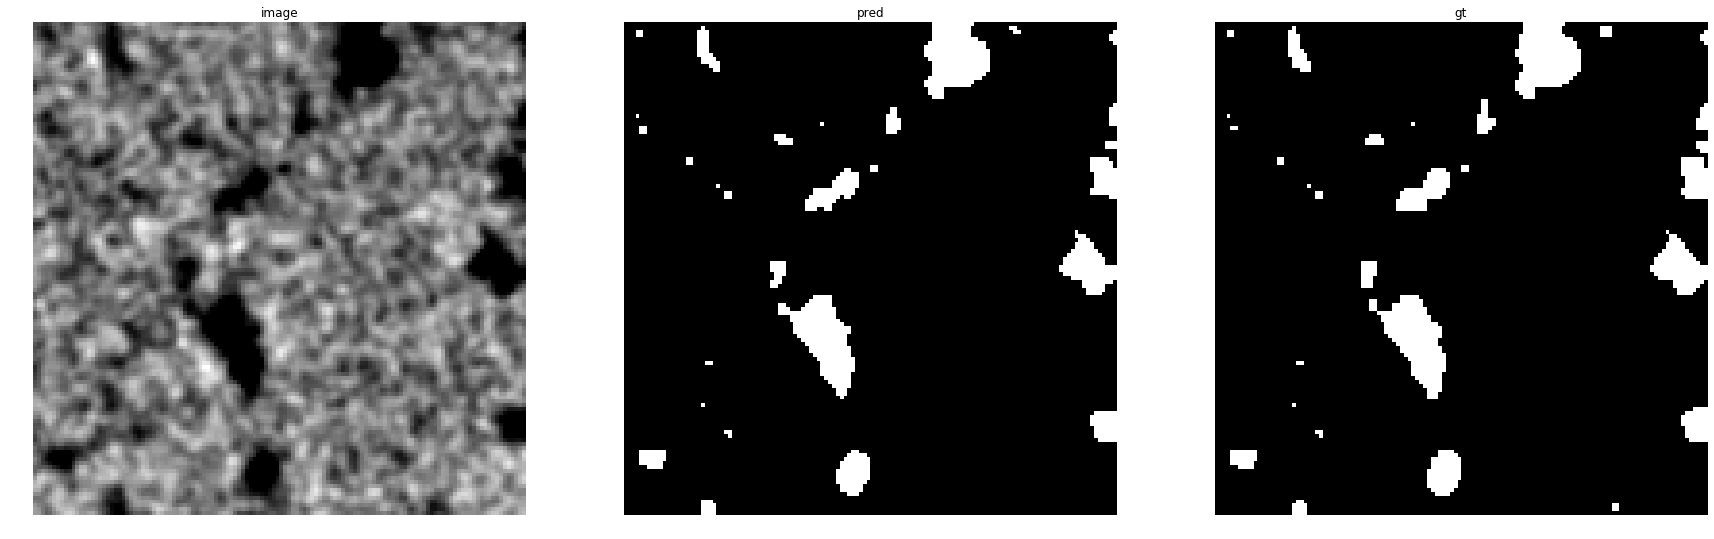

accuracy    : 0.9945068359375
precision   : 0.9899817850637522
recall      : 0.9322469982847341
f1          : 0.9602473498233215
pr_auc      : 0.9951194720869981
iou         : 0.923534409515718


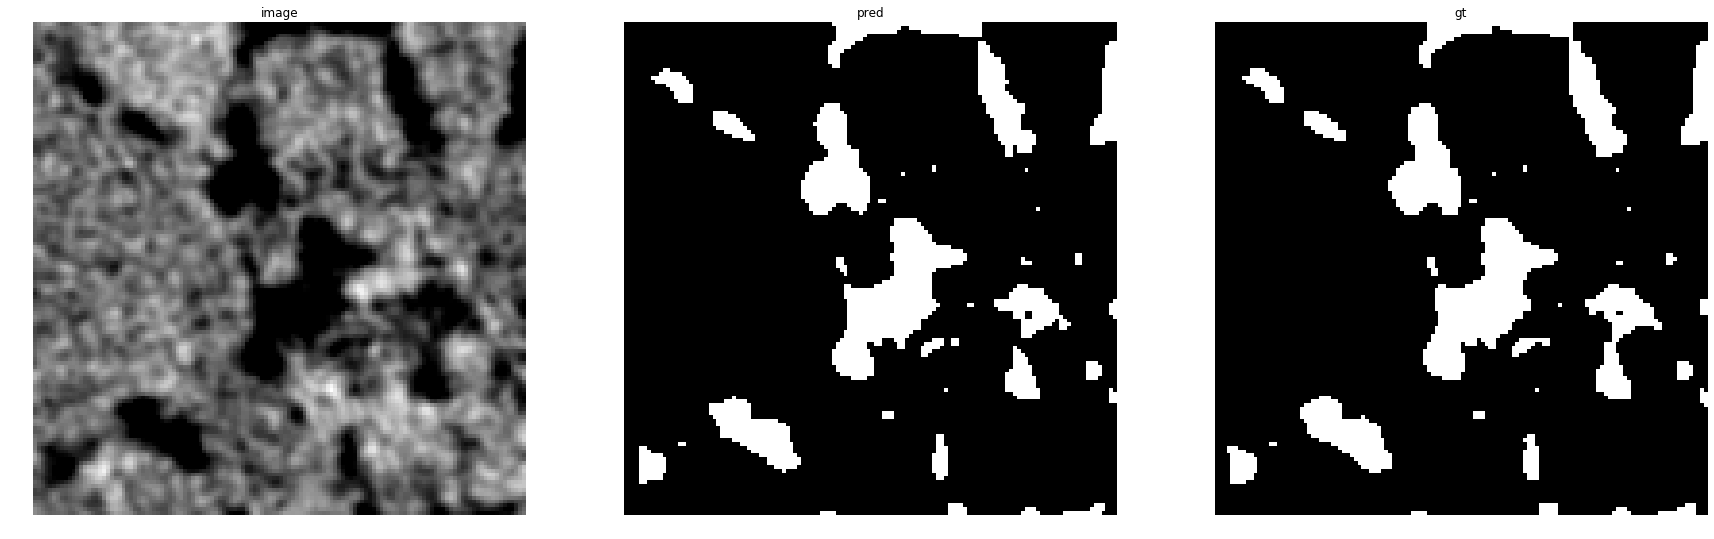

accuracy    : 0.99151611328125
precision   : 0.9917620137299771
recall      : 0.9471153846153846
f1          : 0.9689246590655041
pr_auc      : 0.9972235923369456
iou         : 0.9397224631396357


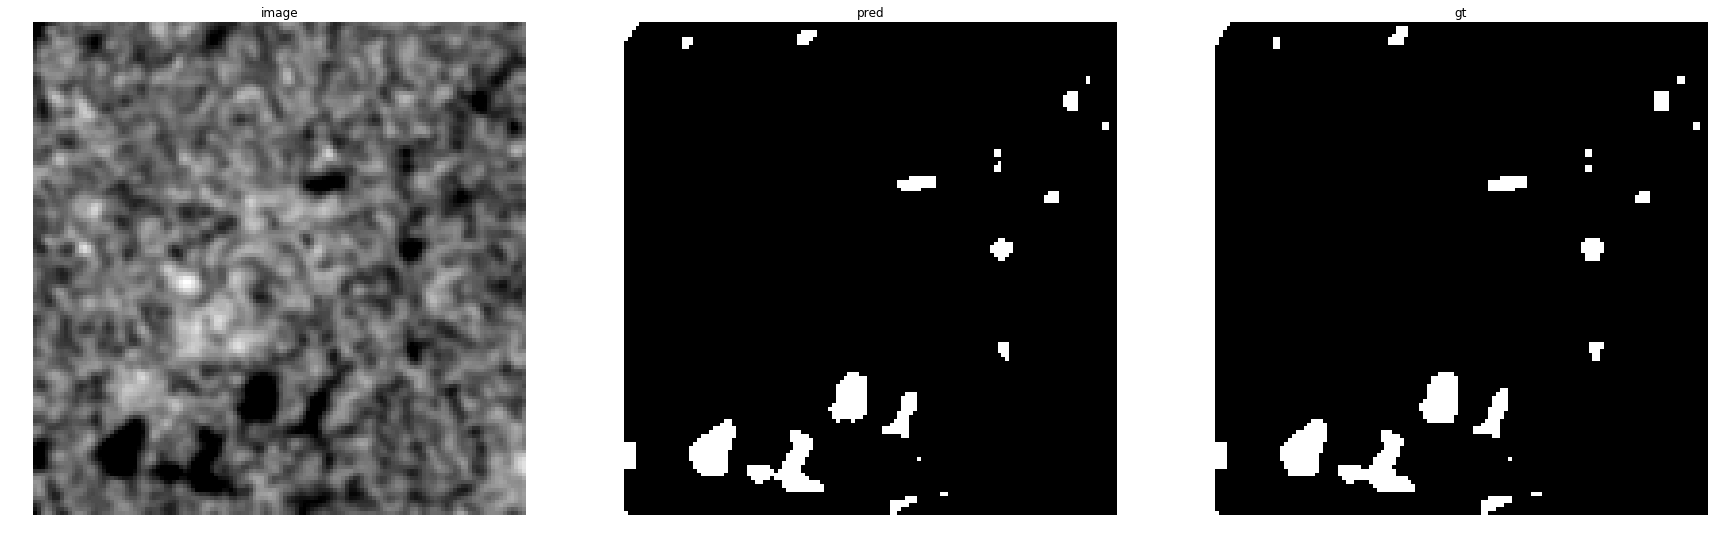

accuracy    : 0.996337890625
precision   : 0.9898305084745763
recall      : 0.9153605015673981
f1          : 0.9511400651465798
pr_auc      : 0.9935114421776924
iou         : 0.906832298136646


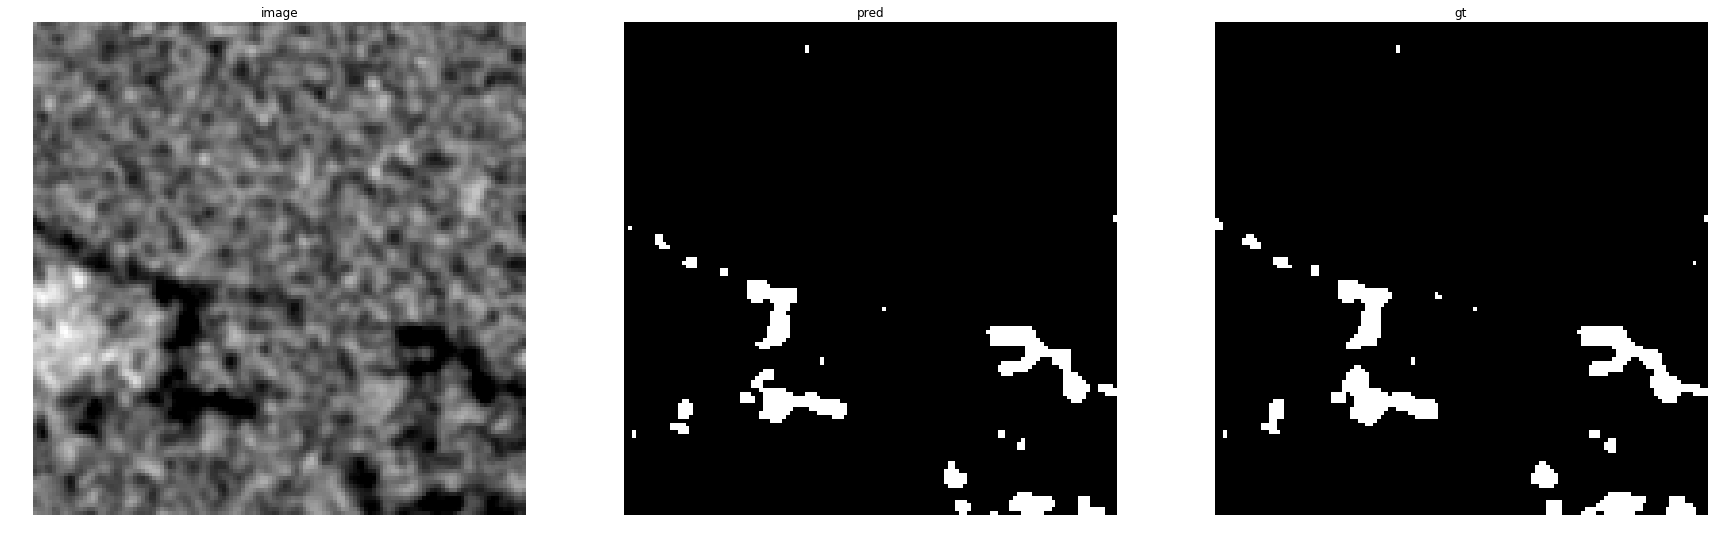

accuracy    : 0.99237060546875
precision   : 0.9939759036144579
recall      : 0.8450704225352113
f1          : 0.9134948096885812
pr_auc      : 0.992371784696146
iou         : 0.8407643312101911


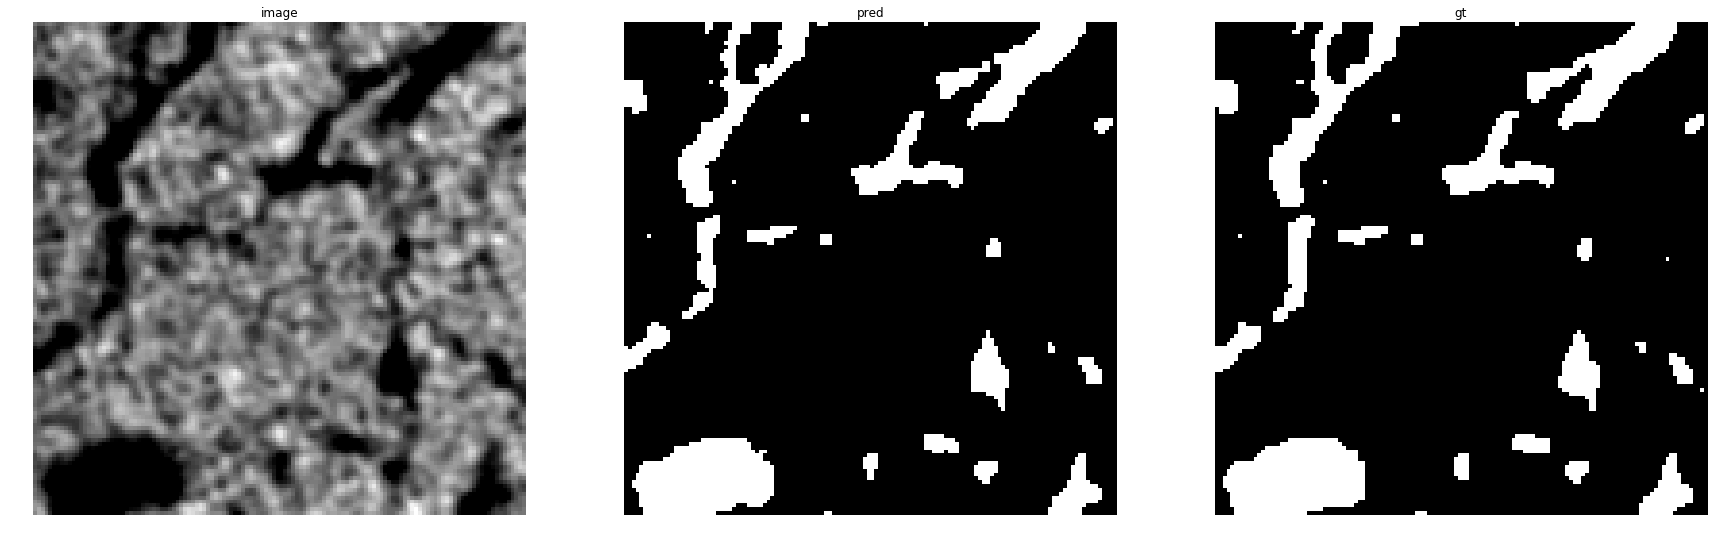

accuracy    : 0.98931884765625
precision   : 0.9969108561341571
recall      : 0.930778739184178
f1          : 0.9627104197741316
pr_auc      : 0.9978403735769864
iou         : 0.92810188989318


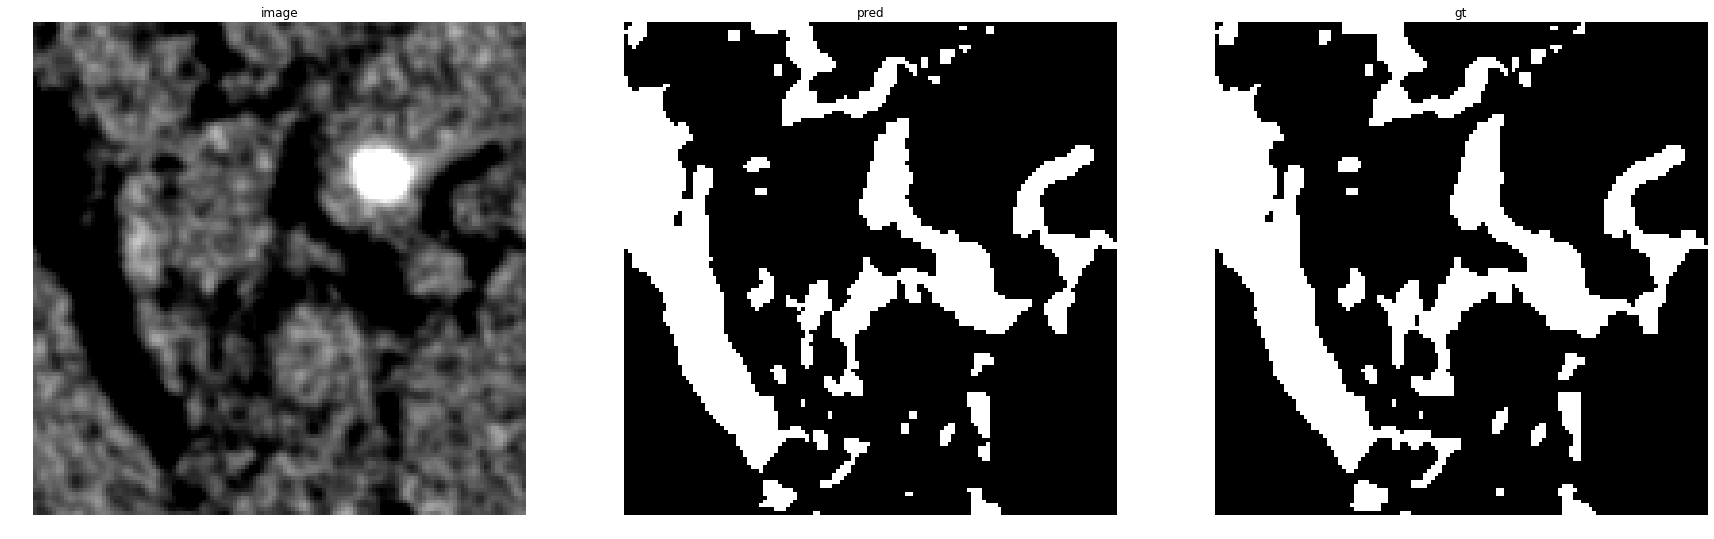

accuracy    : 0.98187255859375
precision   : 0.9928553202347538
recall      : 0.9353365384615384
f1          : 0.9632380245079836
pr_auc      : 0.9975153232334238
iou         : 0.9290830945558739


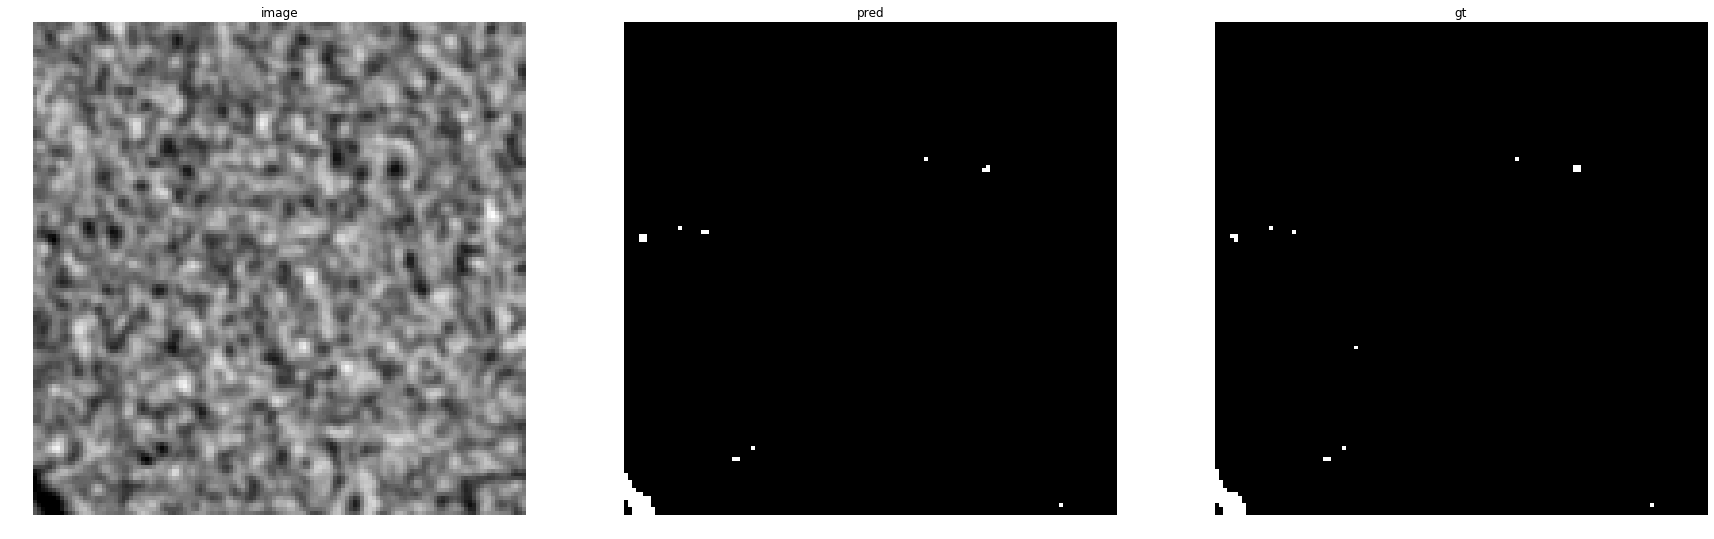

accuracy    : 0.99951171875
precision   : 0.9666666666666667
recall      : 0.90625
f1          : 0.9354838709677419
pr_auc      : 0.9818793830757899
iou         : 0.8787878787878788


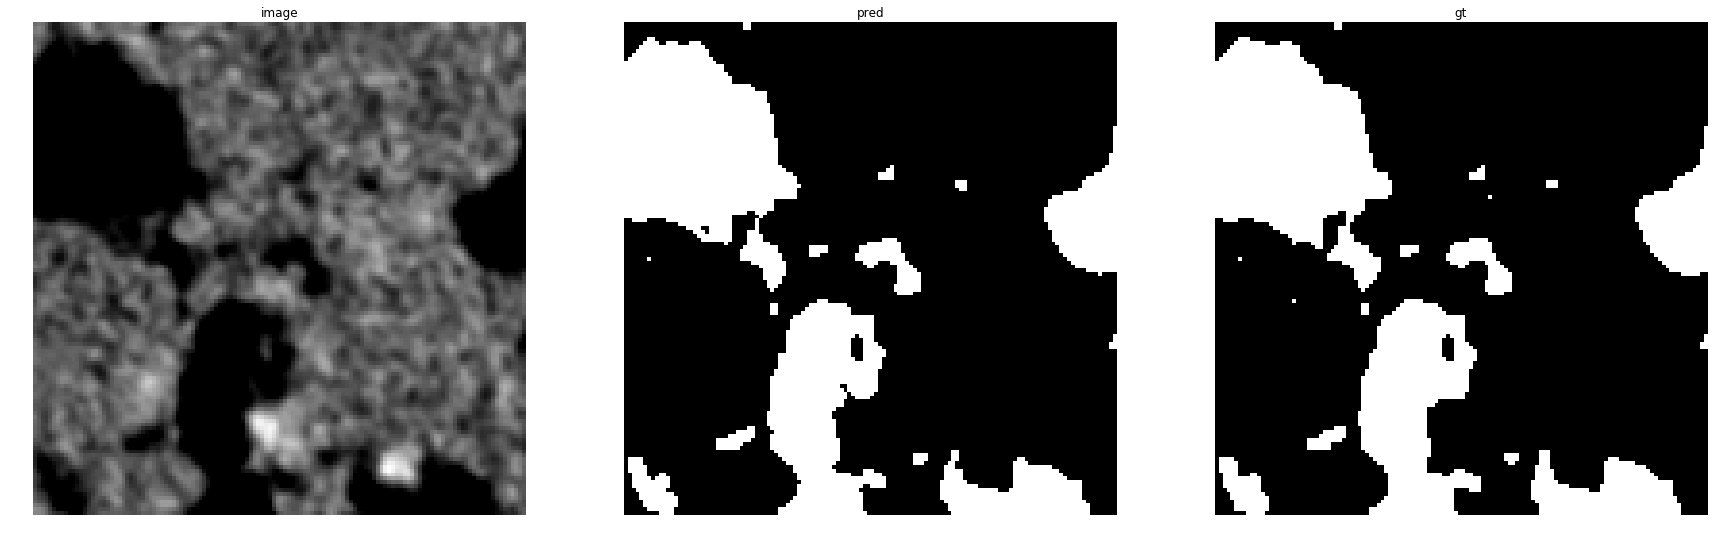

accuracy    : 0.99322509765625
precision   : 0.9982600049714143
recall      : 0.974757281553398
f1          : 0.9863686601989438
pr_auc      : 0.999656681736065
iou         : 0.9731039496001939


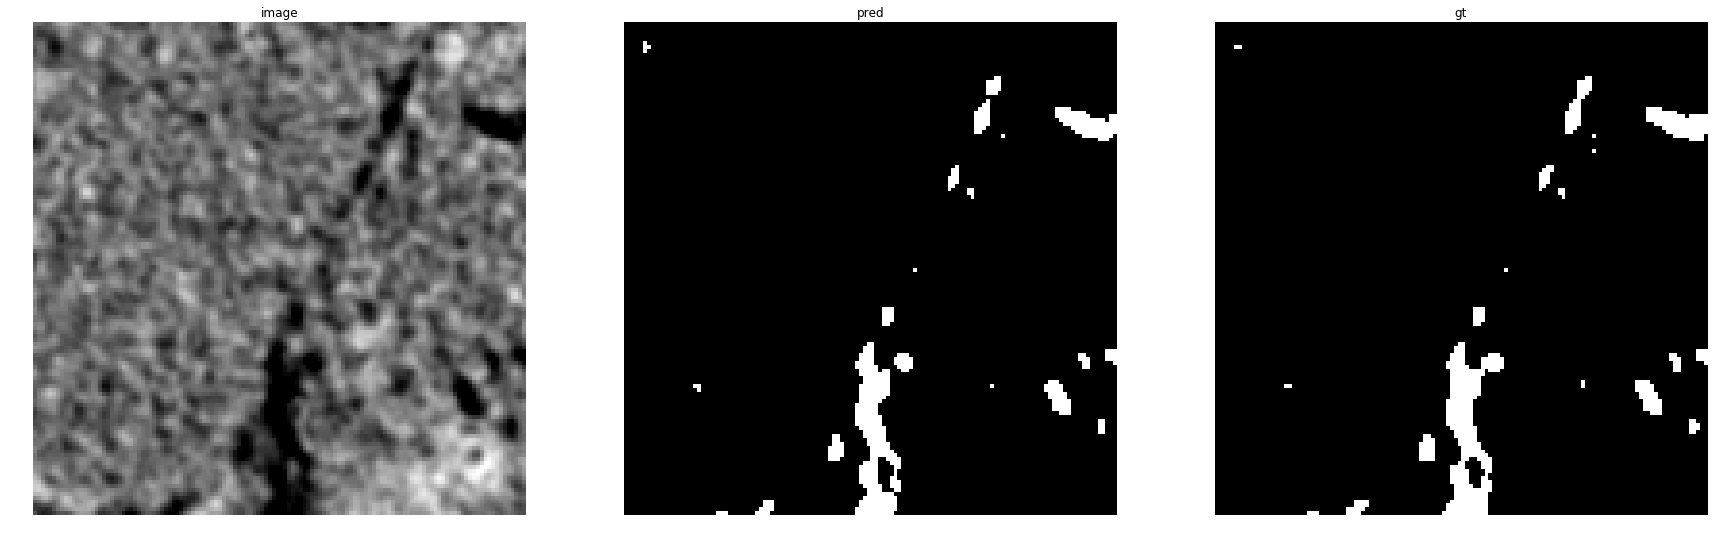

accuracy    : 0.9964599609375
precision   : 0.9899328859060402
recall      : 0.9190031152647975
f1          : 0.9531502423263327
pr_auc      : 0.993683902538961
iou         : 0.9104938271604939


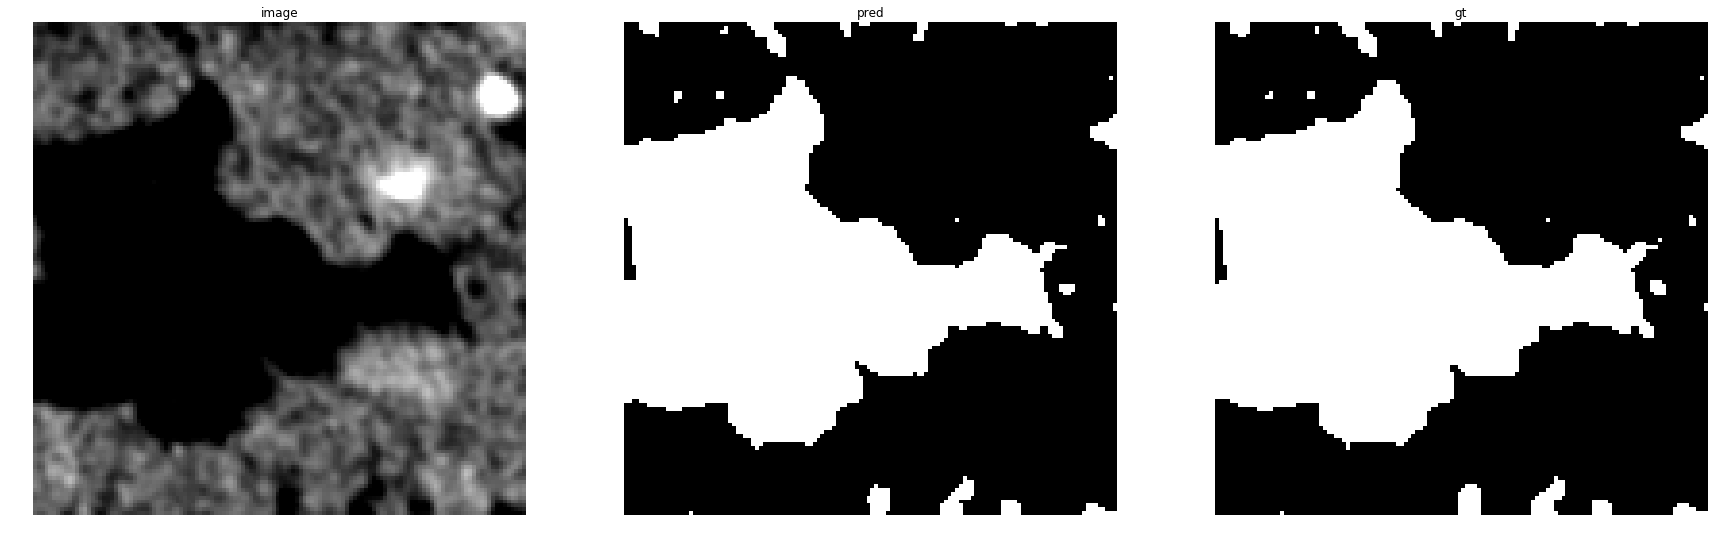

accuracy    : 0.99578857421875
precision   : 0.9956917978458989
recall      : 0.9928949107732981
f1          : 0.9942913874410524
pr_auc      : 0.9998282033318966
iou         : 0.9886475814412635


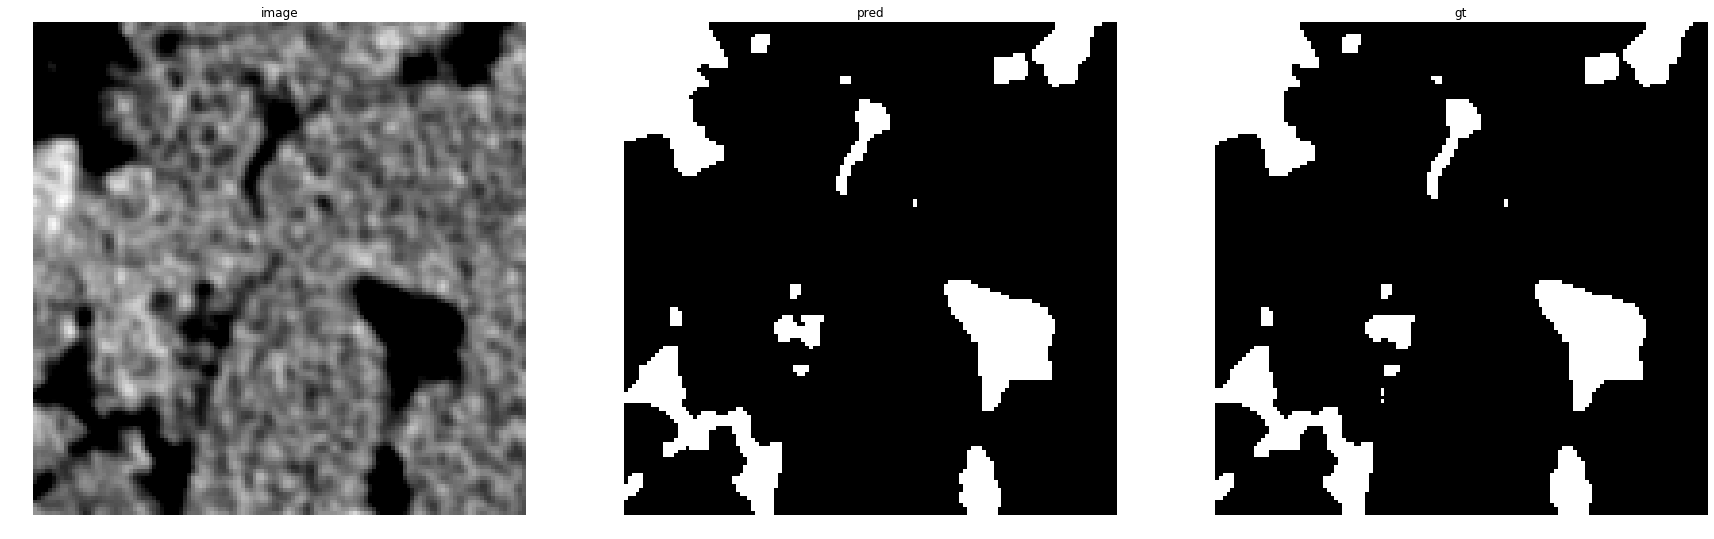

accuracy    : 0.9949951171875
precision   : 0.9963562753036437
recall      : 0.9711917916337806
f1          : 0.98361310951239
pr_auc      : 0.9991872305488879
iou         : 0.9677546205269367


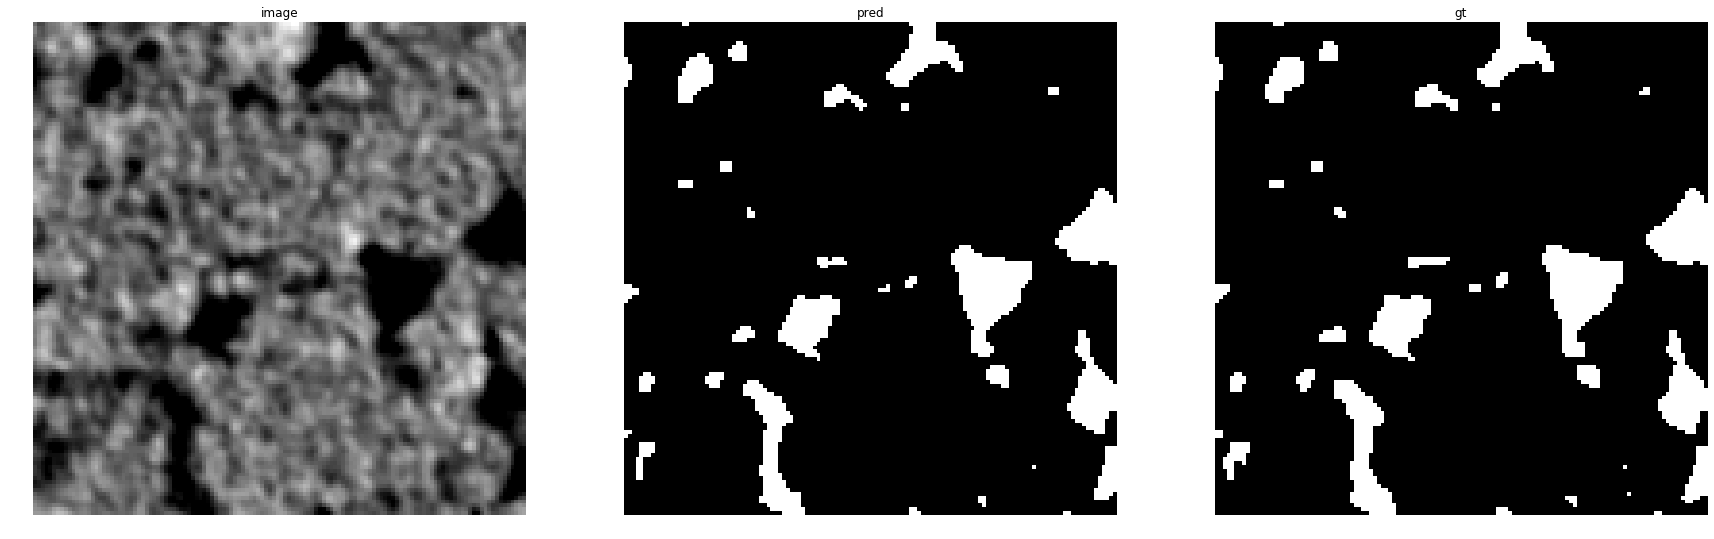

accuracy    : 0.9912109375
precision   : 0.9951749095295537
recall      : 0.9238521836506159
f1          : 0.9581881533101045
pr_auc      : 0.9963844000109833
iou         : 0.919732441471572


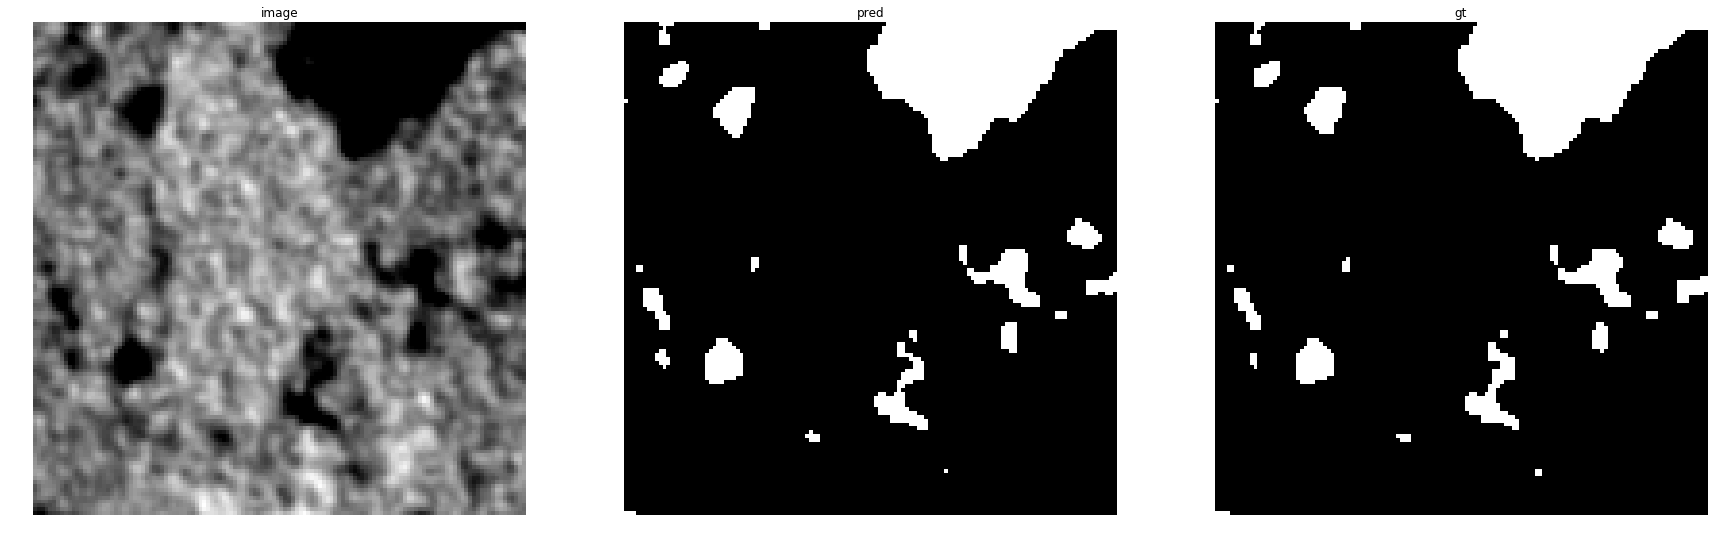

accuracy    : 0.99456787109375
precision   : 0.9842559674961909
recall      : 0.9709418837675351
f1          : 0.9775535939470366
pr_auc      : 0.9984084538819759
iou         : 0.9560927479033053


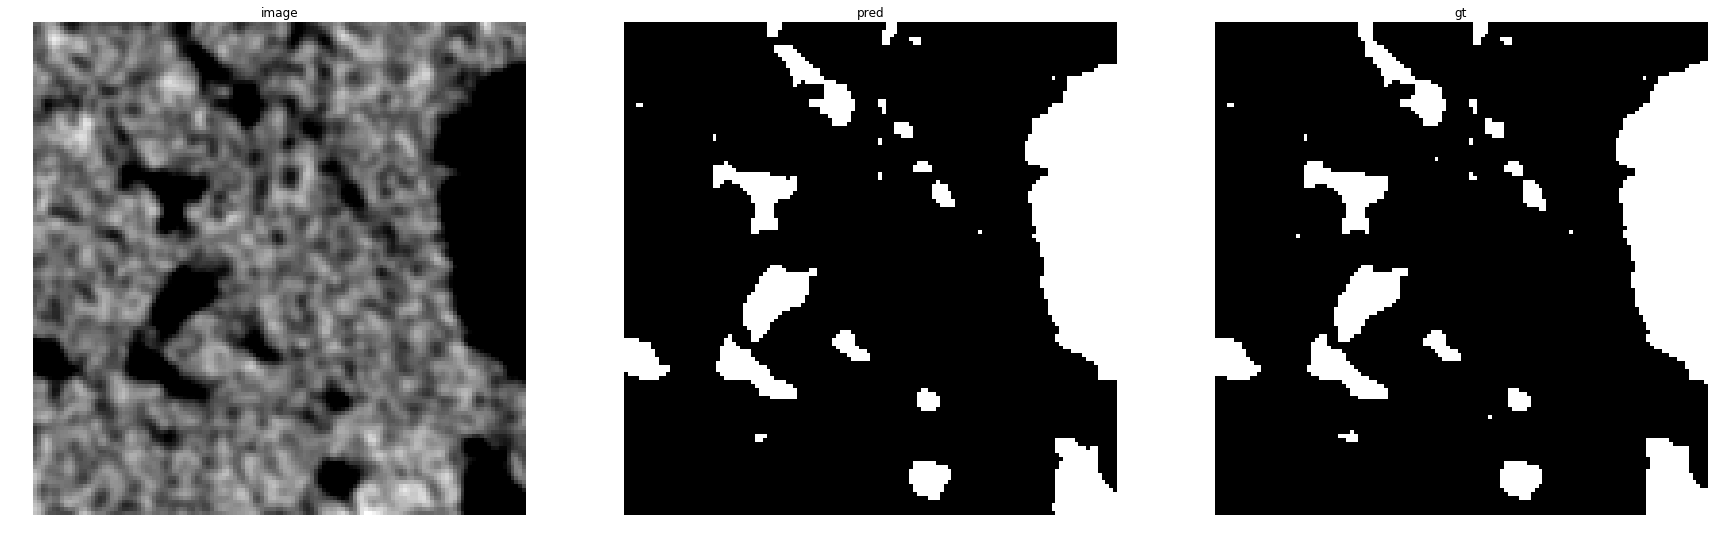

accuracy    : 0.99261474609375
precision   : 0.9956011730205279
recall      : 0.9614159292035398
f1          : 0.978209976589231
pr_auc      : 0.999154280886185
iou         : 0.9573493126542122


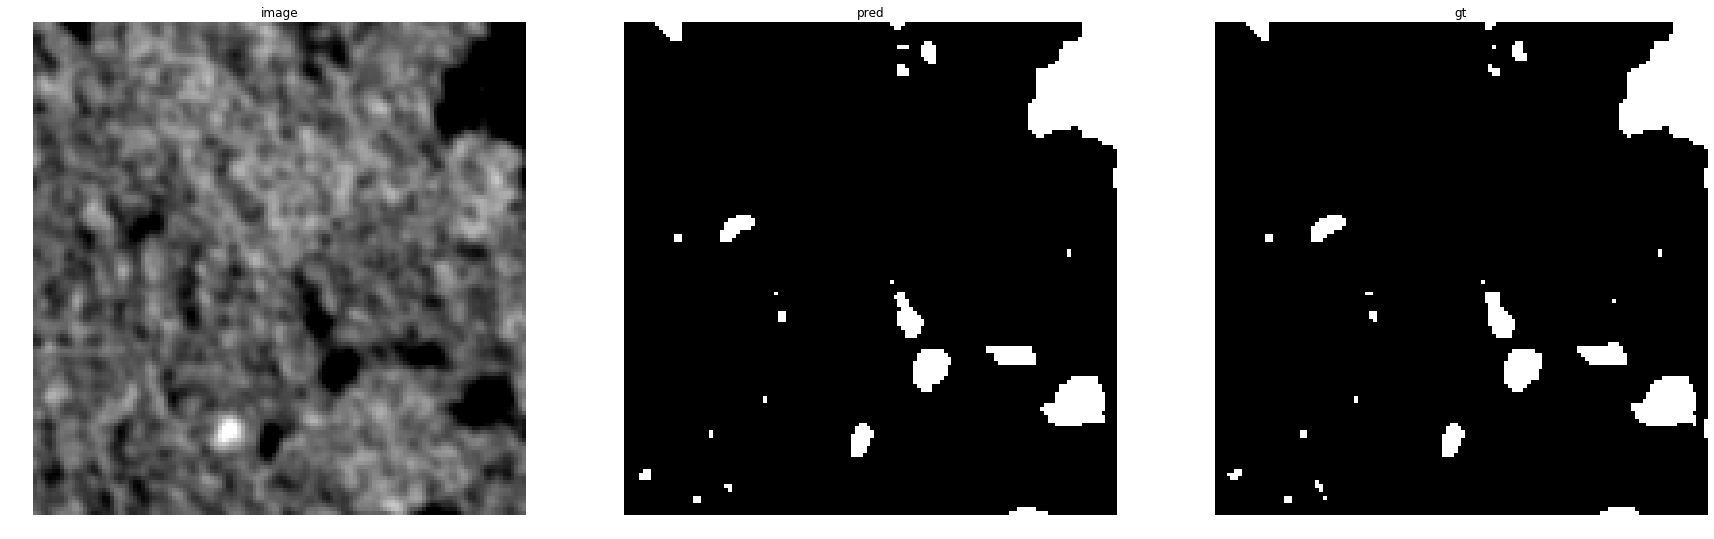

accuracy    : 0.9964599609375
precision   : 0.9832869080779945
recall      : 0.9636032757051866
f1          : 0.9733455882352942
pr_auc      : 0.9975513439743682
iou         : 0.9480752014324082


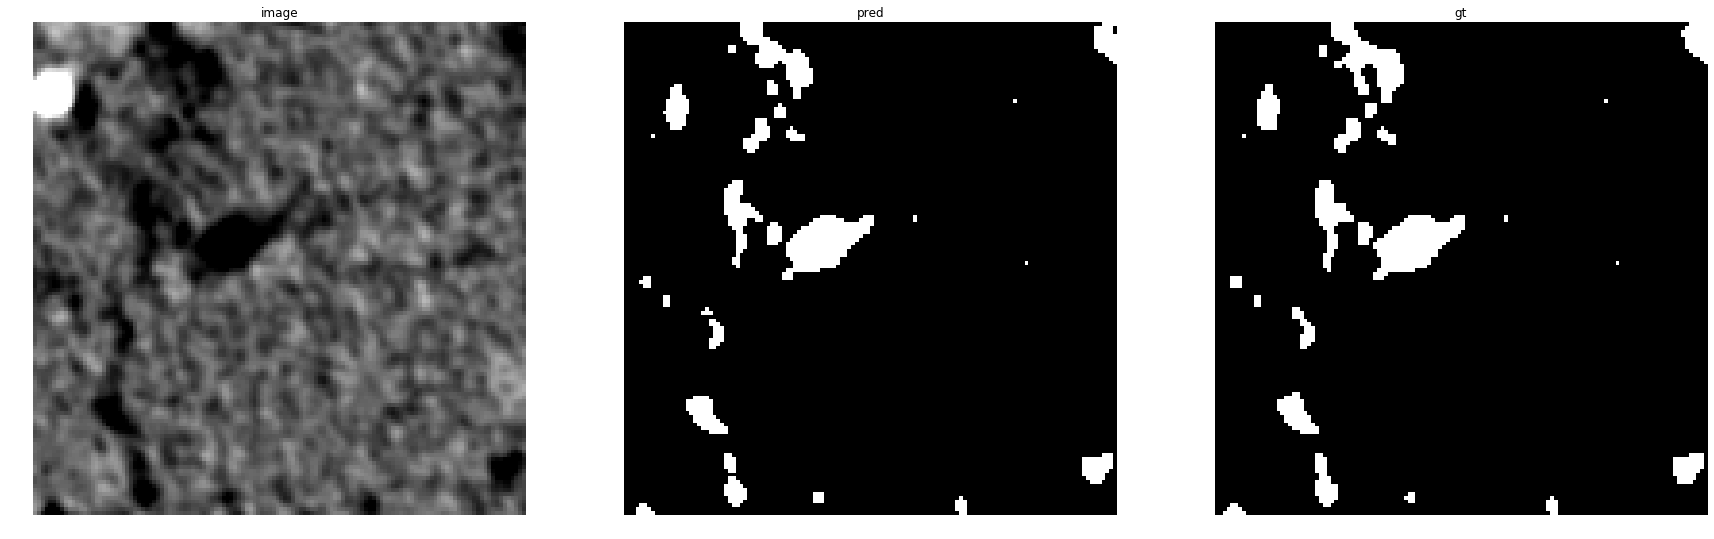

accuracy    : 0.99365234375
precision   : 0.9899441340782122
recall      : 0.9031600407747197
f1          : 0.9445628997867804
pr_auc      : 0.9948657144021092
iou         : 0.8949494949494949


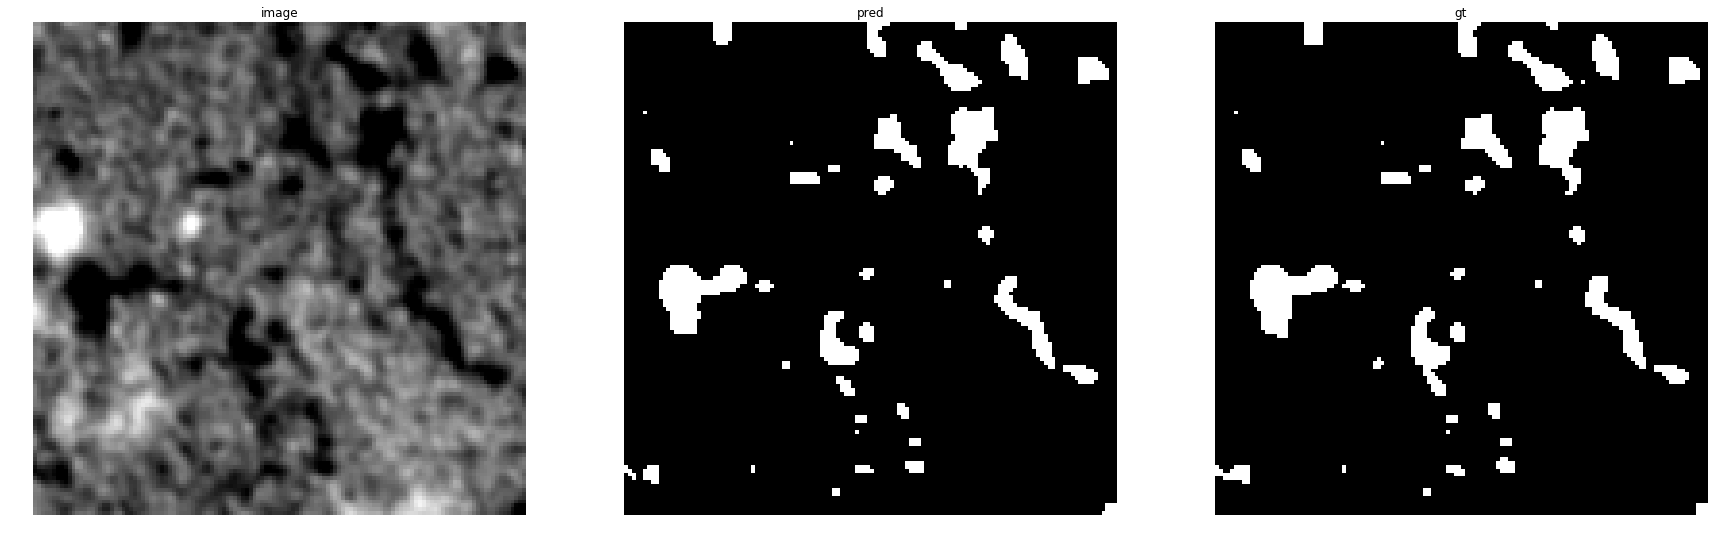

accuracy    : 0.99383544921875
precision   : 0.9940627650551315
recall      : 0.9257503949447078
f1          : 0.9586912065439673
pr_auc      : 0.9947948621258669
iou         : 0.9206598586017282


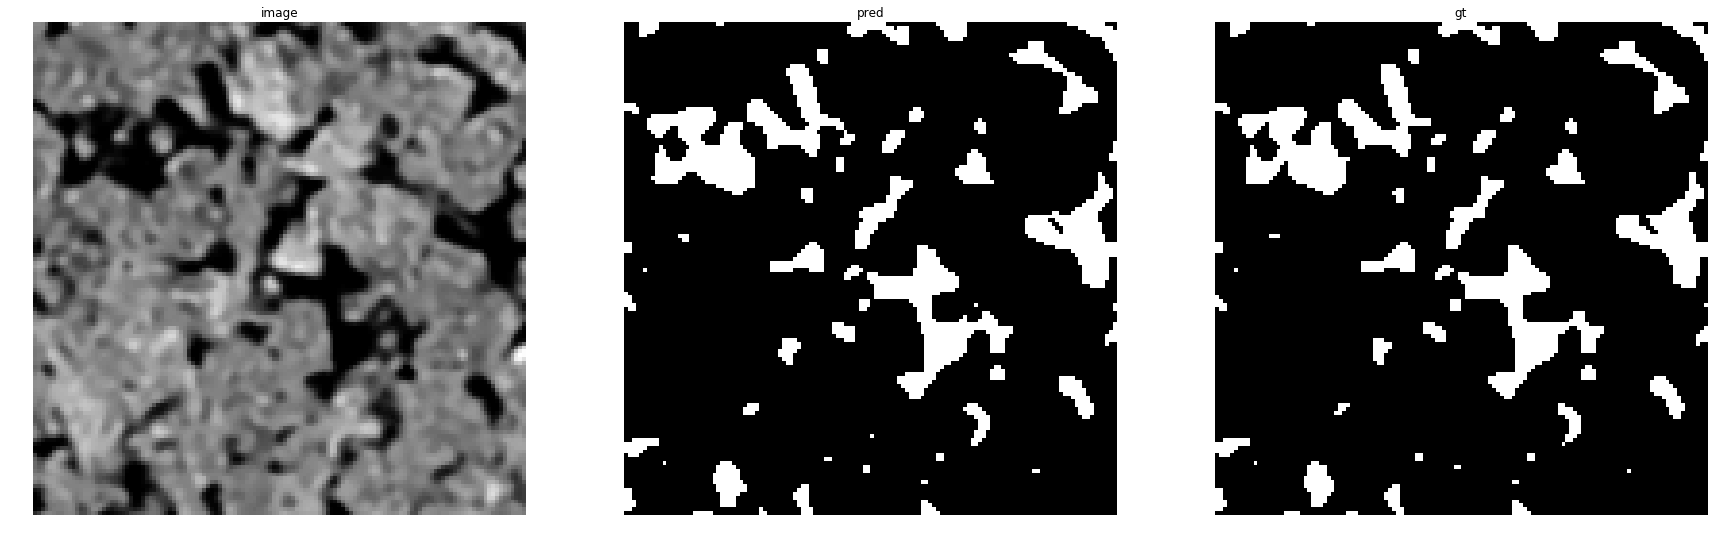

accuracy    : 0.992919921875
precision   : 0.9560912613000431
recall      : 0.9937360178970918
f1          : 0.9745502413339184
pr_auc      : 0.9982616908188056
iou         : 0.9503637141634574


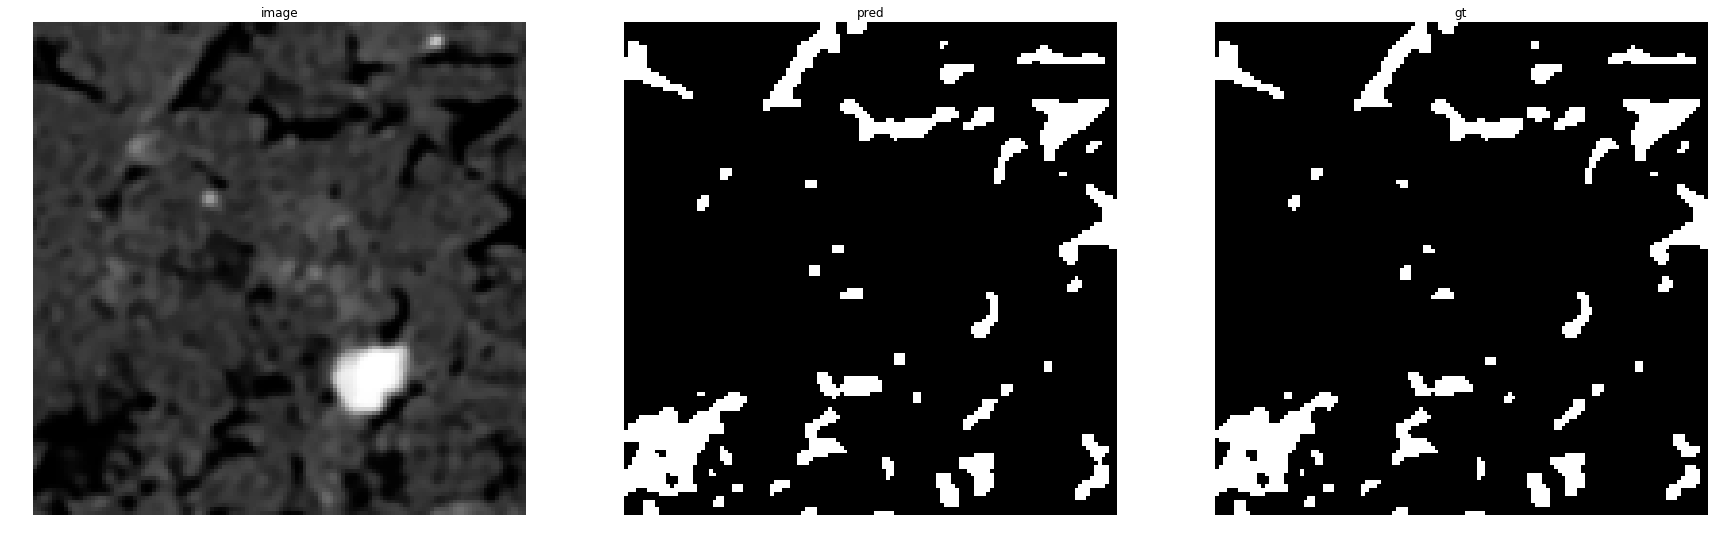

accuracy    : 0.9937744140625
precision   : 0.9533875338753387
recall      : 0.9909859154929578
f1          : 0.9718232044198895
pr_auc      : 0.9980895731090978
iou         : 0.9451907576571735


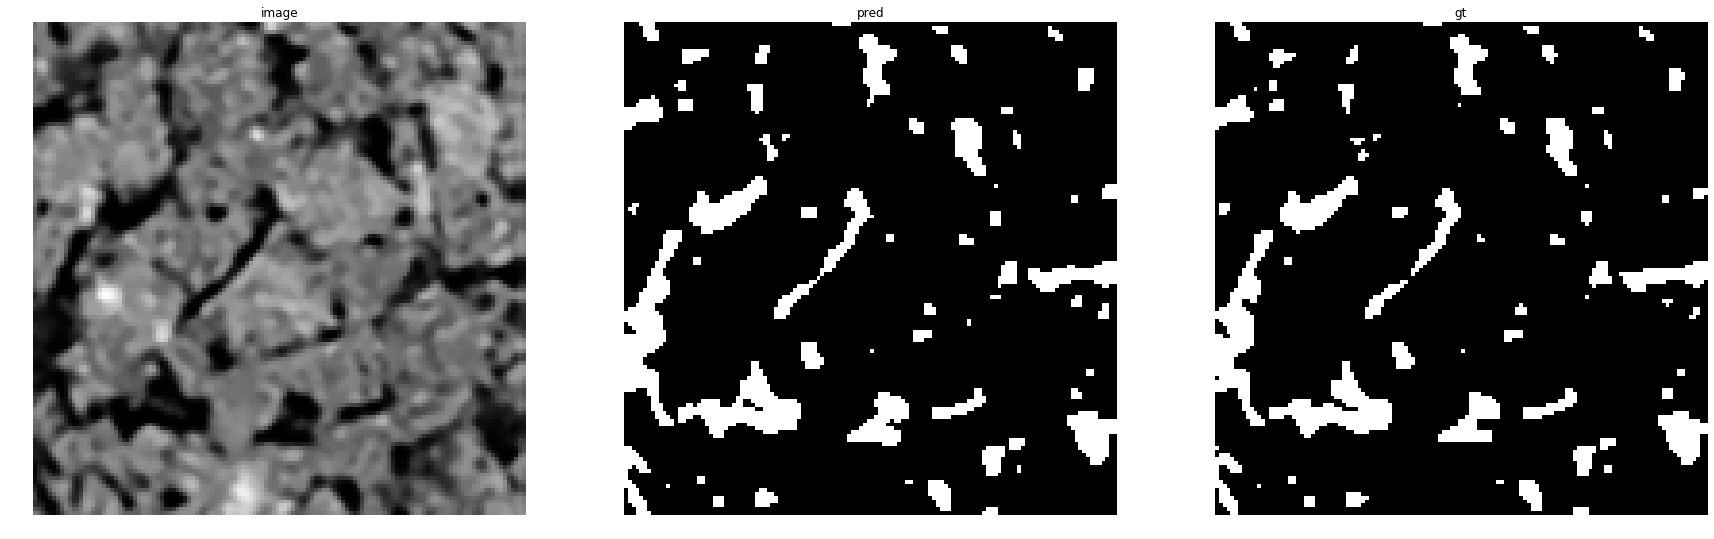

accuracy    : 0.98870849609375
precision   : 0.9209370424597365
recall      : 0.987958115183246
f1          : 0.9532710280373833
pr_auc      : 0.995182906374324
iou         : 0.9107142857142857


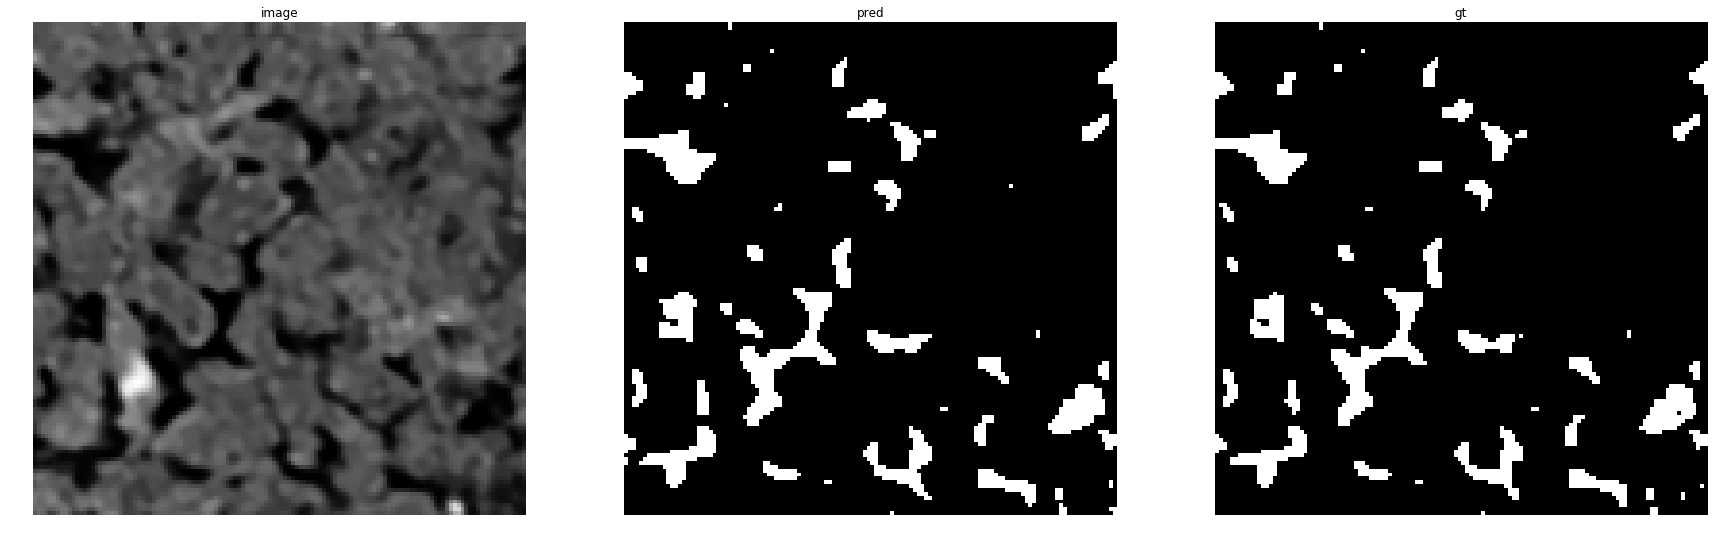

accuracy    : 0.99261474609375
precision   : 0.9380982769623485
recall      : 0.9839357429718876
f1          : 0.96047043449853
pr_auc      : 0.9956272002191511
iou         : 0.9239472030169704


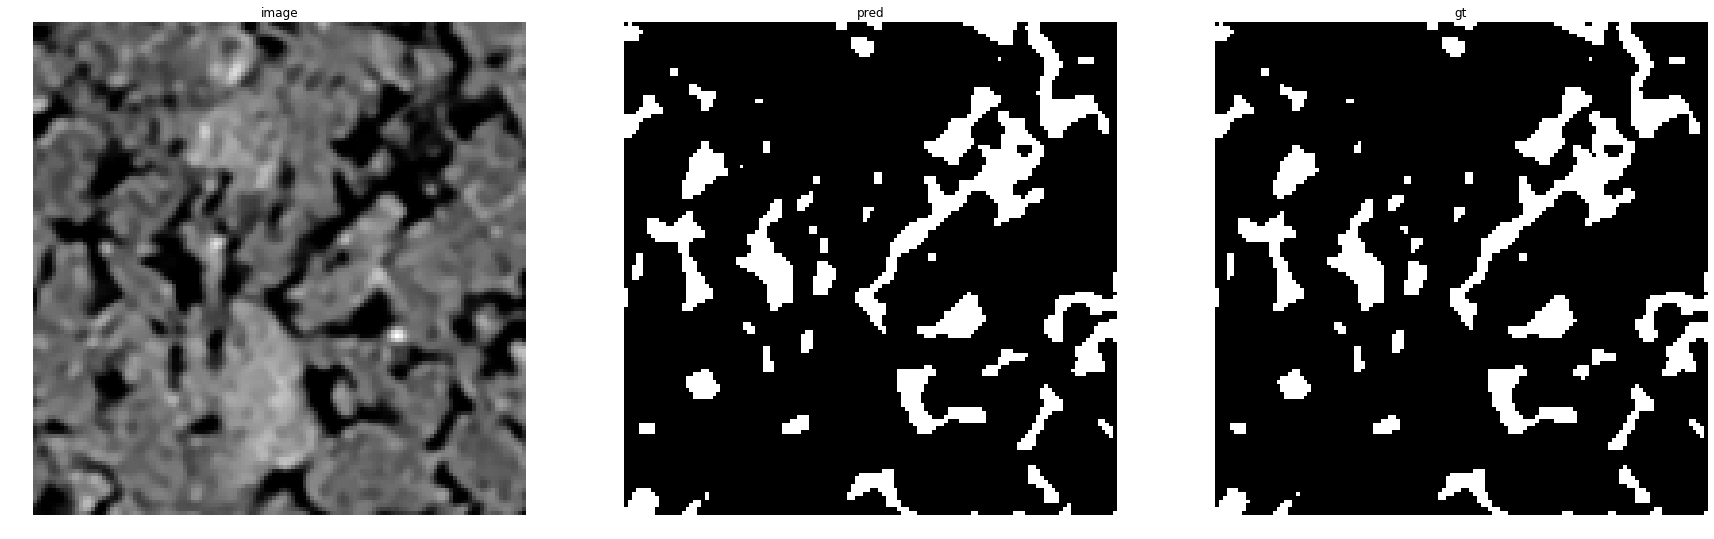

accuracy    : 0.992919921875
precision   : 0.9603720177921553
recall      : 0.9924780610112829
f1          : 0.9761611179613646
pr_auc      : 0.9979029606771362
iou         : 0.95343235648334


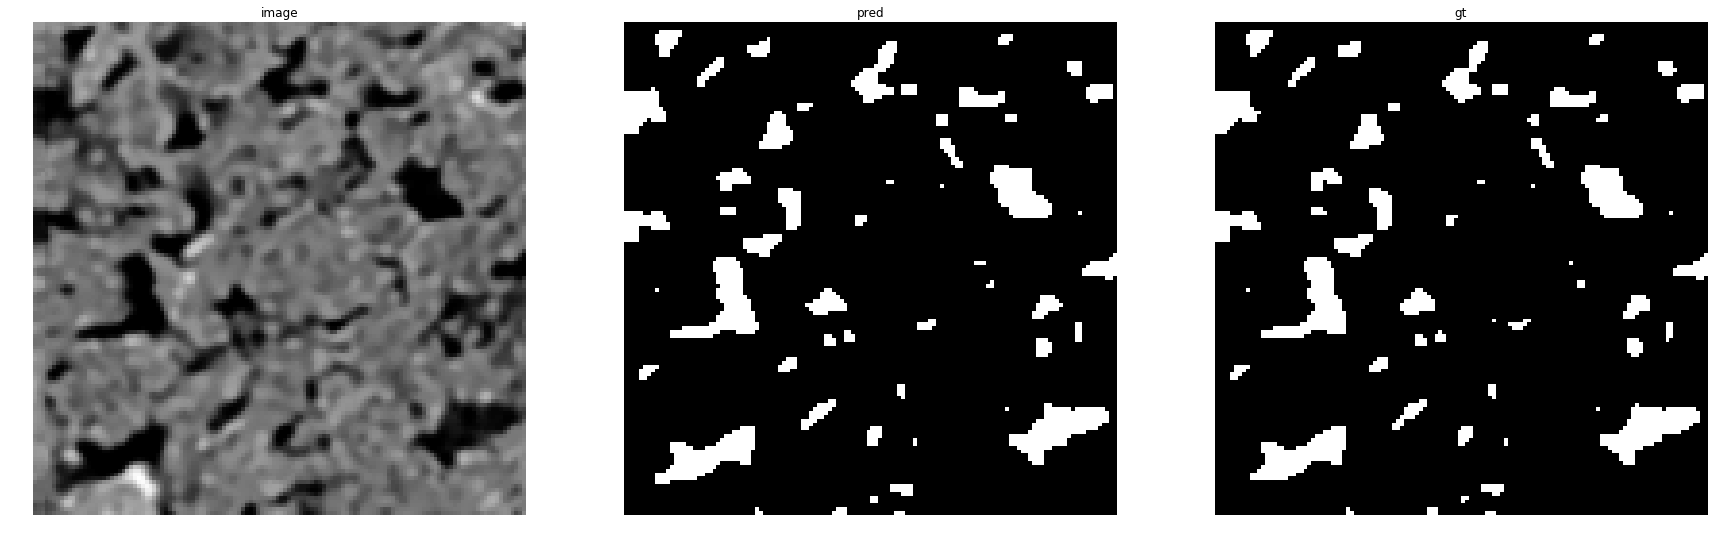

accuracy    : 0.9952392578125
precision   : 0.9607843137254902
recall      : 0.992633517495396
f1          : 0.9764492753623188
pr_auc      : 0.9985035249055983
iou         : 0.9539823008849557


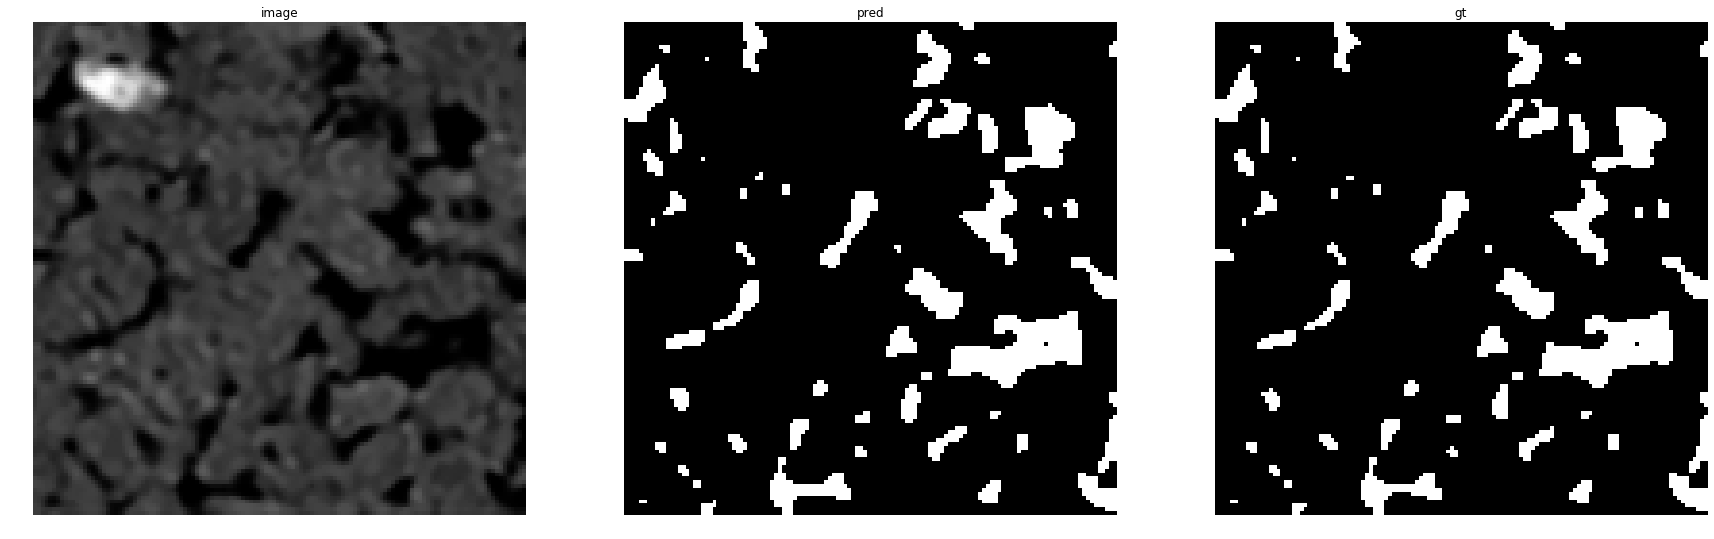

accuracy    : 0.99298095703125
precision   : 0.9517669531996179
recall      : 0.9930244145490782
f1          : 0.9719580590099975
pr_auc      : 0.9979628239331529
iou         : 0.9454459203036053


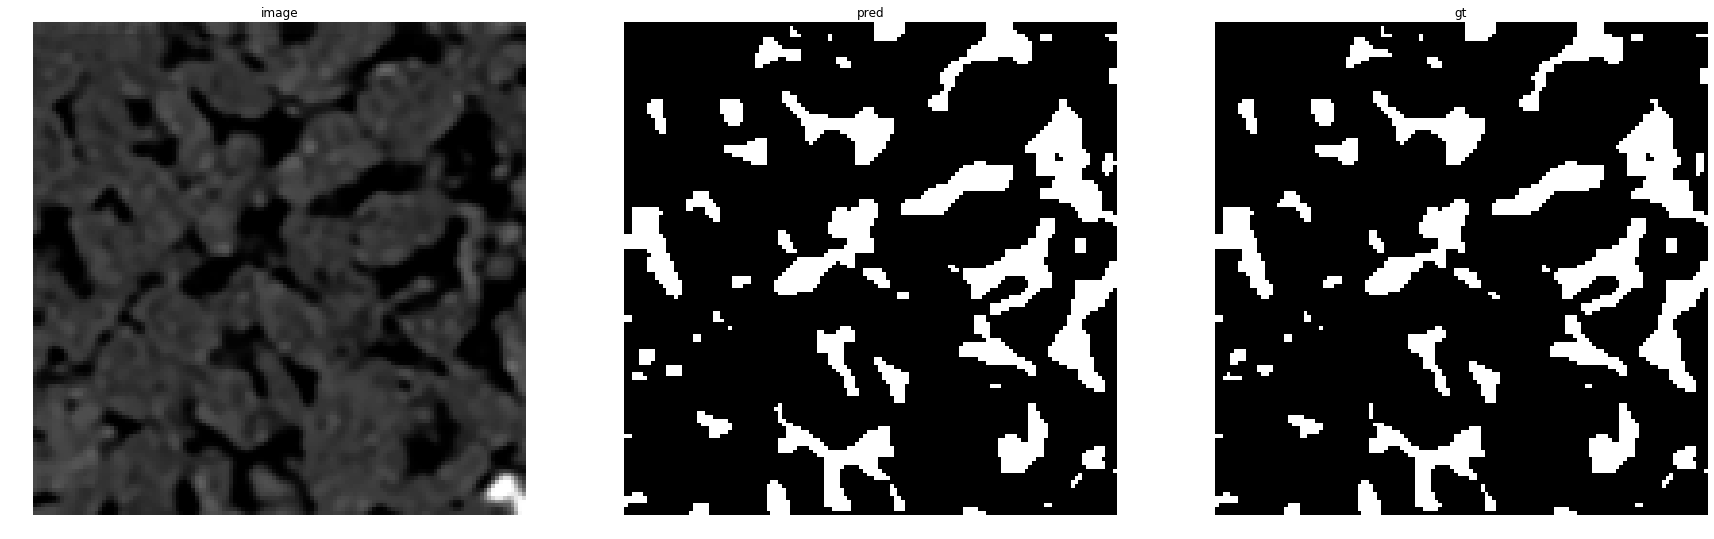

accuracy    : 0.99066162109375
precision   : 0.9523652001323188
recall      : 0.9968836565096952
f1          : 0.9741160548130604
pr_auc      : 0.9981264364156316
iou         : 0.9495382585751979


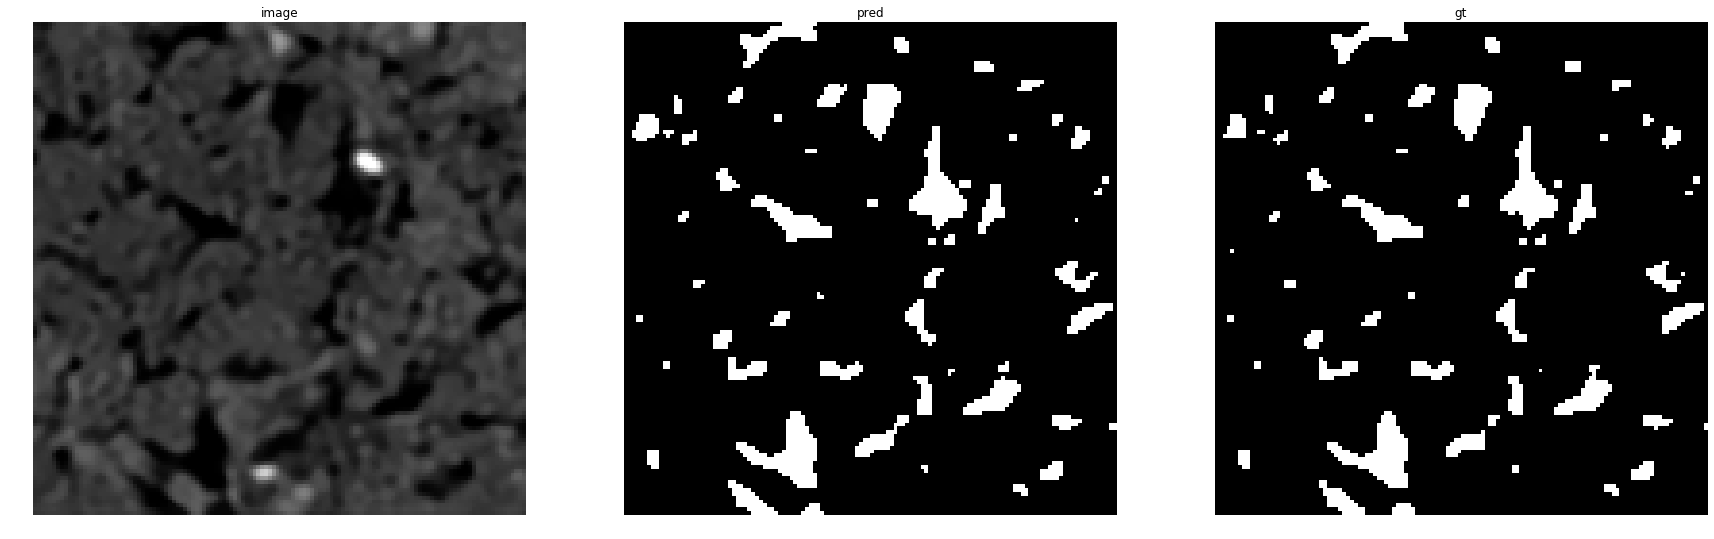

accuracy    : 0.993408203125
precision   : 0.9424083769633508
recall      : 0.9863013698630136
f1          : 0.963855421686747
pr_auc      : 0.997297270038749
iou         : 0.9302325581395349


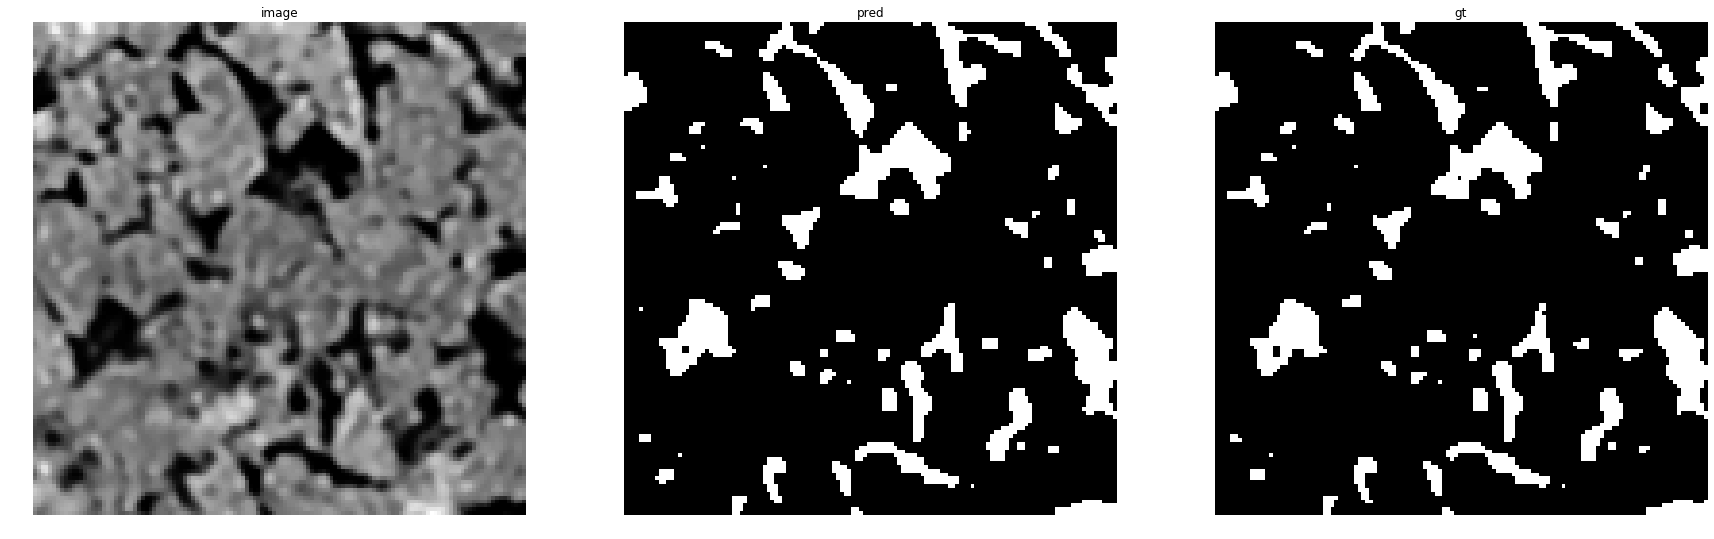

accuracy    : 0.9915771484375
precision   : 0.947754749568221
recall      : 0.9923146473779385
f1          : 0.9695229681978799
pr_auc      : 0.9973432133916933
iou         : 0.9408486926703815


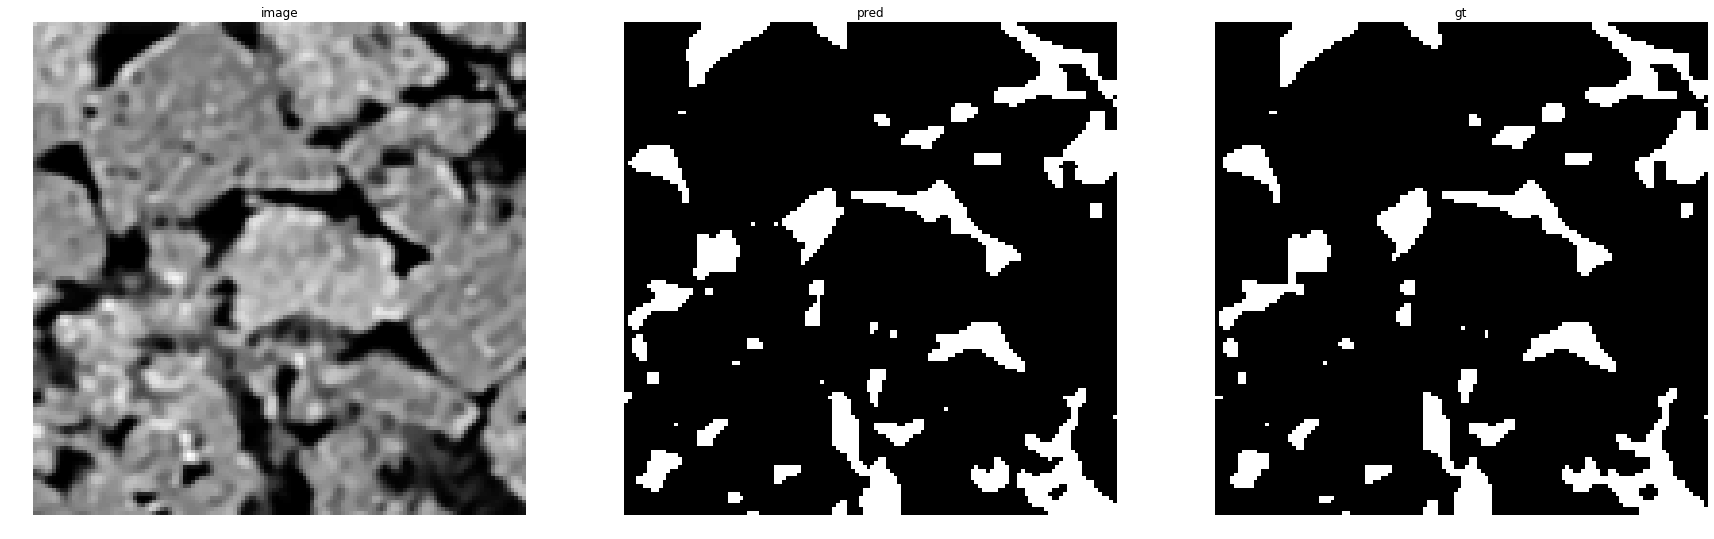

accuracy    : 0.98828125
precision   : 0.948170731707317
recall      : 0.9779874213836478
f1          : 0.9628482972136222
pr_auc      : 0.996856676898086
iou         : 0.9283582089552239


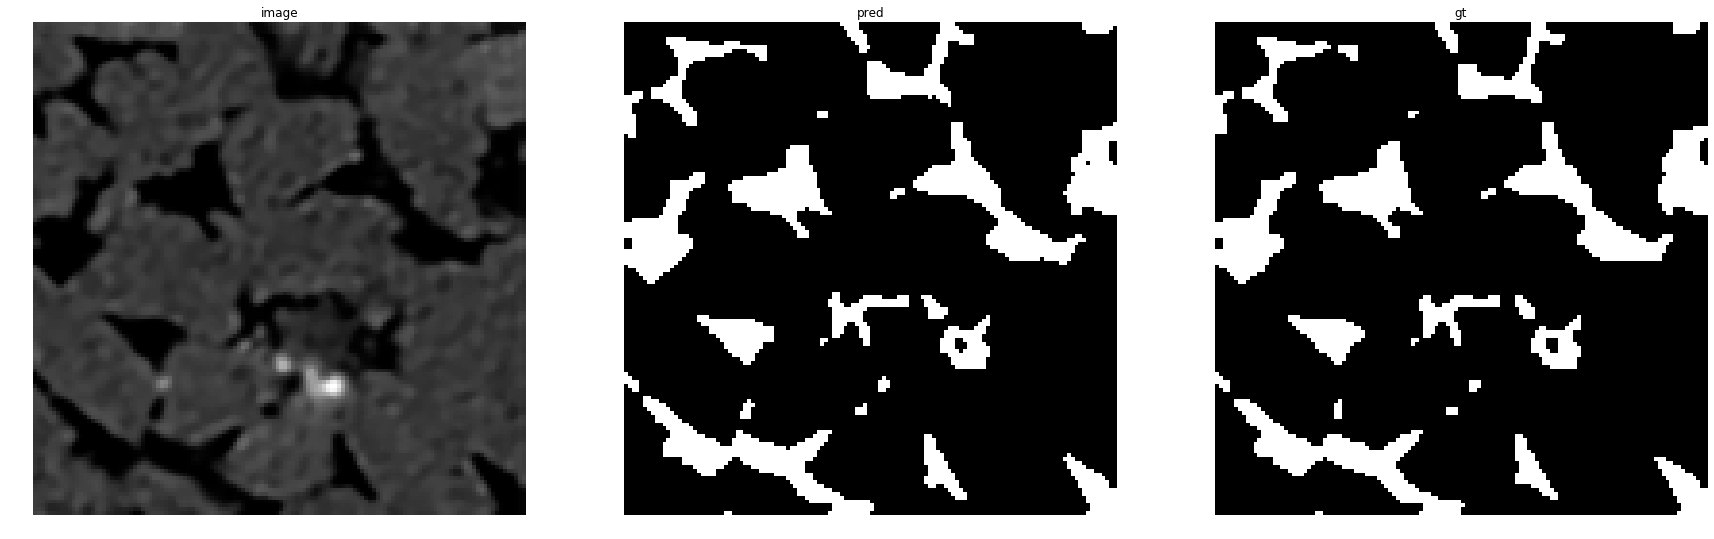

accuracy    : 0.99163818359375
precision   : 0.9636821287306724
recall      : 0.9867452135493373
f1          : 0.9750773148990359
pr_auc      : 0.9984088524432424
iou         : 0.9513667021654242


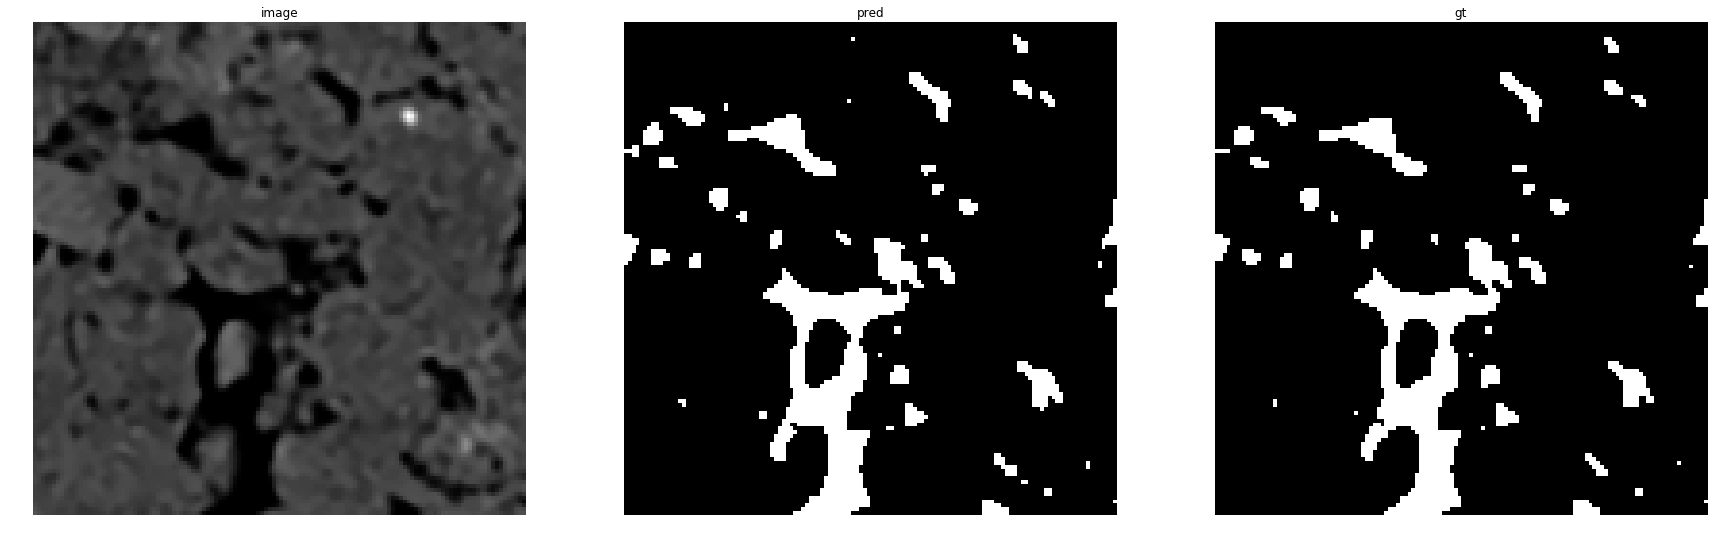

accuracy    : 0.993408203125
precision   : 0.9552678045909359
recall      : 0.9806646525679759
f1          : 0.9677996422182469
pr_auc      : 0.9975860134808451
iou         : 0.9376083188908145


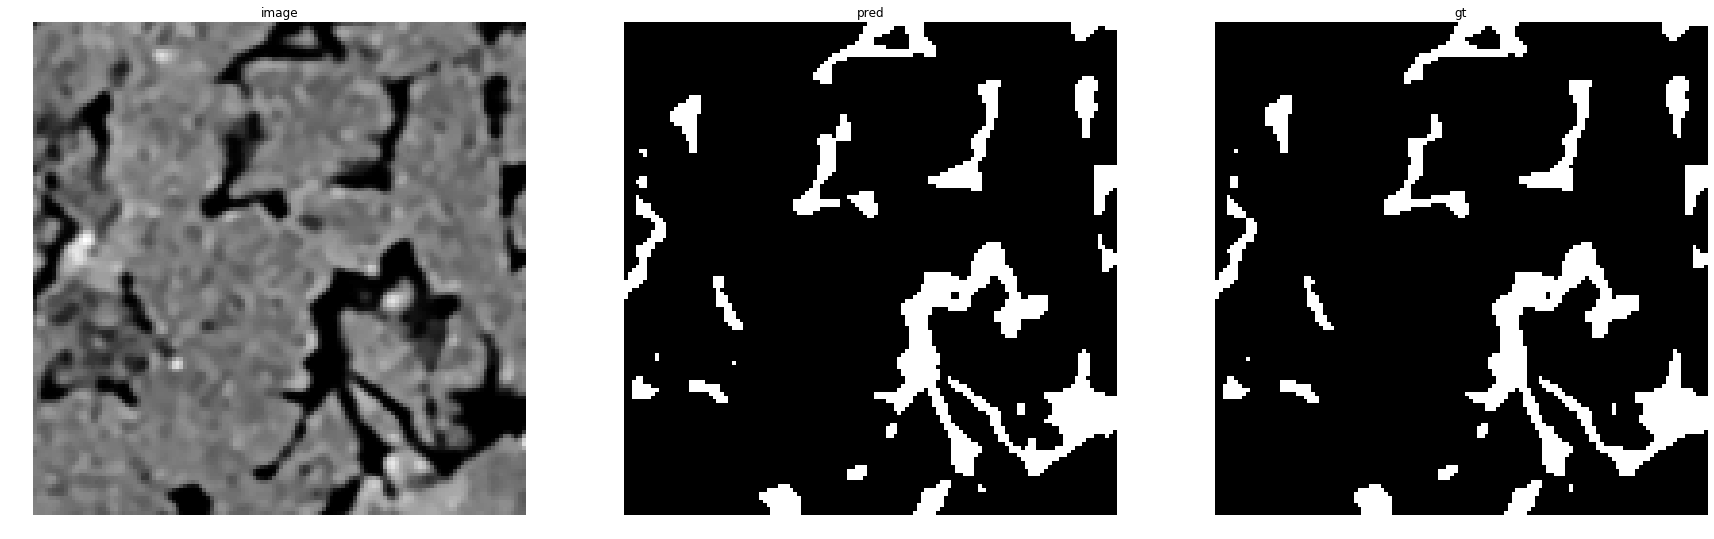

accuracy    : 0.99078369140625
precision   : 0.9516746411483253
recall      : 0.9754781755762629
f1          : 0.9634294017922015
pr_auc      : 0.9966093868783458
iou         : 0.9294392523364486


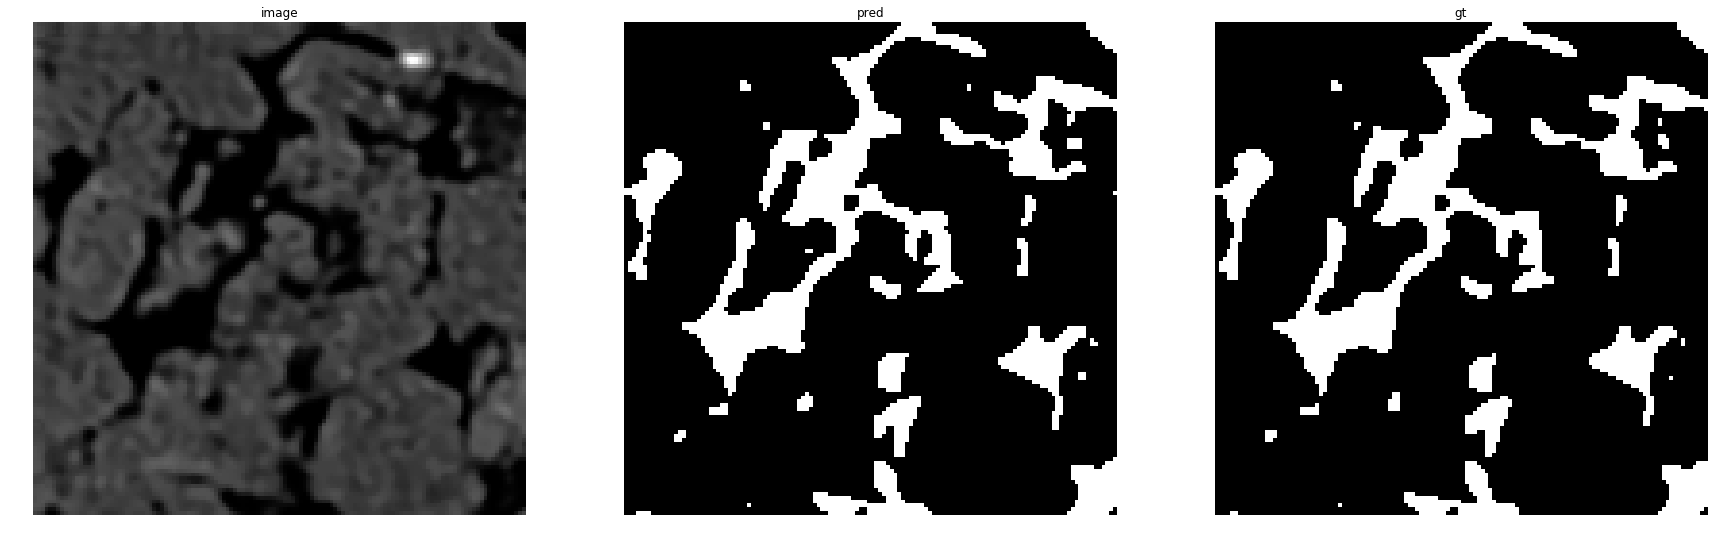

accuracy    : 0.99029541015625
precision   : 0.9664674634794157
recall      : 0.9804648029639609
f1          : 0.9734158167530513
pr_auc      : 0.9979930163294388
iou         : 0.9482084690553746


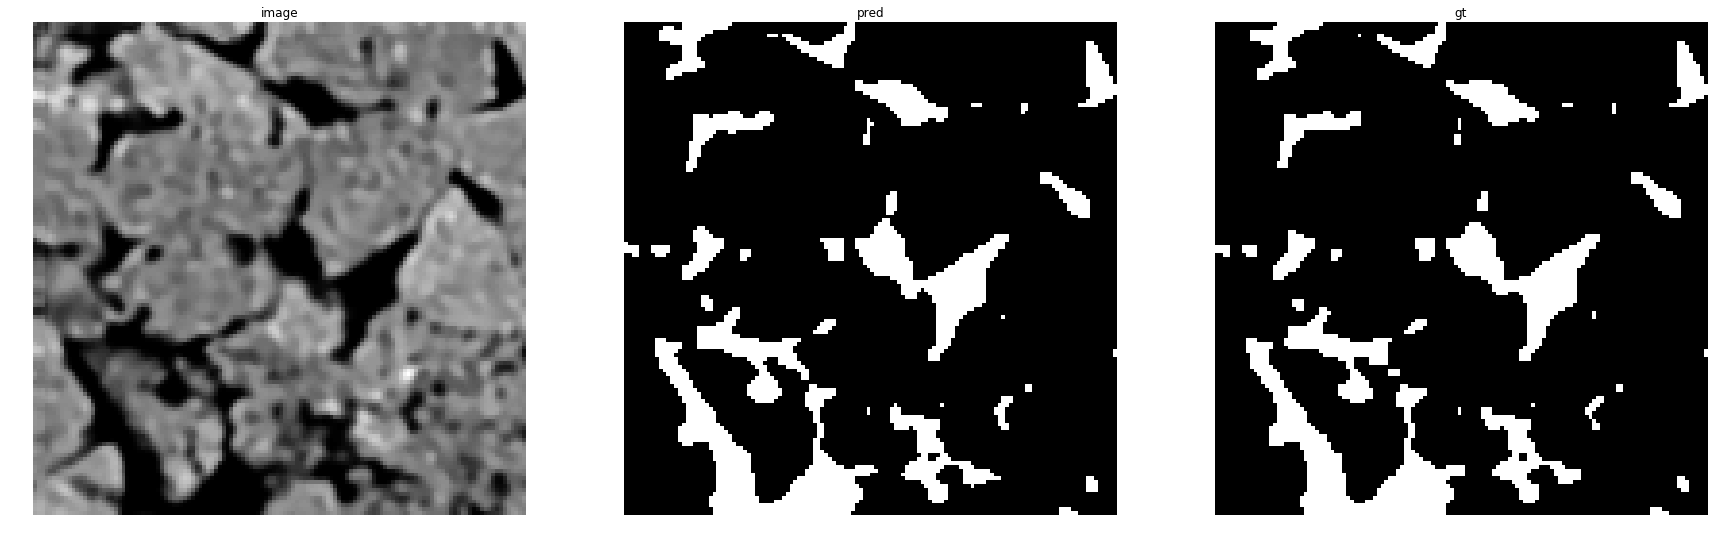

accuracy    : 0.99188232421875
precision   : 0.9623314829500397
recall      : 0.9845841784989858
f1          : 0.9733306597152597
pr_auc      : 0.9978505591271026
iou         : 0.948046875


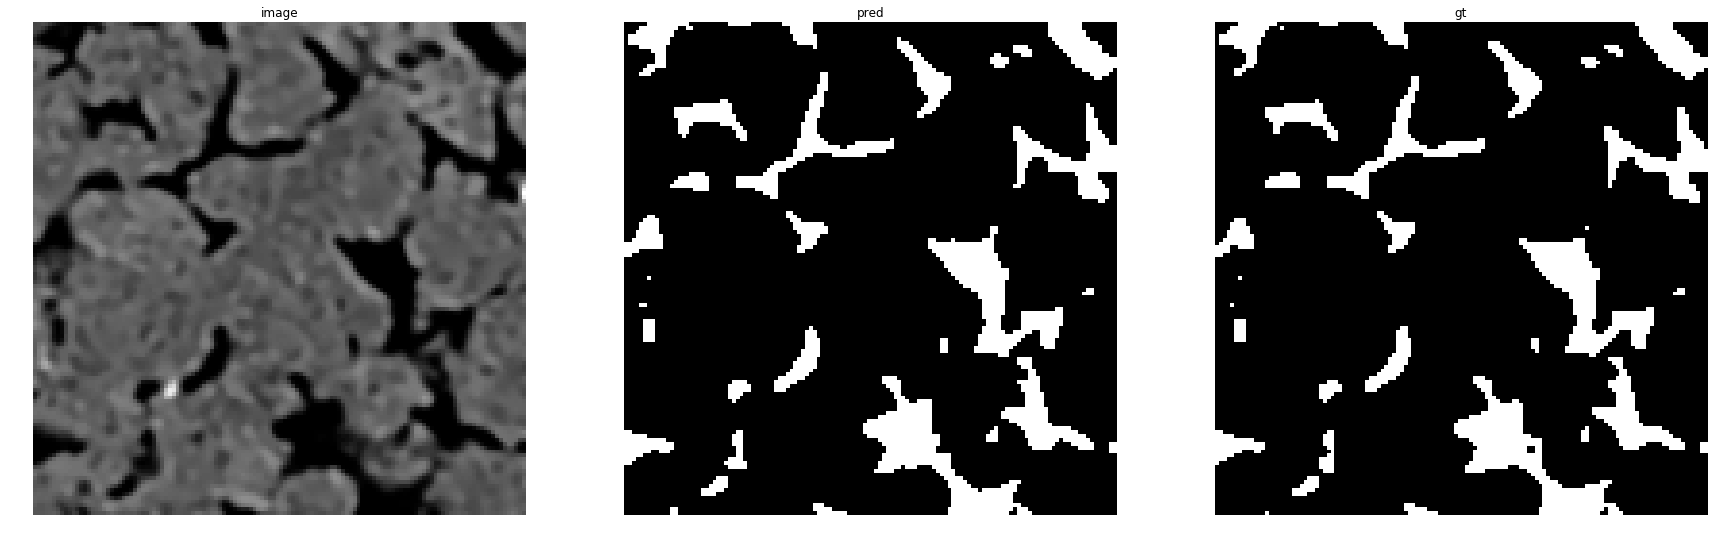

accuracy    : 0.99163818359375
precision   : 0.9627659574468085
recall      : 0.9808253438932889
f1          : 0.9717117489159611
pr_auc      : 0.9979308675313822
iou         : 0.9449799196787149


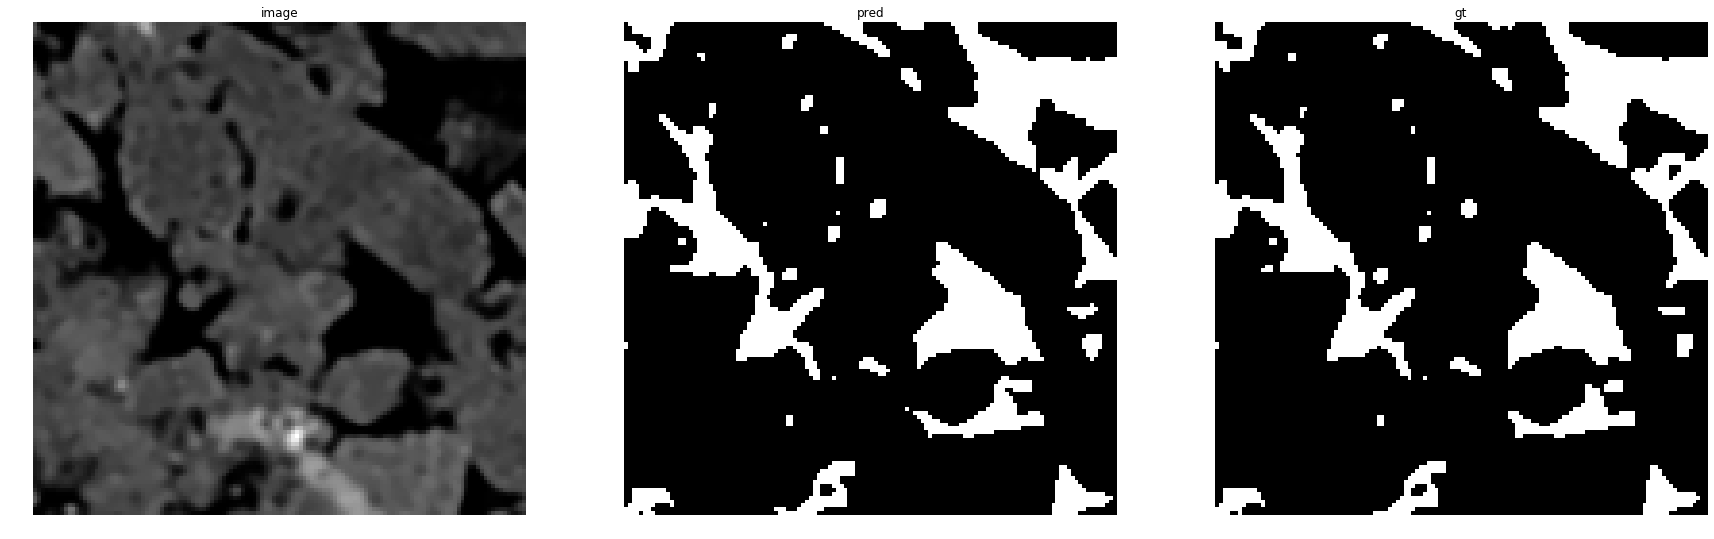

accuracy    : 0.98944091796875
precision   : 0.9685960591133005
recall      : 0.9779297482126205
f1          : 0.9732405259087393
pr_auc      : 0.9981981330586855
iou         : 0.9478758662247665


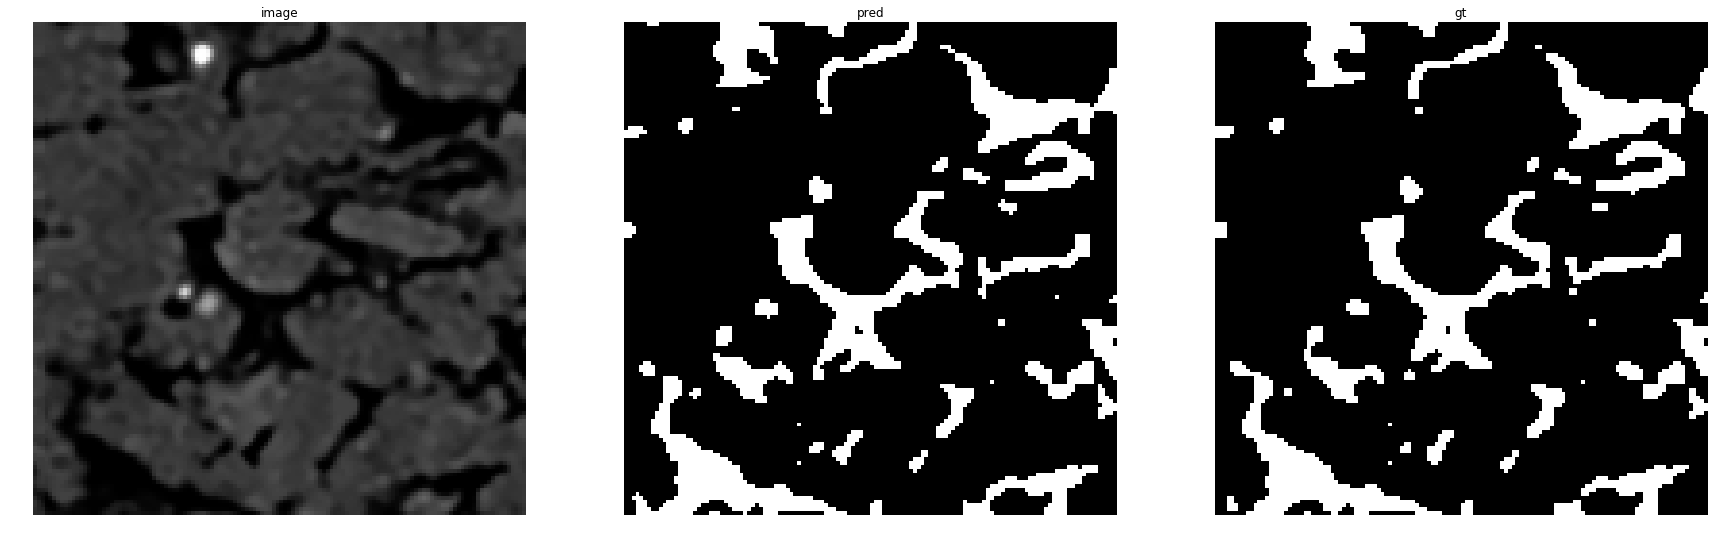

accuracy    : 0.98663330078125
precision   : 0.9484641638225256
recall      : 0.9761152089919213
f1          : 0.962091050718366
pr_auc      : 0.9962138797128648
iou         : 0.9269513008672449


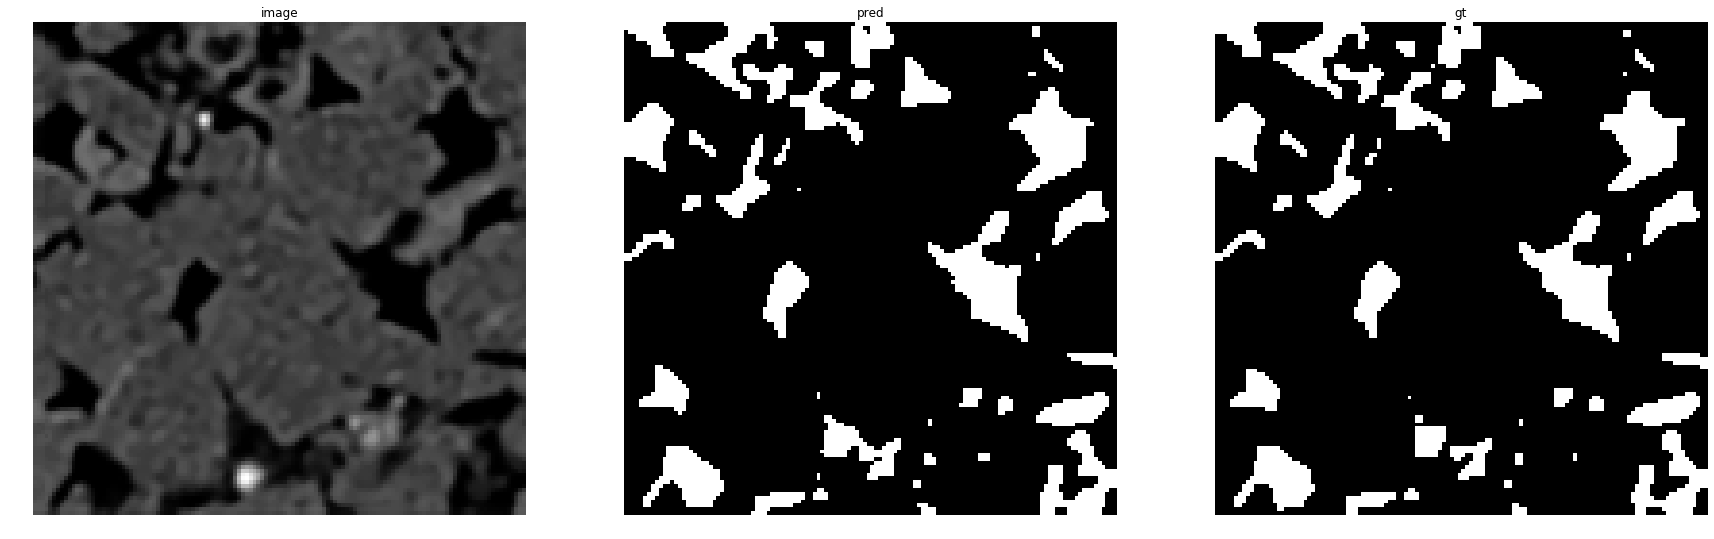

accuracy    : 0.9898681640625
precision   : 0.9612375533428165
recall      : 0.9793478260869565
f1          : 0.9702081837760229
pr_auc      : 0.9971577435134841
iou         : 0.942140118508191


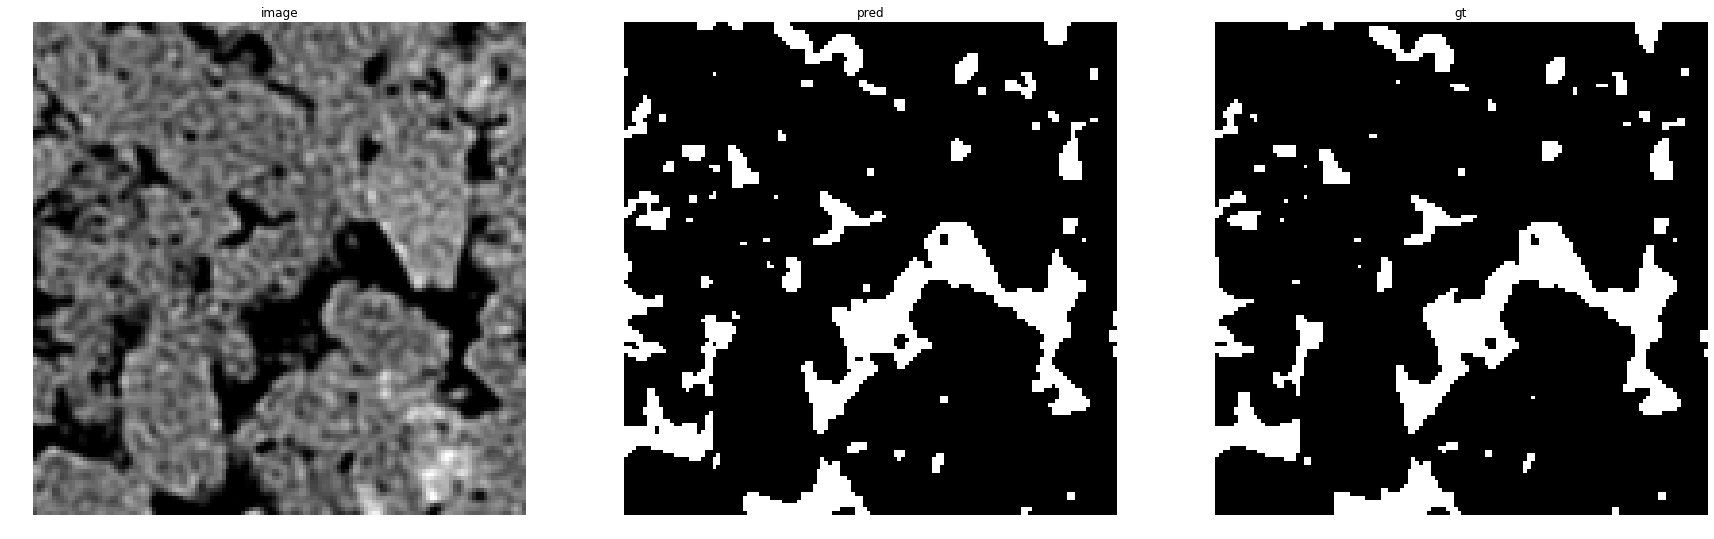

accuracy    : 0.97784423828125
precision   : 0.9043377226955848
recall      : 0.952672378620971
f1          : 0.9278760182793562
pr_auc      : 0.9868155265264184
iou         : 0.8654558932542624


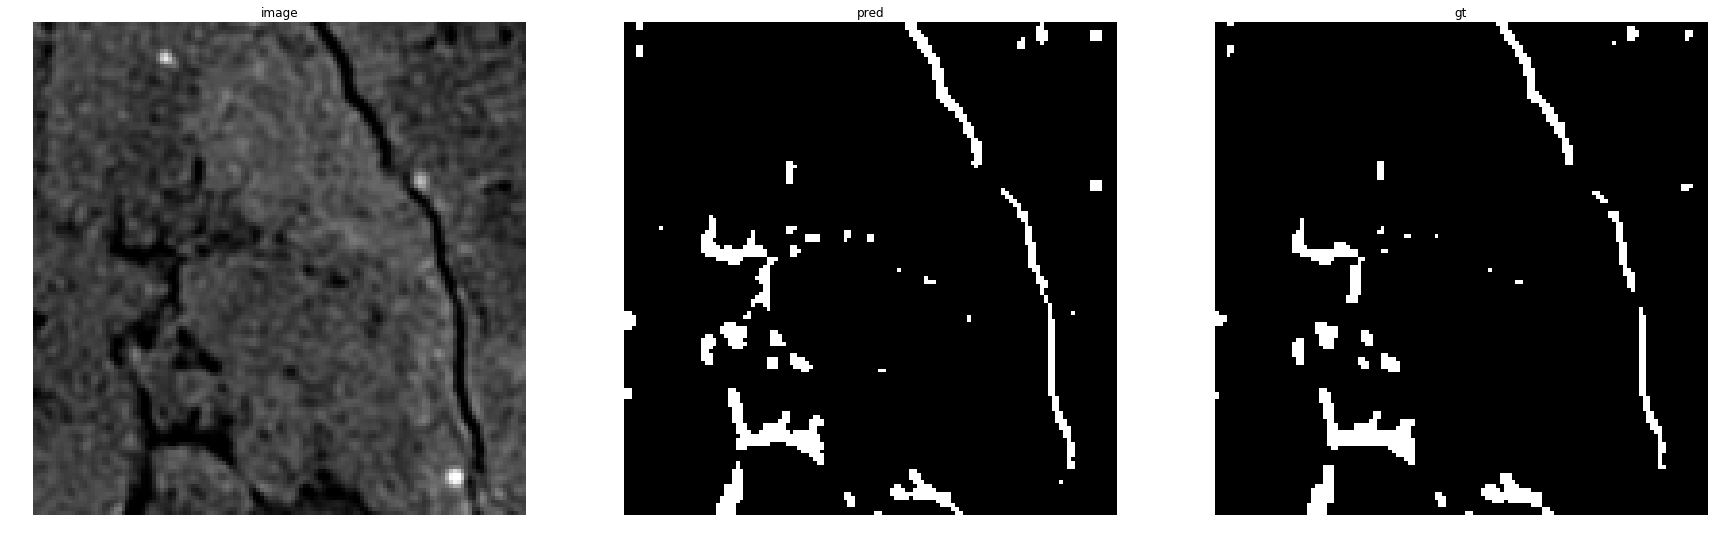

accuracy    : 0.98822021484375
precision   : 0.8396860986547086
recall      : 0.9374217772215269
f1          : 0.885866351271437
pr_auc      : 0.9697992868381372
iou         : 0.7951167728237792


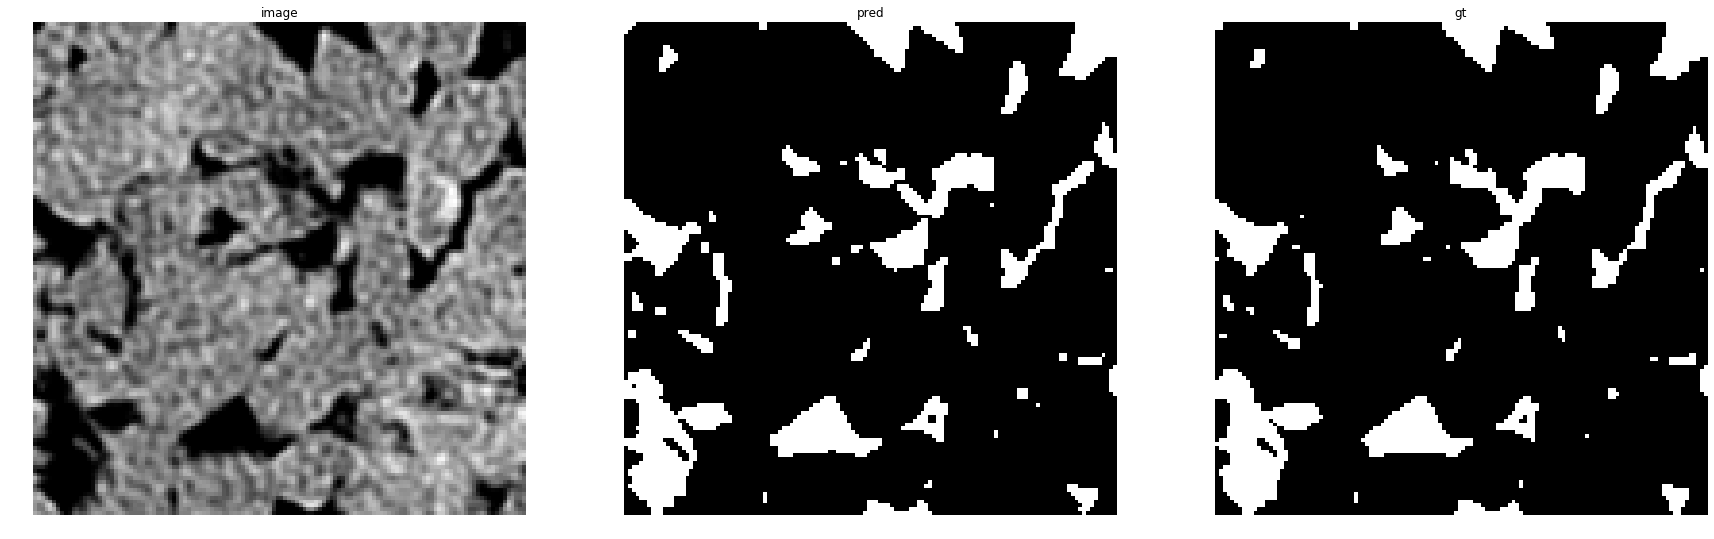

accuracy    : 0.98590087890625
precision   : 0.9392426133999168
recall      : 0.9637062339880444
f1          : 0.9513171759747103
pr_auc      : 0.9921330646578492
iou         : 0.9071543408360129


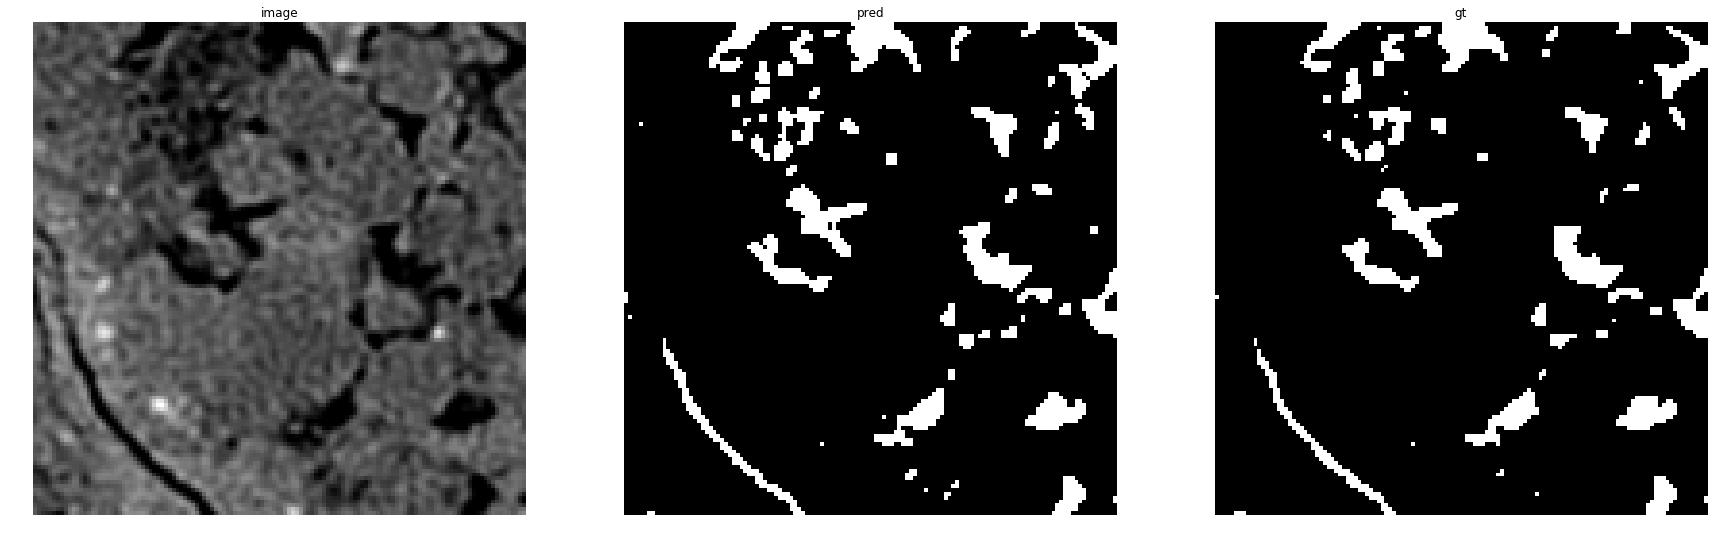

accuracy    : 0.9820556640625
precision   : 0.867251461988304
recall      : 0.9567741935483871
f1          : 0.9098159509202454
pr_auc      : 0.9828144941156671
iou         : 0.8345526167698368


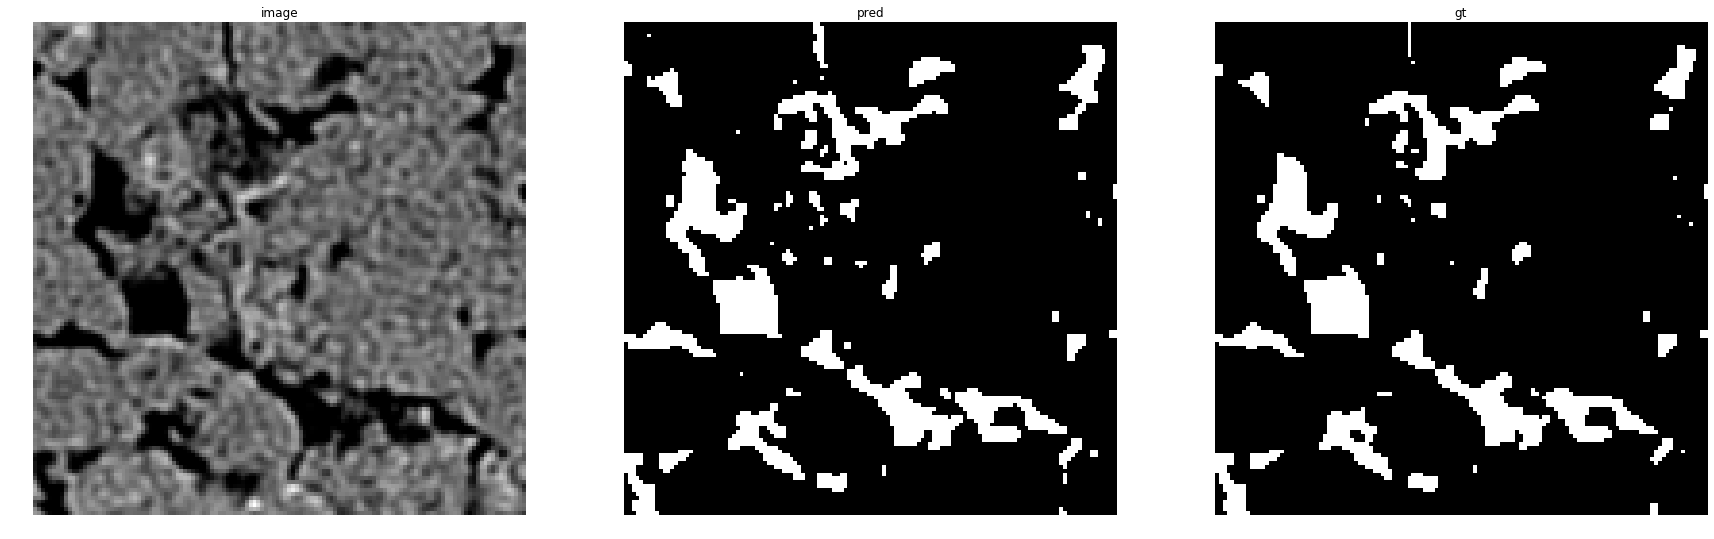

accuracy    : 0.98223876953125
precision   : 0.8944768747193534
recall      : 0.97265625
f1          : 0.9319298245614035
pr_auc      : 0.9897420196154586
iou         : 0.8725361366622865


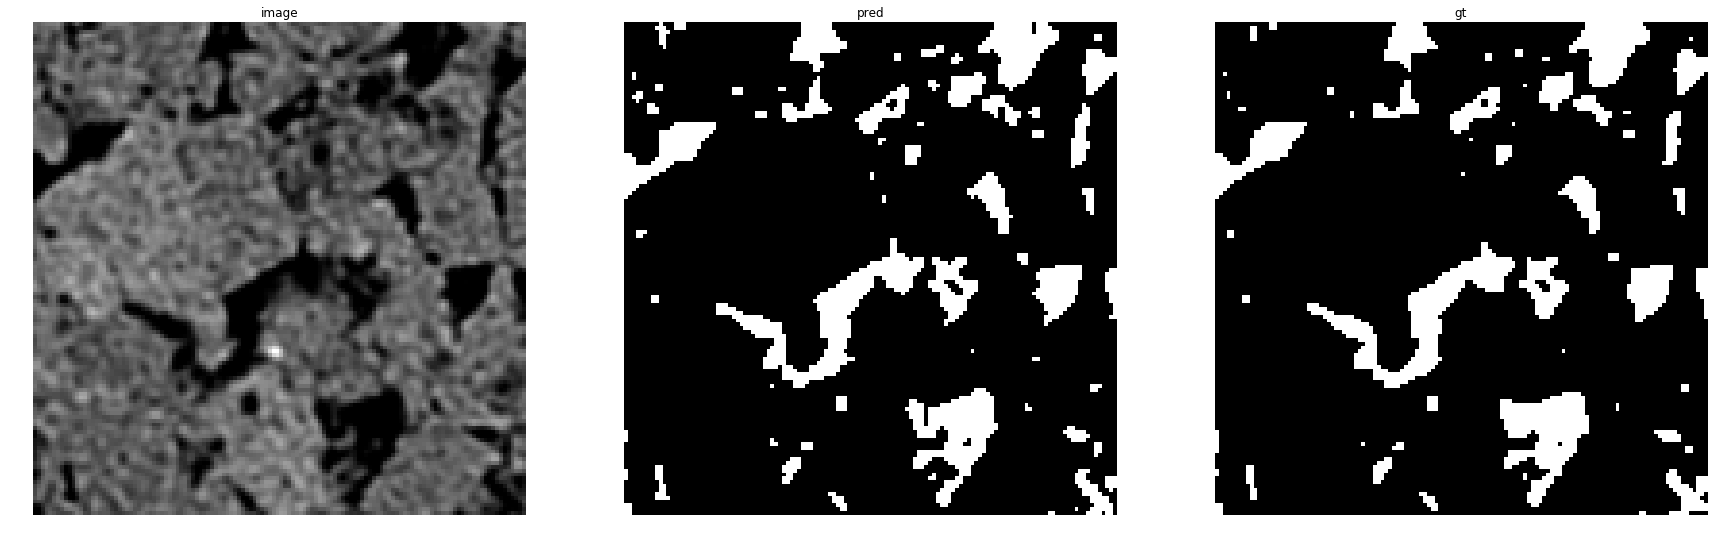

accuracy    : 0.982666015625
precision   : 0.9196127946127947
recall      : 0.9591747146619842
f1          : 0.9389772238934251
pr_auc      : 0.9881046409736995
iou         : 0.8849736735520454


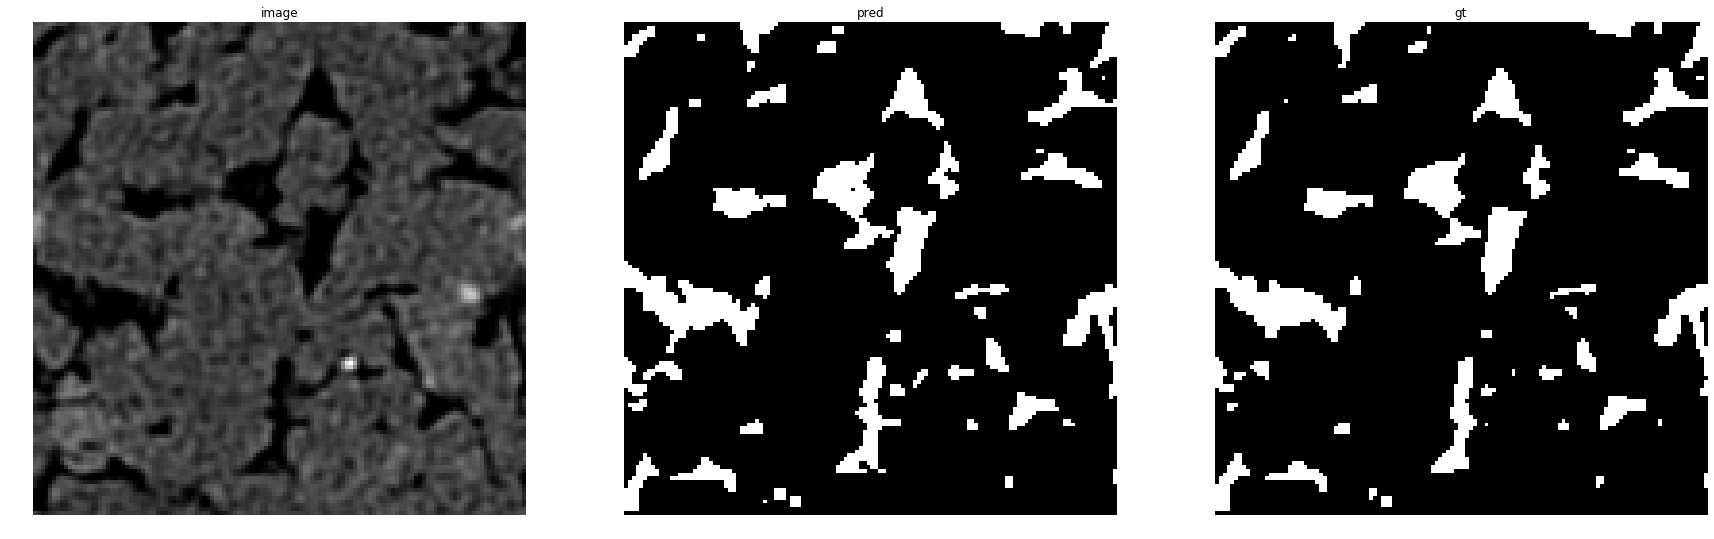

accuracy    : 0.9813232421875
precision   : 0.8866305329719963
recall      : 0.9727452923686819
f1          : 0.9276937618147447
pr_auc      : 0.9880289016854397
iou         : 0.8651388276773909


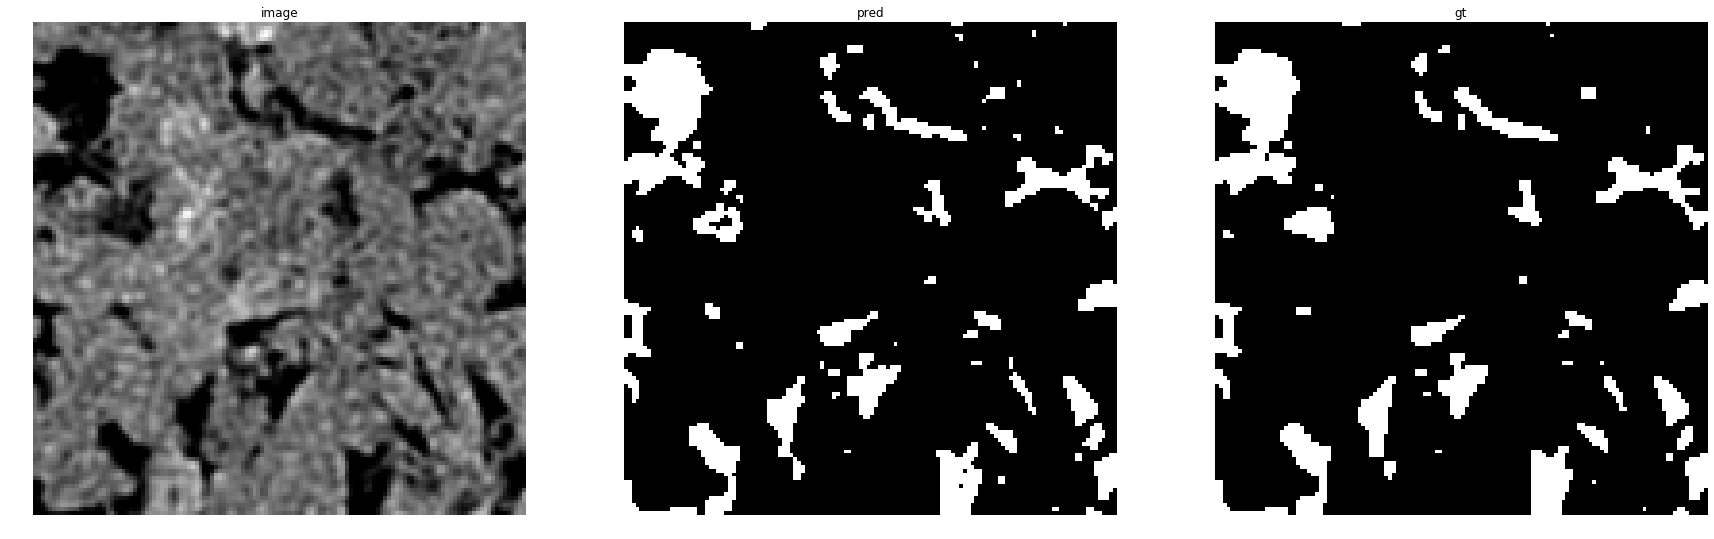

accuracy    : 0.98370361328125
precision   : 0.9253034547152195
recall      : 0.948779320248923
f1          : 0.9368943512172063
pr_auc      : 0.9878859756422304
iou         : 0.8812805691418408


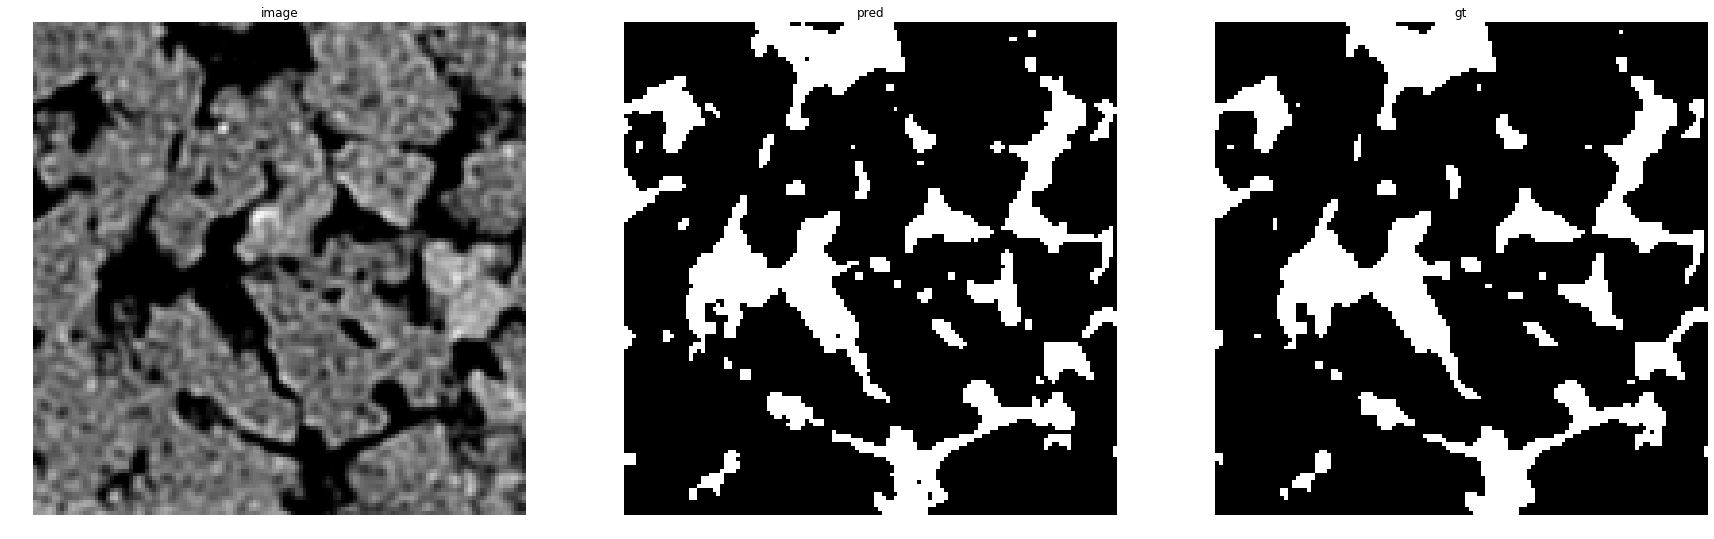

accuracy    : 0.9793701171875
precision   : 0.941766508776818
recall      : 0.963237389569678
f1          : 0.9523809523809523
pr_auc      : 0.9925121289464343
iou         : 0.9090909090909091


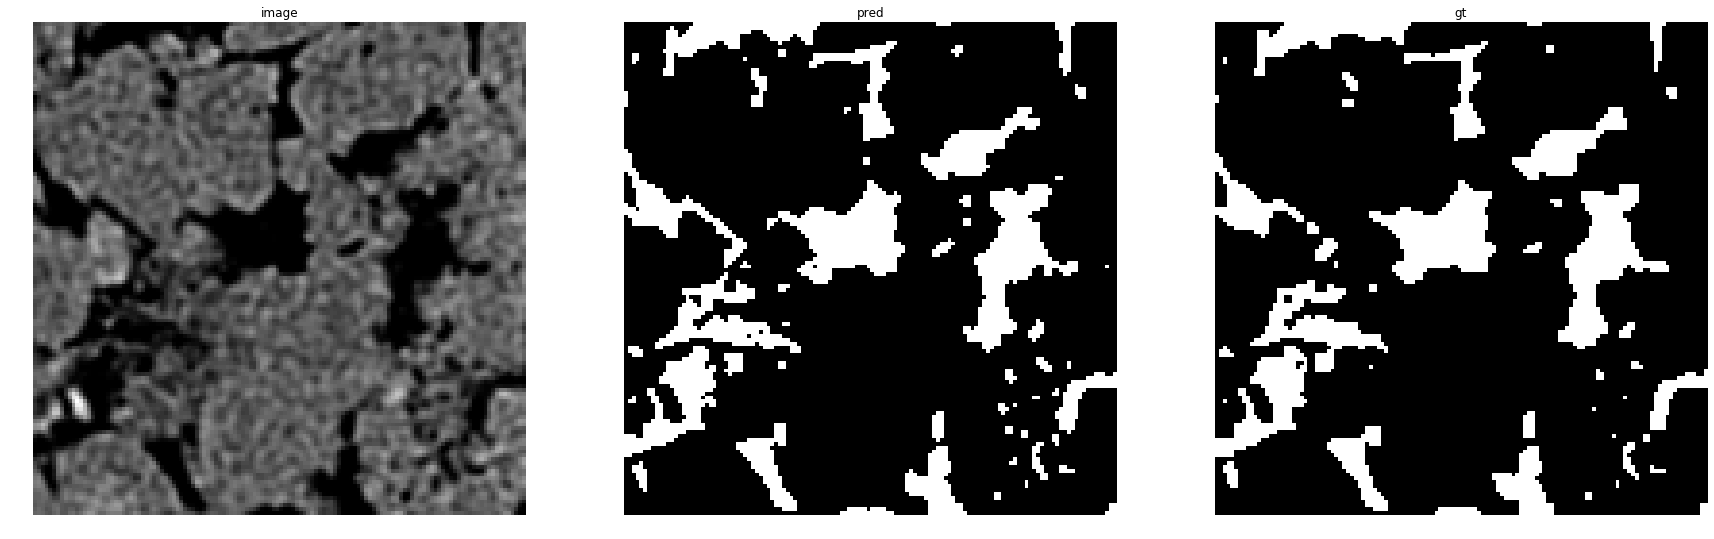

accuracy    : 0.97967529296875
precision   : 0.9238064094179202
recall      : 0.9658119658119658
f1          : 0.9443423031923784
pr_auc      : 0.9911168534202189
iou         : 0.8945535148828372


In [28]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:00, 742.58it/s]
100%|██████████| 700/700 [00:06<00:00, 100.50it/s]


In [31]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 238784.35it/s]
25200it [02:04, 202.42it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3220.96it/s]


In [32]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.983521
precision   : 0.928582
recall      : 0.926553
f1          : 0.927566
pr_auc      : 0.983711
iou         : 0.864917
